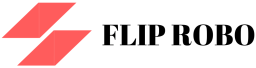                           

# PROJECT : HOUSING PRICE PREDICTION

By: Mr.Vikas Kumar Mishra

Internship Batch :32 Id : 44

# Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. 

For this company wants to know:

• Which variables are important to predict the price of variable?

• How do these variables describe the price of the house?


# Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market

# Technical Requirements:

• Data contains 1460 entries each having 81 variables.

• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.

• Extensive EDA has to be performed to gain relationships of important variable and price.

• Data contains numerical as well as categorical variable. You need to handle them accordingly.

• You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.

• You need to find important features which affect the price positively or negatively.

• Two datasets are being provided to you (test.csv, train.csv).You will train on train.csv dataset and predict on test.csv file. 
   


IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore') 
%matplotlib inline

Retriving Dataset House_pred_train csv File

In [2]:
data = pd.read_csv('House_pred_train.csv')
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [3]:
print('No. of Rows :',data.shape[0])
print('No. of Columns :', data.shape[1])

# See truncated columns

pd.set_option('display.max_columns',None) 
data.head()

No. of Rows : 1168
No. of Columns : 81


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

Dataset Information :

1) Dataset consist of two CSV files, one for training model & other for testing dataset.

2) Training dataset contain 1168 Rows & 81 Columns.

3) There are some missing values are present in dataset.

# ALL DATA DESCRIPTION:

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

Sort columns by their datatypes

In [4]:
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], float64: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], object: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Garage

# CHEK DATA INTEGRITY AND ANY WHITESPACE

In [5]:
data.duplicated().sum()

0

In [6]:
data.isin(['NA','N/A', '-', ' ', '?']).sum().sum()

0

# CHEK MISSING VALUE

In [7]:
data.isnull().sum().sum()

5558

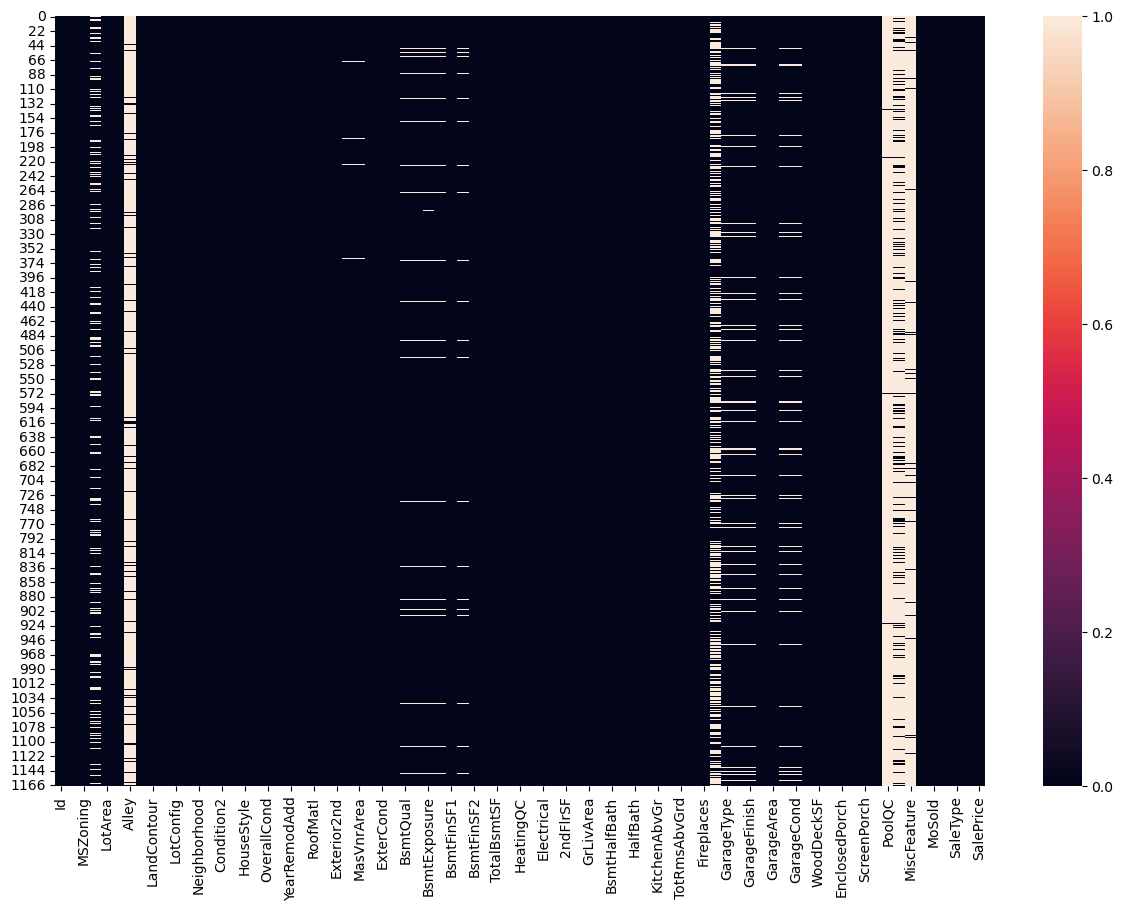

In [8]:
# Chek missing value with heatmap
plt.figure(figsize=(15,10))
sns.heatmap(data.isnull())
plt.show()


Chek Percentage % Of Missing Data In Dataset

In [9]:
#pd.concat?

In [10]:
pd.set_option('display.max_rows',None) 
missing_values = data.isnull().sum().sort_values(ascending=False)
per_miss_val = (missing_values/len(data))*100
print(pd.concat([missing_values, per_miss_val], axis = 1, keys =['Missing Values', 'Percentage(%) of Missing data']))

               Missing Values  Percentage(%) of Missing data
PoolQC                   1161                      99.400685
MiscFeature              1124                      96.232877
Alley                    1091                      93.407534
Fence                     931                      79.708904
FireplaceQu               551                      47.174658
LotFrontage               214                      18.321918
GarageYrBlt                64                       5.479452
GarageFinish               64                       5.479452
GarageType                 64                       5.479452
GarageQual                 64                       5.479452
GarageCond                 64                       5.479452
BsmtExposure               31                       2.654110
BsmtFinType2               31                       2.654110
BsmtQual                   30                       2.568493
BsmtCond                   30                       2.568493
BsmtFinType1            

# MISSING VALUE IMPUTATION 

These Above features contain high amount of Missing Data, There is no way to imputate these data.
So, we are going to drop these features.

In [11]:
data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis =1, inplace = True)

In [12]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  127         120       RL          NaN     4928   Pave      IR1         Lvl   
1  889          20       RL         95.0    15865   Pave      IR1         Lvl   
2  793          60       RL         92.0     9920   Pave      IR1         Lvl   
3  110          20       RL        105.0    11751   Pave      IR1         Lvl   
4  422          20       RL          NaN    16635   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE   
1    AllPub    Inside       Mod        NAmes       Norm       Norm     1Fam   
2    AllPub   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
3    AllPub    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl       NWAmes       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     1Story            6            5       1976          1976     Gable   
1     1Story            8            6       1970          1970      Flat   
2     2Story            7            5       1996          1997     Gable   
3     1Story            6            6       1977          1977       Hip   
4     1Story            6            7       1977          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     Plywood     Plywood       None         0.0        TA        TA   
1  Tar&Grv     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd   
2  CompShg     MetalSd     MetalSd       None         0.0        Gd        TA   
3  CompShg     Plywood     Plywood    BrkFace       480.0        TA        TA   
4  CompShg     CemntBd     CmentBd      Stone       126.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       Gd       TA           No          ALQ         120   
1      PConc       TA       Gd           Gd          ALQ         351   
2      PConc       Gd       TA           Av          GLQ         862   
3     CBlock       Gd       TA           No          BLQ         705   
4     CBlock       Gd       TA           No          ALQ        1246   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        958         1078    GasA        TA   
1          Rec         823       1043         2217    GasA        Ex   
2          Unf           0        255         1117    GasA        Ex   
3          Unf           0       1139         1844    GasA        Ex   
4          Unf           0        356         1602    GasA        Gd   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       958         0             0        958   
1          Y      SBrkr      2217         0             0       2217   
2          Y      SBrkr      1127       886             0       2013   
3          Y      SBrkr      1844         0             0       1844   
4          Y      SBrkr      1602         0             0       1602   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             1         2         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          TA             5        Typ           1     Attchd       1977.0   
1          Gd             8        Typ           1     Attchd       1970.0   
2          TA             8        Typ           1     Attchd       1997

In [13]:
data.shape[1]

76

In [14]:
print('No. of Rows :',data.shape[0])
print('No. of Columns :', data.shape[1])

# See truncated columns

pd.set_option('display.max_columns',None) 
data.head()

No. of Rows : 1168
No. of Columns : 76


Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  127         120       RL          NaN     4928   Pave      IR1         Lvl   
1  889          20       RL         95.0    15865   Pave      IR1         Lvl   
2  793          60       RL         92.0     9920   Pave      IR1         Lvl   
3  110          20       RL        105.0    11751   Pave      IR1         Lvl   
4  422          20       RL          NaN    16635   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE   
1    AllPub    Inside       Mod        NAmes       Norm       Norm     1Fam   
2    AllPub   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
3    AllPub    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl       NWAmes       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     1Story            6            5       1976          1976     Gable   
1     1Story            8            6       1970          1970      Flat   
2     2Story            7            5       1996          1997     Gable   
3     1Story            6            6       1977          1977       Hip   
4     1Story            6            7       1977          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     Plywood     Plywood       None         0.0        TA        TA   
1  Tar&Grv     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd   
2  CompShg     MetalSd     MetalSd       None         0.0        Gd        TA   
3  CompShg     Plywood     Plywood    BrkFace       480.0        TA        TA   
4  CompShg     CemntBd     CmentBd      Stone       126.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       Gd       TA           No          ALQ         120   
1      PConc       TA       Gd           Gd          ALQ         351   
2      PConc       Gd       TA           Av          GLQ         862   
3     CBlock       Gd       TA           No          BLQ         705   
4     CBlock       Gd       TA           No          ALQ        1246   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        958         1078    GasA        TA   
1          Rec         823       1043         2217    GasA        Ex   
2          Unf           0        255         1117    GasA        Ex   
3          Unf           0       1139         1844    GasA        Ex   
4          Unf           0        356         1602    GasA        Gd   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       958         0             0        958   
1          Y      SBrkr      2217         0             0       2217   
2          Y      SBrkr      1127       886             0       2013   
3          Y      SBrkr      1844         0             0       1844   
4          Y      SBrkr      1602         0             0       1602   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             1         2         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          TA             5        Typ           1     Attchd       1977.0   
1          Gd             8        Typ           1     Attchd       1970.0   
2          TA             8        Typ           1     Attchd       1997

In [15]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [16]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


***** After Missing Value Imputation Our Data Have[ No. of Rows : 1168 And
No. of Columns : 76] *****

**Missing Value Imputation in Lot Frontage Column**

*LotFrontage is numerical feature which can imputate based mean or median value. Check boxplot & distribution of LotFrontage feature*

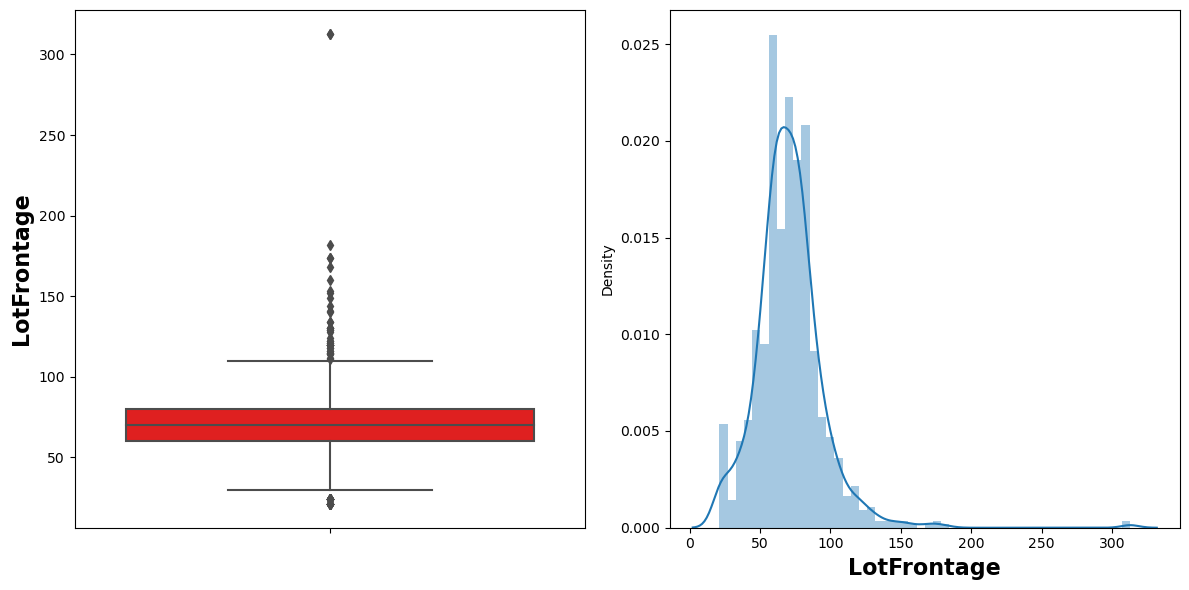

In [17]:
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
sns.boxplot( y = 'LotFrontage', data= data, color='red')
plt.ylabel('LotFrontage', fontweight='bold', fontsize= 16)
plt.subplot(1,2,2)
sns.distplot(data['LotFrontage'])
plt.xlabel('LotFrontage', fontweight='bold',fontsize=16)
plt.tight_layout()
plt.show()

In [18]:
print('Mean of LotFrontage:',data['LotFrontage'].mean())
print('Median of LotFrontage:',data['LotFrontage'].median())

Mean of LotFrontage: 70.98846960167715
Median of LotFrontage: 70.0


**Outliers are Present in Lot frontage Column and Impute With Median**

In [19]:
# Fill Null Values 

data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())

In [20]:
data['LotFrontage'].isnull().sum()

0

**Missing Value Imputation in Garage Type**


**GarageType is Categorical feature which can be imputate with Mode.**

In [21]:
data['GarageType']= data['GarageType'].fillna(data['GarageType'].mode()[0])

In [22]:
data['GarageType'].value_counts()

Attchd     755
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

In [23]:
#data['GarageType']

In [24]:
data['GarageType'].isnull().sum()

0

**Missing Value Imputation in GarageYrBlt**


**GarageYrBlt is a numeric data we can impute with mean or median**

*Check boxplot & distribution of GarageYrBlt feature*

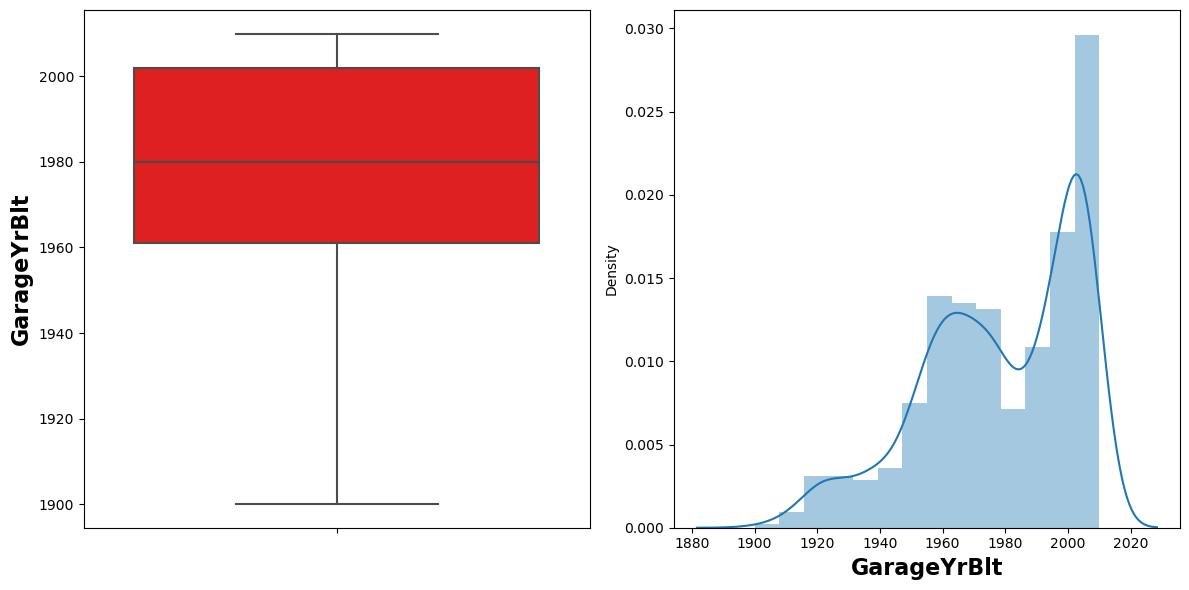

In [25]:
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
sns.boxplot( y = 'GarageYrBlt', data= data, color='red')
plt.ylabel('GarageYrBlt', fontweight='bold', fontsize= 16)
plt.subplot(1,2,2)
sns.distplot(data['GarageYrBlt'])
plt.xlabel('GarageYrBlt', fontweight='bold',fontsize=16)
plt.tight_layout()
plt.show()

In [26]:
# Chek data types
data['GarageYrBlt'].dtypes

dtype('float64')

In [27]:
print('Mean of GarageYrBlt:',data['GarageYrBlt'].mean())
print('Median of GarageYrBlt:',data['GarageYrBlt'].median())

Mean of GarageYrBlt: 1978.1938405797102
Median of GarageYrBlt: 1980.0


In [28]:
# Impute with median outliers is present

data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].median())

In [29]:
data['GarageYrBlt'].isnull().sum()

0

**Missing Value Imputation in GarageFinish**

**GarageFinish is Categorical feature which can be imputate with Mode.**

In [30]:
data['GarageFinish'].value_counts()

Unf    487
RFn    339
Fin    278
Name: GarageFinish, dtype: int64

In [31]:
data['GarageFinish'].mode()[0]

'Unf'

In [32]:
data['GarageFinish']=data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])

In [33]:
data['GarageFinish'].isnull().sum()

0

**chek percentage of data is missing from dataset**

In [34]:
pd.set_option('display.max_rows',None) 
missing_values = data.isnull().sum().sort_values(ascending=False)
per_miss_val = (missing_values/len(data))*100
print(pd.concat([missing_values, per_miss_val], axis = 1, keys =['Missing Values', 'Percentage(%) of Missing data']))

               Missing Values  Percentage(%) of Missing data
GarageQual                 64                       5.479452
GarageCond                 64                       5.479452
BsmtExposure               31                       2.654110
BsmtFinType2               31                       2.654110
BsmtQual                   30                       2.568493
BsmtFinType1               30                       2.568493
BsmtCond                   30                       2.568493
MasVnrType                  7                       0.599315
MasVnrArea                  7                       0.599315
KitchenQual                 0                       0.000000
KitchenAbvGr                0                       0.000000
BedroomAbvGr                0                       0.000000
Id                          0                       0.000000
Functional                  0                       0.000000
HalfBath                    0                       0.000000
FullBath                

**Missing Value Imputation in GarageQual : Garage quality**

In [35]:
data['GarageQual'].value_counts()

TA    1050
Fa      39
Gd      11
Ex       2
Po       2
Name: GarageQual, dtype: int64

In [36]:
data['GarageQual'].dtypes

dtype('O')

In [37]:
data['GarageQual'] = data['GarageQual'].fillna(data['GarageQual'].mode()[0])

In [38]:
data['GarageQual'].isnull().sum()

0

**Missing Value Imputation in GarageCond : Garage Condition**

In [39]:
data['GarageCond'].value_counts()

TA    1061
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64

In [40]:
data['GarageCond'].dtypes

dtype('O')

In [41]:
data['GarageCond'] = data['GarageCond'].fillna(data['GarageCond'].mode()[0])

In [42]:
data['GarageCond'].isnull().sum()

0

**Missing Value Imputation in BsmtFinType2 : Rating of basement finished area (if multiple types)**

In [43]:
data['BsmtFinType2'].value_counts()

Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64

In [44]:
data['BsmtFinType2'].dtypes

dtype('O')

In [45]:
data['BsmtFinType2'] = data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])

In [46]:
data['BsmtFinType2'].isnull().sum()

0

**Missing Value Imputation in BsmtExposure : Refers to walkout or garden level walls**

In [47]:
data['BsmtExposure'].value_counts()

No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64

In [48]:
data['BsmtExposure'].dtypes

dtype('O')

In [49]:
data['BsmtExposure'] = data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])

In [50]:
data['BsmtExposure'].isnull().sum()

0

 **Missing Value Imputation in BsmtFinType1 : Rating of basement finished area**


In [51]:
data['BsmtFinType1'].value_counts()

Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64

In [52]:
data['BsmtFinType1'].dtypes

dtype('O')

In [53]:
data['BsmtFinType1'] = data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])

In [54]:
data['BsmtFinType1'].isnull().sum()

0

**Missing Value Imputation in BsmtQual : Evaluates the height of the basement**

In [55]:
data['BsmtQual'].value_counts()

TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64

In [56]:
data['BsmtQual'].dtypes

dtype('O')

In [57]:
data['BsmtQual'] = data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])

In [58]:
data['BsmtQual'].isnull().sum()

0

**Missing Value Imputation in BsmtCond : Evaluates the general condition of the basement**

In [59]:
data['BsmtCond'].value_counts()

TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64

In [60]:
data['BsmtCond'].dtypes

dtype('O')

In [61]:
data['BsmtCond'] = data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])

In [62]:
data['BsmtCond'].isnull().sum()

0

**Missing Value Imputation in MasVnrType : Masonry veneer type**

In [63]:
data['MasVnrType'].value_counts()

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

In [64]:
data['MasVnrType'].dtypes

dtype('O')

In [65]:
data['MasVnrType'] = data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])

In [66]:
data['MasVnrType'].isnull().sum()

0

**Missing Value Imputation in MasVnrArea : Masonry veneer area in square feet**

In [67]:
data['MasVnrArea'].value_counts()

0.0       692
72.0        7
180.0       6
120.0       6
106.0       5
84.0        5
108.0       5
80.0        5
336.0       4
320.0       4
100.0       4
246.0       4
160.0       4
340.0       4
178.0       4
360.0       4
288.0       4
168.0       4
300.0       4
216.0       4
40.0        4
210.0       4
132.0       4
16.0        4
220.0       4
104.0       3
170.0       3
128.0       3
174.0       3
200.0       3
82.0        3
99.0        3
252.0       3
70.0        3
256.0       3
208.0       3
186.0       3
130.0       3
110.0       3
350.0       3
85.0        3
183.0       3
456.0       3
158.0       2
312.0       2
306.0       2
117.0       2
44.0        2
344.0       2
272.0       2
145.0       2
305.0       2
205.0       2
18.0        2
125.0       2
260.0       2
143.0       2
285.0       2
144.0       2
135.0       2
74.0        2
362.0       2
335.0       2
116.0       2
30.0        2
420.0       2
243.0       2
76.0        2
660.0       2
182.0       2
203.0       2
238.0 

In [68]:
data['MasVnrArea'].dtypes

dtype('float64')

**MasVnrArea is numerical feature which can imputate based mean or median value**

*Check boxplot & distribution of MasVnrArea feature*

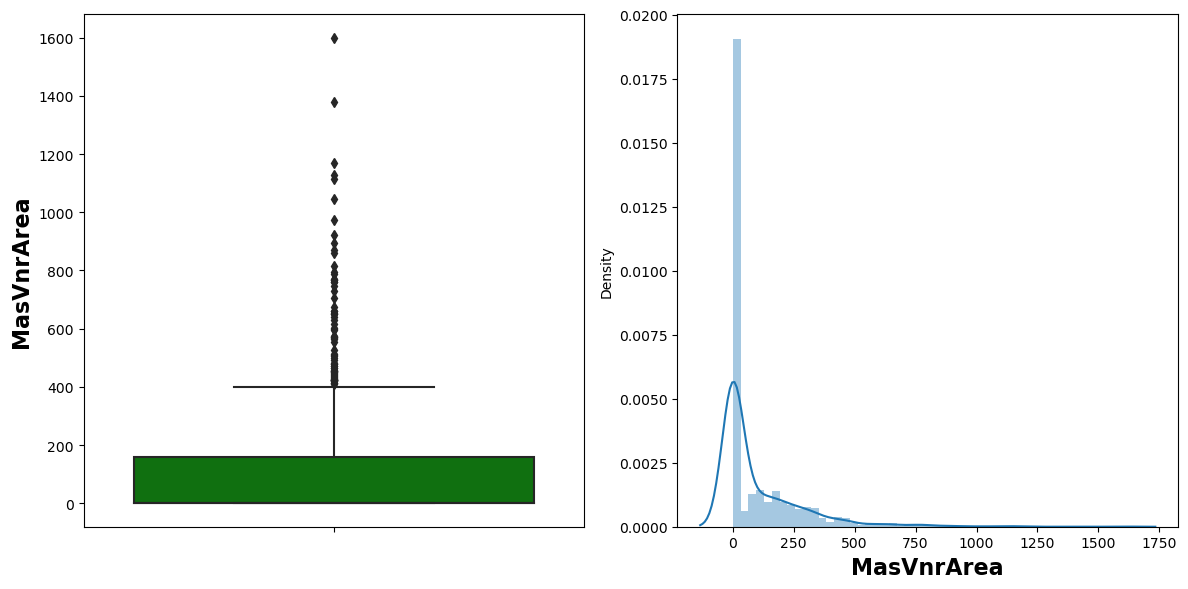

In [69]:
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
sns.boxplot( y = 'MasVnrArea', data= data, color='green')
plt.ylabel('MasVnrArea', fontweight='bold', fontsize= 16)
plt.subplot(1,2,2)
sns.distplot(data['MasVnrArea'])
plt.xlabel('MasVnrArea', fontweight='bold',fontsize=16)
plt.tight_layout()
plt.show()

In [70]:
print('Mean of MasVnrArea:',data['MasVnrArea'].mean())
print('Median of MasVnrArea:',data['MasVnrArea'].median())

Mean of MasVnrArea: 102.31007751937985
Median of MasVnrArea: 0.0


**Outliers are Present in MasVnrArea and mean is sensitive to presense of outliers. So, we imputate with Median.**

In [71]:
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].median())

In [72]:
data['MasVnrArea'].isnull().sum()

0

**Again Missing Value Chek For Finalize Datasets**

In [73]:
data.isnull().sum().sum()

0

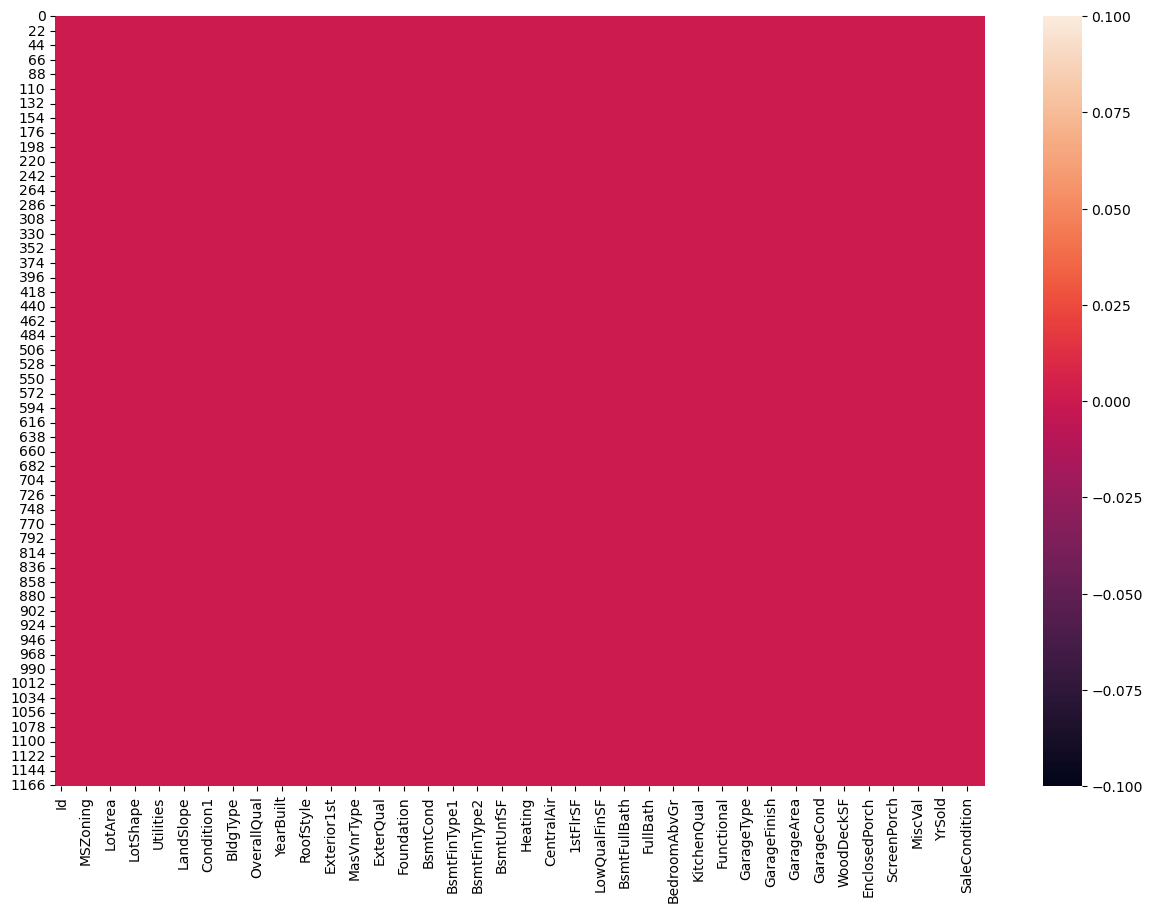

In [74]:
# Final Cheking missing value with heatmap

plt.figure(figsize=(15,10))
sns.heatmap(data.isnull())
plt.show()

**Finally, No Missing value present in House Price Training Dataset.**

# Statistical Matrix

In [75]:
data.describe().T

count           mean           std      min        25%  \
Id             1168.0     724.136130    416.159877      1.0     360.50   
MSSubClass     1168.0      56.767979     41.940650     20.0      20.00   
LotFrontage    1168.0      70.807363     22.440317     21.0      60.00   
LotArea        1168.0   10484.749144   8957.442311   1300.0    7621.50   
OverallQual    1168.0       6.104452      1.390153      1.0       5.00   
OverallCond    1168.0       5.595890      1.124343      1.0       5.00   
YearBuilt      1168.0    1970.930651     30.145255   1875.0    1954.00   
YearRemodAdd   1168.0    1984.758562     20.785185   1950.0    1966.00   
MasVnrArea     1168.0     101.696918    182.218483      0.0       0.00   
BsmtFinSF1     1168.0     444.726027    462.664785      0.0       0.00   
BsmtFinSF2     1168.0      46.647260    163.520016      0.0       0.00   
BsmtUnfSF      1168.0     569.721747    449.375525      0.0     216.00   
TotalBsmtSF    1168.0    1061.095034    442.272249      0.0     799.00   
1stFlrSF       1168.0    1169.860445    391.161983    334.0     892.00   
2ndFlrSF       1168.0     348.826199    439.696370      0.0       0.00   
LowQualFinSF   1168.0       6.380137     50.892844      0.0       0.00   
GrLivArea      1168.0    1525.066781    528.042957    334.0    1143.25   
BsmtFullBath   1168.0       0.425514      0.521615      0.0       0.00   
BsmtHalfBath   1168.0       0.055651      0.236699      0.0       0.00   
FullBath       1168.0       1.562500      0.551882      0.0       1.00   
HalfBath       1168.0       0.388699      0.504929      0.0       0.00   
BedroomAbvGr   1168.0       2.884418      0.817229      0.0       2.00   
KitchenAbvGr   1168.0       1.045377      0.216292      0.0       1.00   
TotRmsAbvGrd   1168.0       6.542808      1.598484      2.0       5.00   
Fireplaces     1168.0       0.617295      0.650575      0.0       0.00   
GarageYrBlt    1168.0    1978.292808     24.202053   1900.0    1962.00   
GarageCars     1168.0       1.776541      0.745554      0.0       1.00   
GarageArea     1168.0     476.860445    214.466769      0.0     338.00   
WoodDeckSF     1168.0      96.206336    126.158988      0.0       0.00   
OpenPorchSF    1168.0      46.559932     66.381023      0.0       0.00   
EnclosedPorch  1168.0      23.015411     63.191089      0.0       0.00   
3SsnPorch      1168.0       3.639555     29.088867      0.0       0.00   
ScreenPorch    1168.0      15.051370     55.080816      0.0       0.00   
PoolArea       1168.0       3.448630     44.896939      0.0       0.00   
MiscVal        1168.0      47.315068    543.264432      0.0       0.00   
MoSold         1168.0       6.344178      2.686352      1.0       5.00   
YrSold         1168.0    2007.804795      1.329738   2006.0    2007.00   
SalePrice      1168.0  181477.005993  79105.586863  34900.0  130375.00   

                    50%        75%       max  
Id                714.5    1079.50    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        70.0      79.25     313.0  
LotArea          9522.5   11515.50  164660.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1972.0    2000.00    2010.0  
YearRemodAdd     1993.0    2004.00    2010.0  
MasVnrArea          0.0     160.00    1600.0  
BsmtFinSF1        385.5     714.50    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         474.0     816.00    2336.0  
TotalBsmtSF      1005.5    1291.50    6110.0  
1stFlrSF         1096.5    1392.00    4692.0  
2ndFlrSF            0.0     729.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1468.5    1795.00    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

**Observation:**

    75% and max column we can conclude that some of the feature contain outliers.
    
    Mean & Median columns we can say that some of features are left skewed while others are right skewed.*
    
    Oldest Property is built in 1875 while recent property build in 2010.
    

In [76]:
data.describe(include=object)

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count      1168   1168     1168        1168      1168      1168      1168   
unique        5      2        4           4         1         5         3   
top          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
freq        928   1164      740        1046      1168       842      1105   

       Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
count          1168       1168       1168     1168       1168      1168   
unique           25          9          8        5          8         6   
top           NAmes       Norm       Norm     1Fam     1Story     Gable   
freq            182       1005       1154      981        578       915   

       RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
count      1168        1168        1168       1168      1168      1168   
unique        8          14          15          4         4         5   
top     CompShg     VinylSd     VinylSd       None        TA        TA   
freq       1144         396         387        703       717      1022   

       Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
count        1168     1168     1168         1168         1168         1168   
unique          6        4        4            4            6            6   
top        CBlock       TA       TA           No          Unf          Unf   
freq          516      547     1071          787          375         1033   

       Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
count     1168      1168       1168       1168        1168       1168   
unique       6         5          2          5           4          7   
top       GasA        Ex          Y      SBrkr          TA        Typ   
freq      1143       585       1090       1070         578       1085   

       GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
count        1168         1168       1168       1168       1168     1168   
unique          6            3          5          5          3        9   
top        Attchd          Unf         TA         TA          Y       WD   
freq          755          551       1114       1125       1071      999   

       SaleCondition  
count           1168  
unique             6  
top           Normal  
freq             945

# Retriving House Prediction Test DataSet

In [77]:
# Retrive Data

dtest=pd.read_csv('House_pred_test.csv')
dtest

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
5     650         180       RM         21.0     1936   Pave   NaN      Reg   
6    1453         180       RM         35.0     3675   Pave   NaN      Reg   
7     152          20       RL        107.0    13891   Pave   NaN      Reg   
8     427          80       RL          NaN    12800   Pave   NaN      Reg   
9     776         120       RM         32.0     4500   Pave   NaN      Reg   
10     30          30       RM         60.0     6324   Pave   NaN      IR1   
11   1425          20       RL          NaN     9503   Pave   NaN      Reg   
12    423          20       RL        100.0    21750   Pave   NaN      Reg   
13   1185          20       RL         50.0    35133   Grvl   NaN      Reg   
14    775          20       RL        110.0    14226   Pave   NaN      Reg   
15    391          50       RL         50.0     8405   Pave  Grvl      Reg   
16   1408          20       RL          NaN     8780   Pave   NaN      IR1   
17    513          20       RL         70.0     9100   Pave   NaN      Reg   
18   1266         160       FV         35.0     3735   Pave   NaN      Reg   
19    173         160       RL         44.0     5306   Pave   NaN      IR1   
20   1150          70       RM         50.0     9000   Pave   NaN      Reg   
21    797          20       RL         71.0     8197   Pave   NaN      Reg   
22    137          20       RL          NaN    10355   Pave   NaN      IR1   
23    706         190       RM         70.0     5600   Pave   NaN      Reg   
24   1377          30       RL         52.0     6292   Pave   NaN      Reg   
25   1177          20       RL         37.0     6951   Pave   NaN      IR1   
26   1456          60       RL         62.0     7917   Pave   NaN      Reg   
27    369          20       RL         78.0     7800   Pave   NaN      Reg   
28   1421          60       RL         90.0    11700   Pave   NaN      Reg   
29    999          30       RM         60.0     9786   Pave   NaN      Reg   
30   1217          90       RM         68.0     8930   Pave   NaN      Reg   
31    937          20       RL         67.0    10083   Pave   NaN      Reg   
32    769          20       RL         70.0     9100   Pave   NaN      Reg   
33    831          20       RL         80.0    11900   Pave   NaN      IR1   
34    678          30       RL         52.0     9022   Pave   NaN      Reg   
35    574          80       RL         76.0     9967   Pave   NaN      IR1   
36    921          60       RL         70.0     8462   Pave   NaN      IR1   
37   1292         160       RM         21.0     1680   Pave   NaN      Reg   
38   1277          60       RL          NaN    12936   Pave   NaN      IR1   
39    676         160       RL         24.0     2289   Pave   NaN      Reg   
40    108          20       RM         50.0     6000   Pave   NaN      Reg   
41    424          60       RL         80.0     9200   Pave   NaN      Reg   
42    823          60       RL          NaN    12394   Pave   NaN      IR1   
43   1455          20       FV         62.0     7500   Pave  Pave      Reg   
44    377          85       RL         57.0     8846   Pave   NaN      IR1   
45   1256          50       RM         52.0     6240   Pave   NaN      Reg   
46   1120          20       RL         70.0     7560   Pave   NaN      Reg   
47    265          30       RM         30.0     5232   Pave  Grvl      IR3   
48   1158         120       RL         34.0     5001   Pave   NaN      IR1   
49    725          20       RL         86.0    13286   Pave   NaN      IR1   
50   1378          50       R

In [78]:
print('No. of Rows :',dtest.shape[0])
print('No. of Columns :', dtest.shape[1])

# See truncated columns

pd.set_option('display.max_columns',None) 
dtest.head()

No. of Rows : 292
No. of Columns : 80


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

**CHEK DATA INTEGRITY AND ANY WHITESPACE**

In [79]:
dtest.duplicated().sum().sum()

0

In [80]:
dtest.isin(['NA','N/A', '-', ' ', '?']).sum().sum()

0

**Chek Missing Value Percentage In Test Dataset**

In [81]:
dtest.isnull().sum().sum()

1407

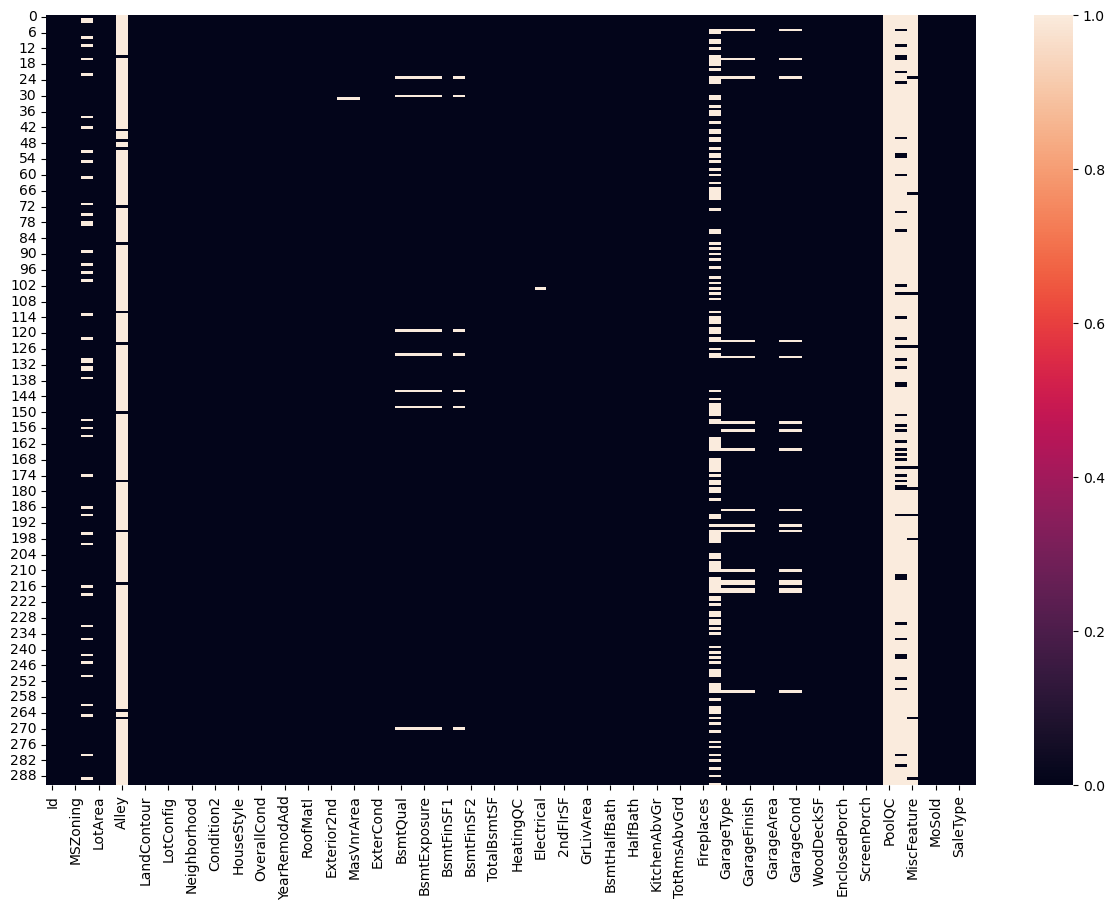

In [82]:
# Chek missing value with heatmap
plt.figure(figsize=(15,10))
sns.heatmap(dtest.isnull())
plt.show()

In [83]:
pd.set_option('display.max_rows',None) 
missing_values = dtest.isnull().sum().sort_values(ascending=False)
per_miss_val = (missing_values/len(dtest))*100
print(pd.concat([missing_values, per_miss_val], axis = 1, keys =['Missing Values', 'Percentage(%) of Missing data']))

               Missing Values  Percentage(%) of Missing data
PoolQC                    292                     100.000000
MiscFeature               282                      96.575342
Alley                     278                      95.205479
Fence                     248                      84.931507
FireplaceQu               139                      47.602740
LotFrontage                45                      15.410959
GarageType                 17                       5.821918
GarageYrBlt                17                       5.821918
GarageQual                 17                       5.821918
GarageCond                 17                       5.821918
GarageFinish               17                       5.821918
BsmtCond                    7                       2.397260
BsmtFinType2                7                       2.397260
BsmtFinType1                7                       2.397260
BsmtQual                    7                       2.397260
BsmtExposure            

# Missing Value Imputation

**We can see Missing Value Is Near By 50% or Above 80% In This Data As Below:**

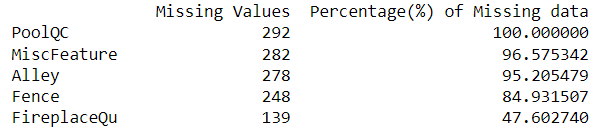

*These Above features contain high amount of Missing Data, There is no way to imputate these data. So, we are going to drop these features.*

In [84]:
dtest.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis =1, inplace = True)

In [85]:
dtest.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0   337          20       RL         86.0    14157   Pave      IR1   
1  1018         120       RL          NaN     5814   Pave      IR1   
2   929          20       RL          NaN    11838   Pave      Reg   
3  1148          70       RL         75.0    12000   Pave      Reg   
4  1227          60       RL         86.0    14598   Pave      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
0             1          Gd             8        Typ           1     Attchd   
1             1          Gd             4        Typ           1     Attchd   
2             1          Ex             7        Typ           1     Attchd   
3             1          Fa             7        Typ           1     

In [86]:
dtest.shape

(292, 75)

In [87]:
dtest.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


**Fill Null Values**

In [88]:
dtest['GarageYrBlt'].dtypes

dtype('float64')

In [89]:
dtest['LotFrontage'].dtypes

dtype('float64')

In [90]:
dtest['MasVnrArea'].dtypes

dtype('float64')

In [91]:
# Sort column on their data types

dtest.columns.to_series().groupby(dtest.dtypes).groups

{int64: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'], float64: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], object: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 

In [92]:
dtest['LotFrontage'] = dtest['LotFrontage'].fillna(dtest['LotFrontage'].median())
dtest['GarageType'] = dtest['GarageType'].fillna(dtest['GarageType'].mode()[0])
dtest['GarageYrBlt']= dtest['GarageYrBlt'].fillna(dtest['GarageYrBlt'].median())
dtest['GarageFinish']= dtest['GarageFinish'].fillna(dtest['GarageFinish'].mode()[0])
dtest['GarageQual'] = dtest['GarageQual'].fillna(dtest['GarageQual'].mode()[0])
dtest['GarageCond'] = dtest['GarageCond'].fillna(dtest['GarageCond'].mode()[0])
dtest['BsmtFinType2'] = dtest['BsmtFinType2'].fillna(dtest['BsmtFinType2'].mode()[0])
dtest['BsmtExposure'] = dtest['BsmtExposure'].fillna(dtest['BsmtExposure'].mode()[0])
dtest['BsmtFinType1'] = dtest['BsmtFinType1'].fillna(dtest['BsmtFinType1'].mode()[0])
dtest['BsmtCond'] = dtest['BsmtCond'].fillna(dtest['BsmtCond'].mode()[0])
dtest['BsmtQual'] = dtest['BsmtQual'].fillna(dtest['BsmtQual'].mode()[0])
dtest['MasVnrType'] = dtest['MasVnrType'].fillna(dtest['MasVnrType'].mode()[0])
dtest['MasVnrArea'] = dtest['MasVnrArea'].fillna(dtest['MasVnrArea'].median())
dtest['Electrical'] = dtest['Electrical'].fillna(dtest['Electrical'].mode()[0])

**Final Chek Missing Value In Test Dataset**

In [93]:
pd.set_option('display.max_rows',None) 
missing_values = dtest.isnull().sum().sort_values(ascending=False)
per_miss_val = (missing_values/len(dtest))*100
print(pd.concat([missing_values, per_miss_val], axis = 1, keys =['Missing Values', 'Percentage(%) of Missing data']))

               Missing Values  Percentage(%) of Missing data
Id                          0                            0.0
GarageType                  0                            0.0
Functional                  0                            0.0
TotRmsAbvGrd                0                            0.0
KitchenQual                 0                            0.0
KitchenAbvGr                0                            0.0
BedroomAbvGr                0                            0.0
HalfBath                    0                            0.0
FullBath                    0                            0.0
BsmtHalfBath                0                            0.0
BsmtFullBath                0                            0.0
GrLivArea                   0                            0.0
LowQualFinSF                0                            0.0
2ndFlrSF                    0                            0.0
1stFlrSF                    0                            0.0
Electrical              

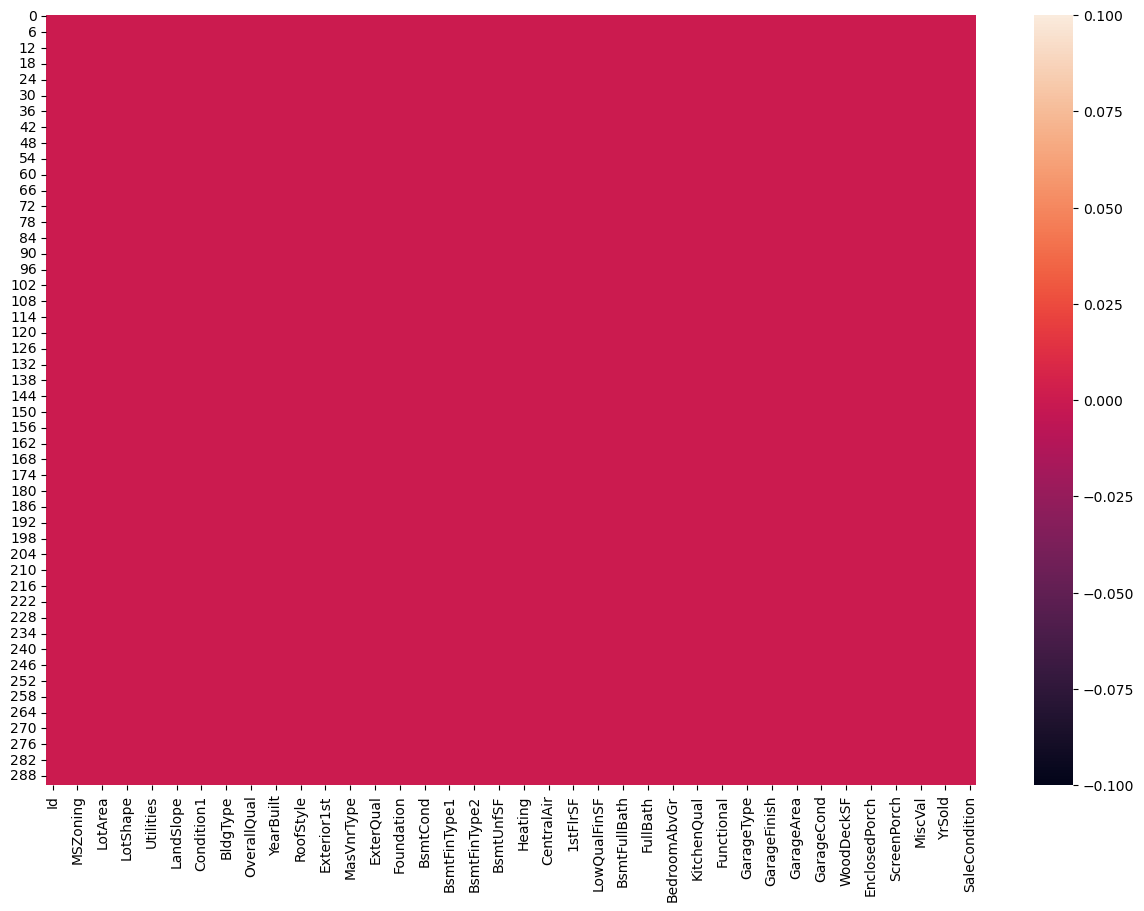

In [94]:
# Chek null value in heatmap

plt.figure(figsize=(15,10))
sns.heatmap(dtest.isnull())
plt.show()

**No Missing Value Present in Test Dataset**

# Exploratory Data Analysis[EDA]

**MSZoning: Identifies the general zoning classification of the sale.**

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

# Visualization 

MSZoning: Identifies the general zoning classification of the sale.

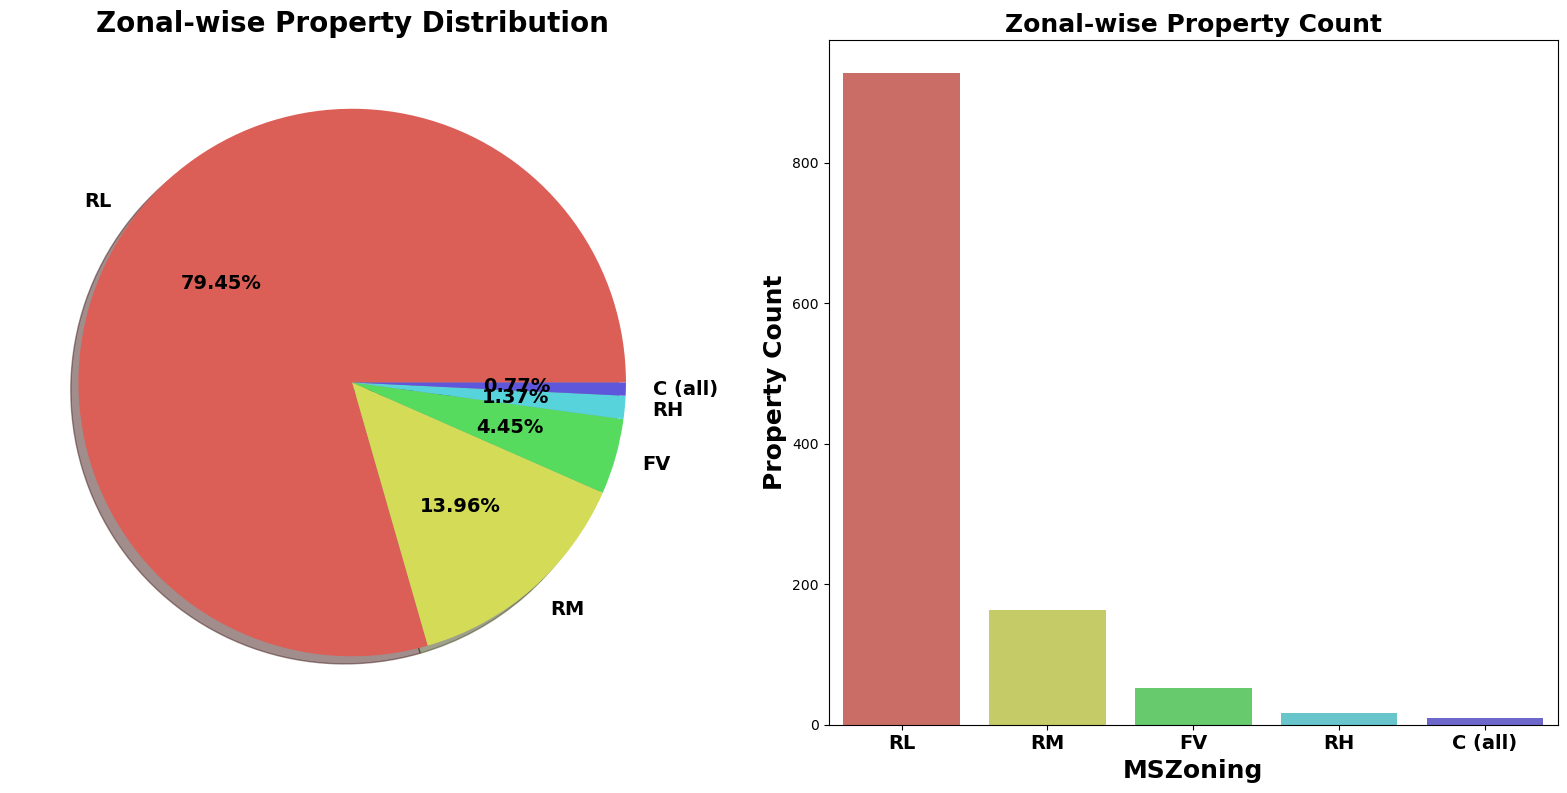

In [95]:
# pie chart

plt.rcParams["figure.autolayout"] = True
sns.set_palette('hls')
fig, ax=plt.subplots(1,2,figsize=(16,8))
data['MSZoning'].value_counts().plot.pie(autopct='%3.2f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':14}, ax=ax[0],shadow=True)
ax[0].set_title('Zonal-wise Property Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

# count plot

sns.countplot('MSZoning', data=data,ax=ax[1])
ax[1].set_title('Zonal-wise Property Count',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("MSZoning",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Property Count",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.show()

**Observation:**

79.45% of House properties belongs to Low Density Residential Area(RL).

13.96 % of properties belong to Medium Density Residential Area(RM).

Very Few property (0.77%) belongs to Commerical zone(C(all)).

**Compare Zonal Wise Relation With Sale Price**

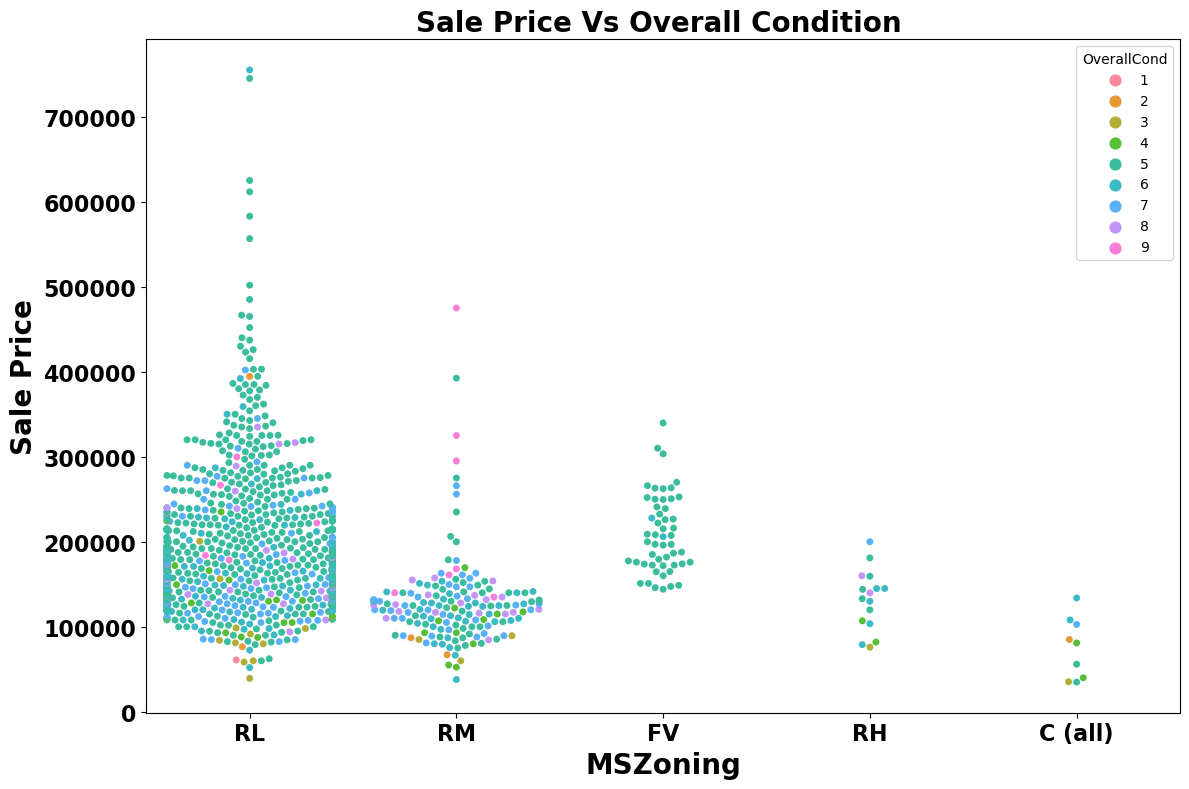

In [96]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('gnuplot2_r')
plt.figure(figsize=(12,8))
sns.swarmplot(y=data['SalePrice'], x=data['MSZoning'], hue =data['OverallCond'])
plt.title("Sale Price Vs Overall Condition ",fontsize=20,fontweight ='bold')
plt.xlabel('MSZoning',fontsize = 20,fontweight ='bold')
plt.ylabel('Sale Price',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

**Observation :**

Most of property for sale have overall condition rating of either 5 or 6.

80% of housing data belongs to Low density Residential Area and Now we can see in Swramplot that Sale Price inside RL Zone is much higher than other remaining zone.

Cheapest properties are available in Commerical zone.



**LotFrontage: Linear feet of street connected to property**

Compare LotFrontage with Sale Price

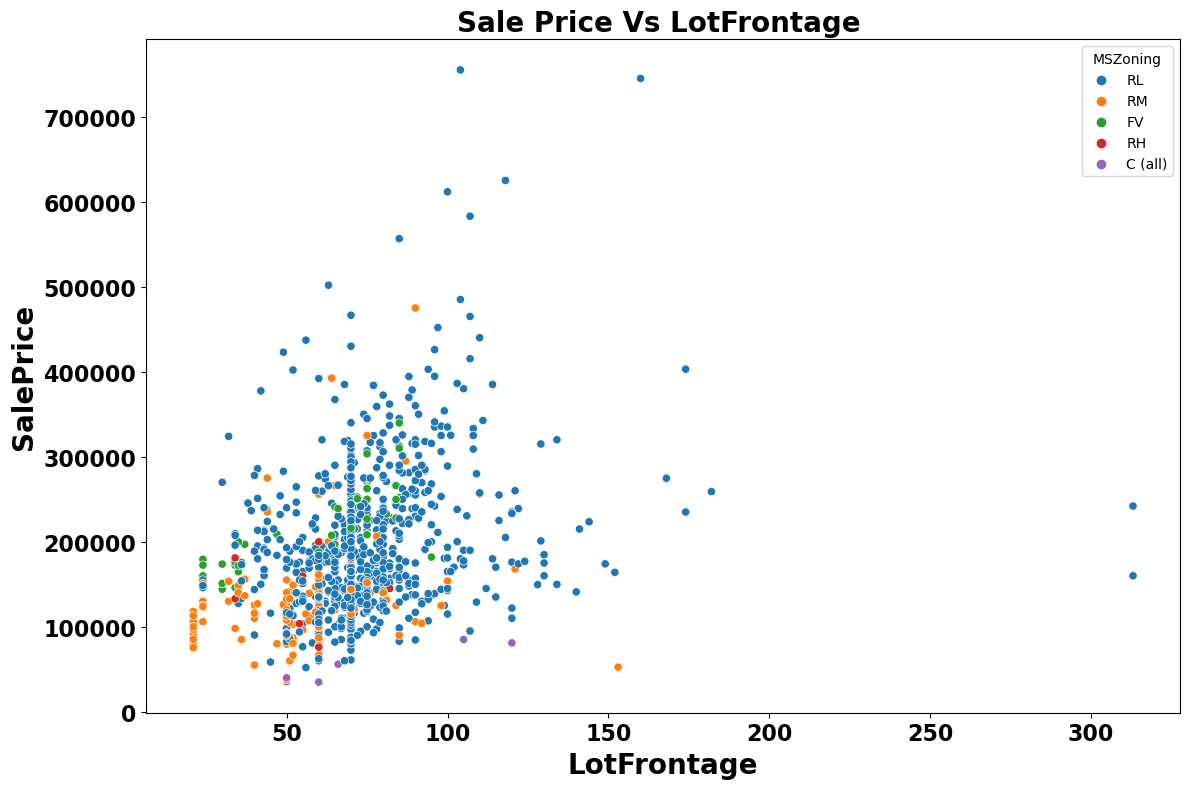

In [97]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('tab10')
plt.figure(figsize=(12,8))
sns.scatterplot(y=data['SalePrice'], x=data['LotFrontage'], hue =data['MSZoning'])
plt.title("Sale Price Vs LotFrontage ",fontsize=20,fontweight ='bold')
plt.xlabel('LotFrontage',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

**Observation:**

 Lot Frontage area increase and the Sale Price is also increase.

**Compare Average Sale Price of House**

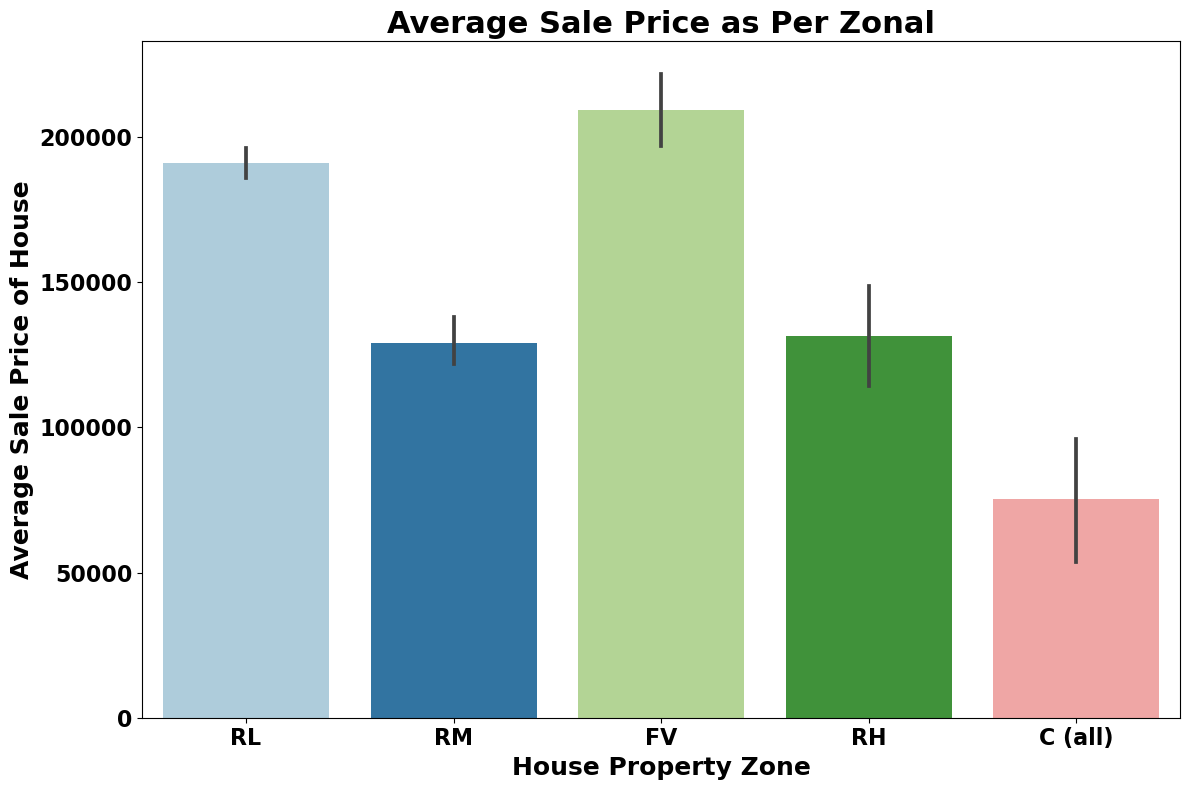

In [98]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette("Paired")
plt.figure(figsize = (12,8))
sns.barplot(y = data['SalePrice'], x= data['MSZoning'])
plt.title('Average Sale Price as Per Zonal', fontsize=22, fontweight='bold')
plt.xlabel('House Property Zone', fontsize= 18, fontweight='bold')
plt.ylabel('Average Sale Price of House', fontsize=18, fontweight= 'bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

**Observation :**

In Average sale price of housing Floating Village Residential Zone are costiler than other

**LotShape: General shape of property**

   Reg	  *Regular*	
   
   IR1	  *Slightly irregular*
   
   IR2	  *Moderately Irregular*
   
   IR3	  *Irregular*

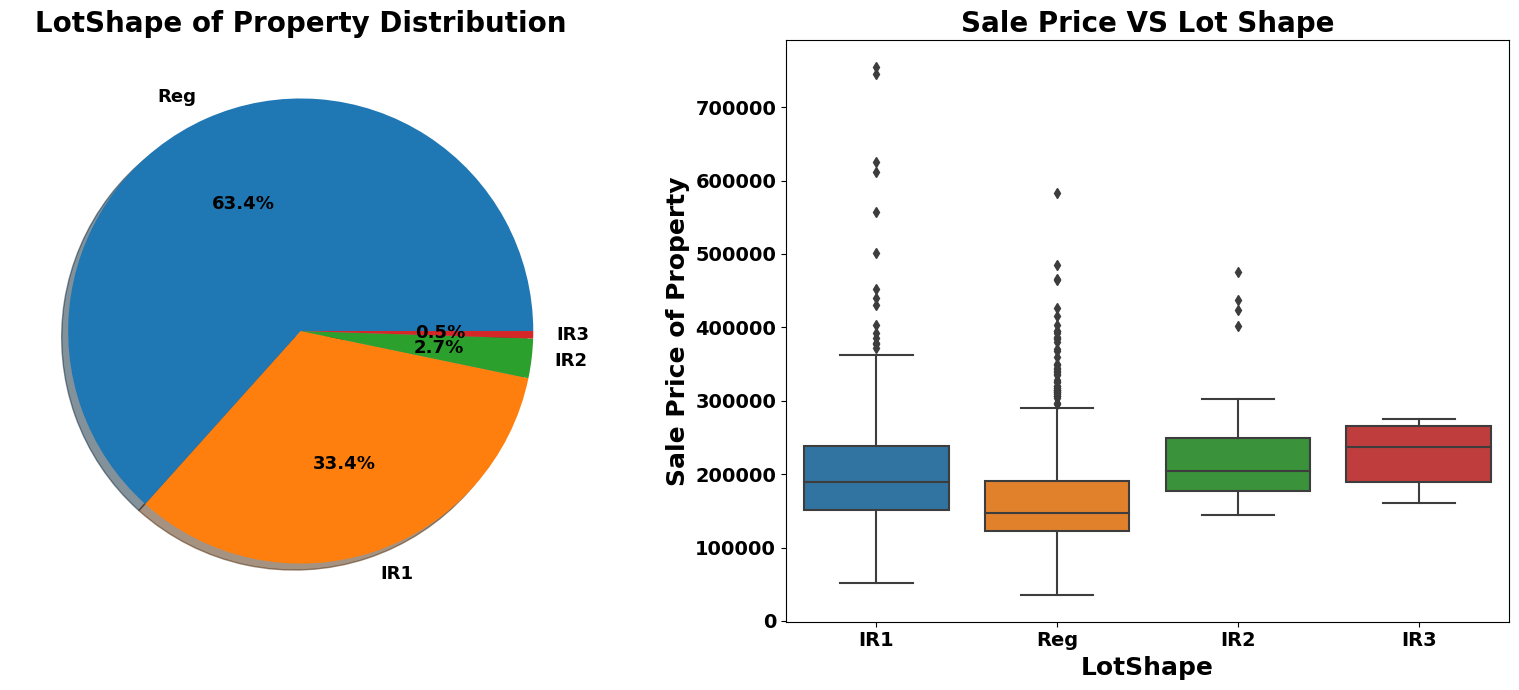

In [99]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('tab10')
f,ax=plt.subplots(1,2,figsize=(16,7))
data['LotShape'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13,'fontweight':'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('LotShape of Property Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.boxplot(y=data['SalePrice'], x=data['LotShape'], ax=ax[1])
ax[1].set_title('Sale Price VS Lot Shape',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("LotShape",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

**Observation :**

63.4% house properties are regular in shape.

Sale Price of property with slight irregular shape is higher than regular shape.

**LandContour: Flatness of the property**

   Lvl	- Near Flat/Level
   
   Bnk	- Banked - Quick and significant rise from street grade to building
   
   HLS	- Hillside - Significant slope from side to side
   
   Low	- Depression

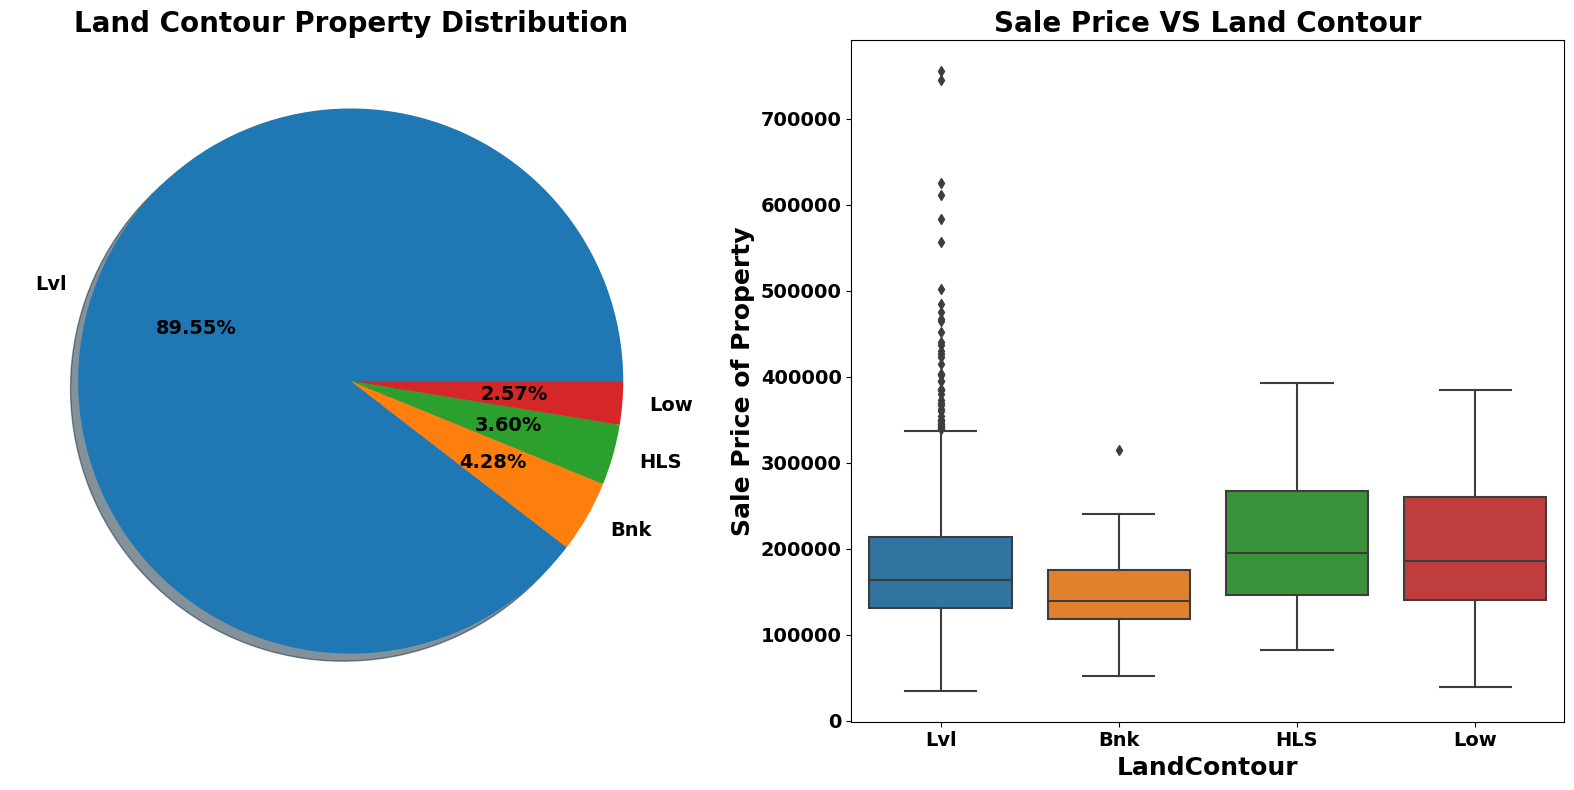

In [100]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('tab10')
f,ax=plt.subplots(1,2,figsize=(16,8))
data['LandContour'].value_counts().plot.pie(autopct='%2.2f%%',
                                          textprops ={ 'fontsize':14,'fontweight':'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Land Contour Property Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.boxplot(y=data['SalePrice'], x=data['LandContour'], ax=ax[1])
ax[1].set_title('Sale Price VS Land Contour',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("LandContour",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

**Observation :**

89.55% of House properties are near flat level surface.

Also price for Flat level surface house(Lvl) is much higher than Bnk, HLS, and Low.

**LotConfig: Lot configuration**

   Inside	- Inside lot
   
   Corner	- Corner lot
   
   CulDSac	- Cul-de-sac
   
   FR2	- Frontage on 2 sides of property
   
   FR3	- Frontage on 3 sides of property

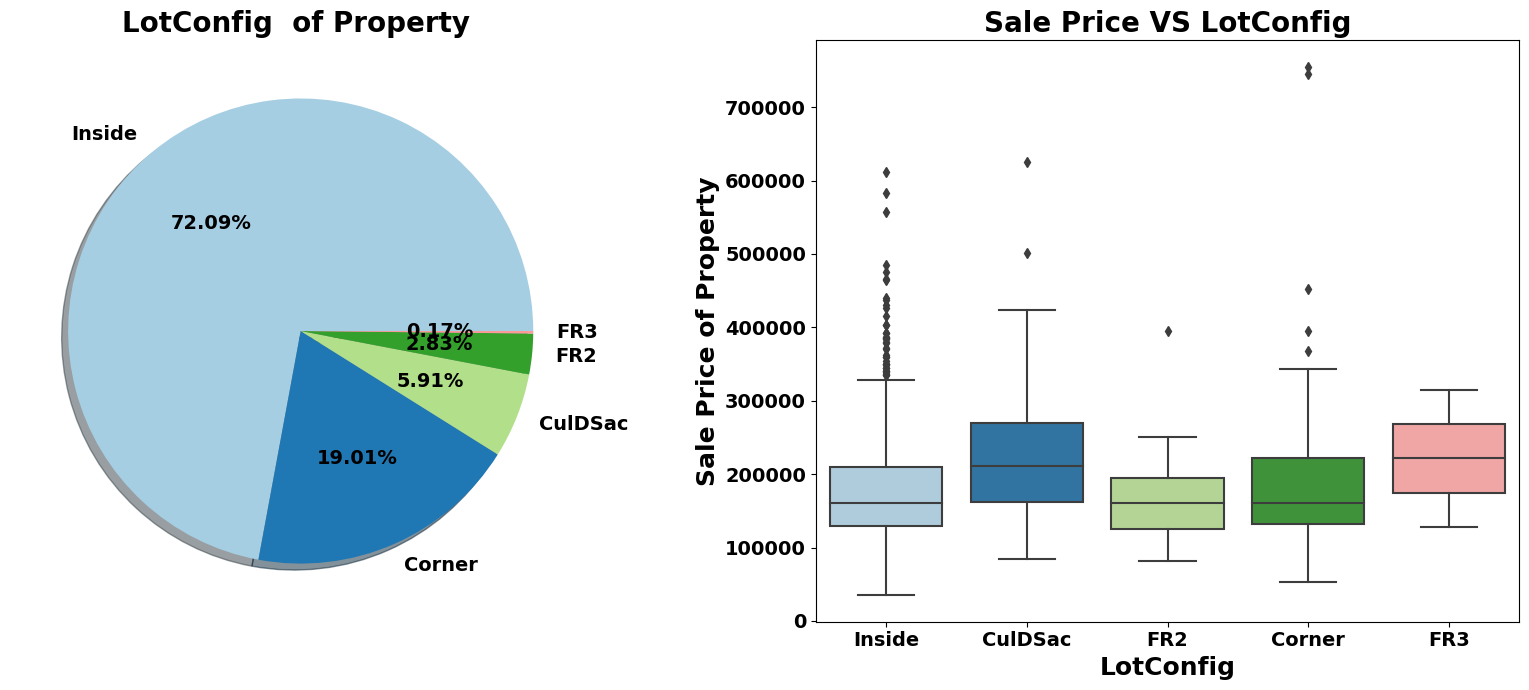

In [101]:
# Lot Configuration comparision with sale price

plt.rcParams["figure.autolayout"] = True
sns.set_palette('Paired')
f,ax=plt.subplots(1,2,figsize=(16,7))
data['LotConfig'].value_counts().plot.pie(autopct='%2.2f%%',
                                          textprops ={'fontsize':14,'fontweight':'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('LotConfig  of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.boxplot(y=data['SalePrice'], x=data['LotConfig'], ax=ax[1])
ax[1].set_title('Sale Price VS LotConfig',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("LotConfig",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

**Observation :**

72.09 % of house comes with inside Lot configuration.

Cul-de-sac have maxmium Mean Sale Price.

Uncostly Houses belong to Inside lot configuration.

Costly Houses belongs to Corner Lot Configuration.

**LandSlope: Slope of property** 

       Gtl	- Gentle slope
       Mod	- Moderate Slope	
       Sev	- Severe Slope

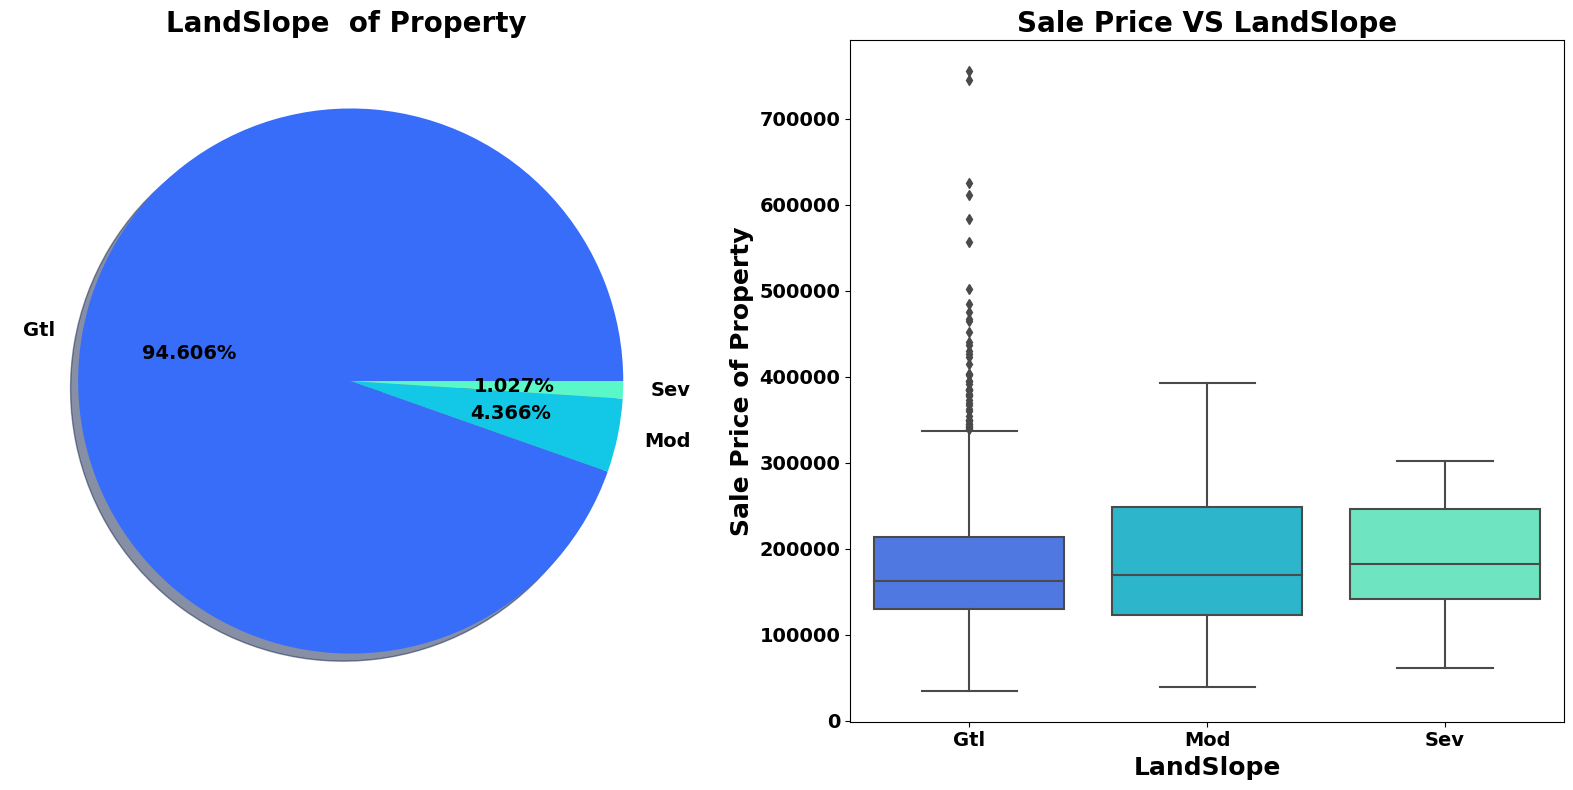

In [102]:
# Slope of property comparision with sale price

plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,8))
data['LandSlope'].value_counts().plot.pie(autopct='%2.3f%%',
                                          textprops ={'fontsize':14,'fontweight':'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('LandSlope  of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.boxplot(y=data['SalePrice'], x=data['LandSlope'], ax=ax[1])
ax[1].set_title('Sale Price VS LandSlope',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("LandSlope",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

**Observation :**

Clearly we can see in boxplot Land slope increases the Sale price of house decreases.

1.027% properties come with severe slope and they come with low price compare to Gentle Slope properties.

**BldgType: Type of dwelling**
		
       1Fam	    - Single-family Detached
       
       2FmCon	- Two-family Conversion; originally built as one-family dwelling
       
       Duplx	- Duplex
       
       TwnhsE	- Townhouse End Unit
       
       TwnhsI	- Townhouse Inside Unit
       
**HouseStyle: Style of dwelling**
	
       1Story	- One story
       
       1.5Fin	- One and one-half story: 2nd level finished
       
       1.5Unf	- One and one-half story: 2nd level unfinished
       
       2Story	- Two story
       
       2.5Fin	- Two and one-half story: 2nd level finished
       
       2.5Unf	- Two and one-half story: 2nd level unfinished
       
       SFoyer	- Split Foyer
       
       SLvl	    - Split Level
       
**OverallQual: Rates the overall material and finish of the house**

       10	- Very Excellent
       
       9	- Excellent
       
       8	- Very Good
       
       7	- Good
       
       6	- Above Average
       
       5	- Average
       
       4	- Below Average
       
       3	- Fair
       
       2	- Poor
       
       1	- Very Poor
	
**OverallCond: Rates the overall condition of the house**

       10	- Very Excellent
       
       9	- Excellent
       
       8	- Very Good
       
       7	- Good
       
       6	- Above Average
       
       5	- Average
       
       4	- Below Average
       
       3	- Fair
       
       2	- Poor
       
       1	- Very Poor

In [103]:
col_list = ["BldgType", "HouseStyle", "OverallQual", "OverallCond"]

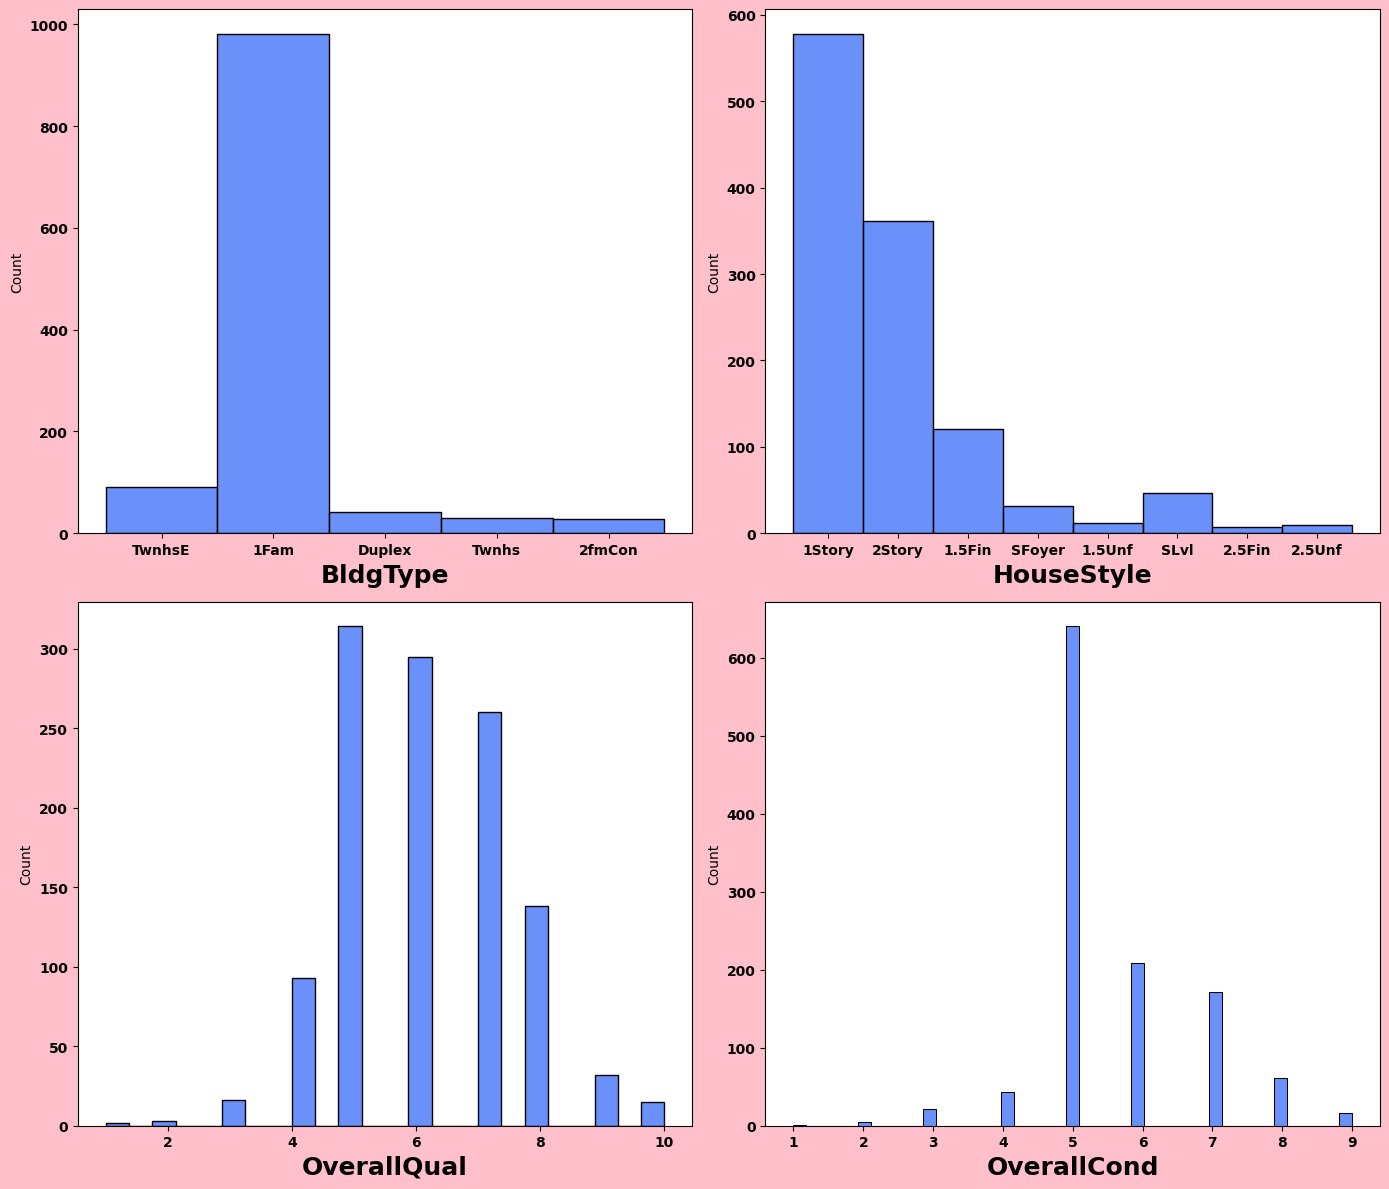

In [104]:
plt.figure(figsize=(14,12),facecolor='pink')
pl=1

for i in col_list:
    if pl<=4:
        ax=plt.subplot(2, 2, pl)
        sns.histplot( data[i])
        plt.xlabel(i,fontsize=18,fontweight ='bold')
        plt.xticks(fontsize=10, fontweight ='bold')
        plt.yticks(fontsize=10, fontweight ='bold')
    pl+=1
plt.tight_layout()
plt.show()

**Observation :**

More than 950 house properties are with building type Single-family Detached(1Fam)

Approx 50% of house properties Overall Condition Rating of 5.

Approx 50% to 70% of house properties Quality Rating between 5 to 7.

Approx 550 House Style are one story.

**Showing Sale Price Of House In Box-plot**

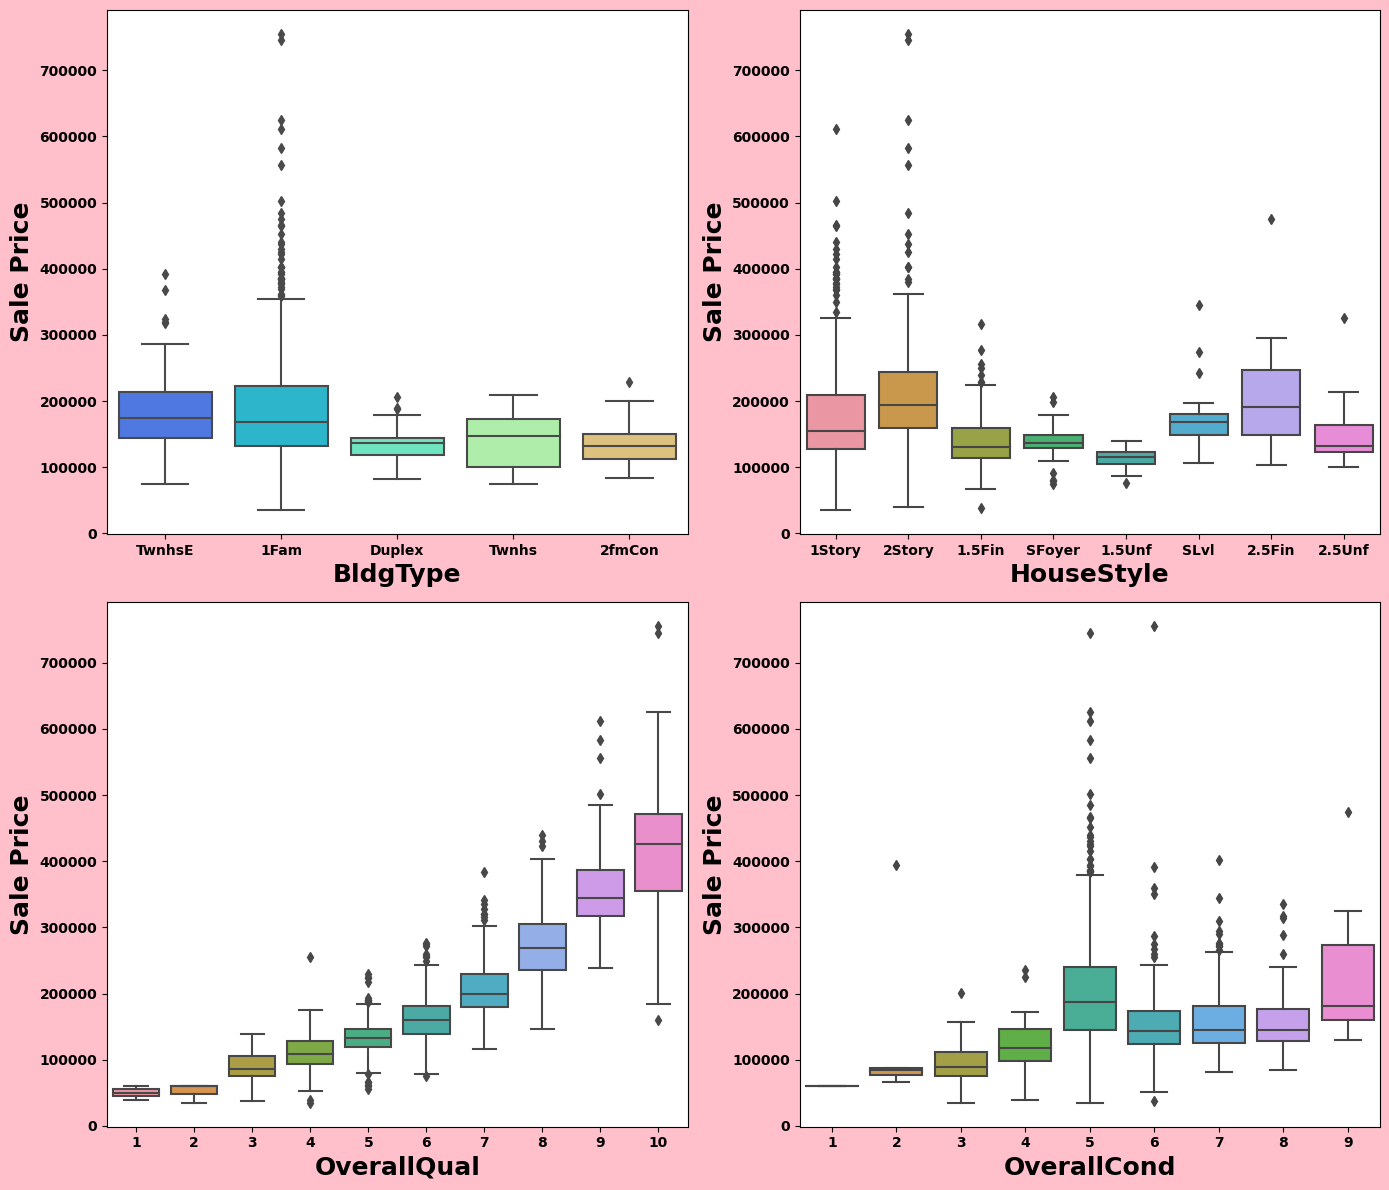

In [105]:
plt.figure(figsize=(14,12),facecolor='pink')
pl=1

for i in col_list:
    if pl<=4:
        ax=plt.subplot(2, 2, pl)
        sns.boxplot(y=data['SalePrice'], x=data[i])
        plt.xlabel(i,fontsize=18,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize =18, fontweight='bold')
        plt.xticks(fontsize=10, fontweight ='bold')
        plt.yticks(fontsize=10, fontweight ='bold')
    pl+=1
plt.tight_layout()
plt.show()

**Observation:**

*OverallQual: Rates the overall material and finish of the house*

Overall Quality Rating Is Increases and House Price Is Also Increases.


In [106]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

**YearBuilt:** Original construction date


**YearRemodAdd:** Remodel date (same as construction date if no remodeling or additions)


**GarageYrBlt:** Year garage was built


**YrSold:** Year Sold (YYYY)


In [107]:
col_list_2 = ['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt']

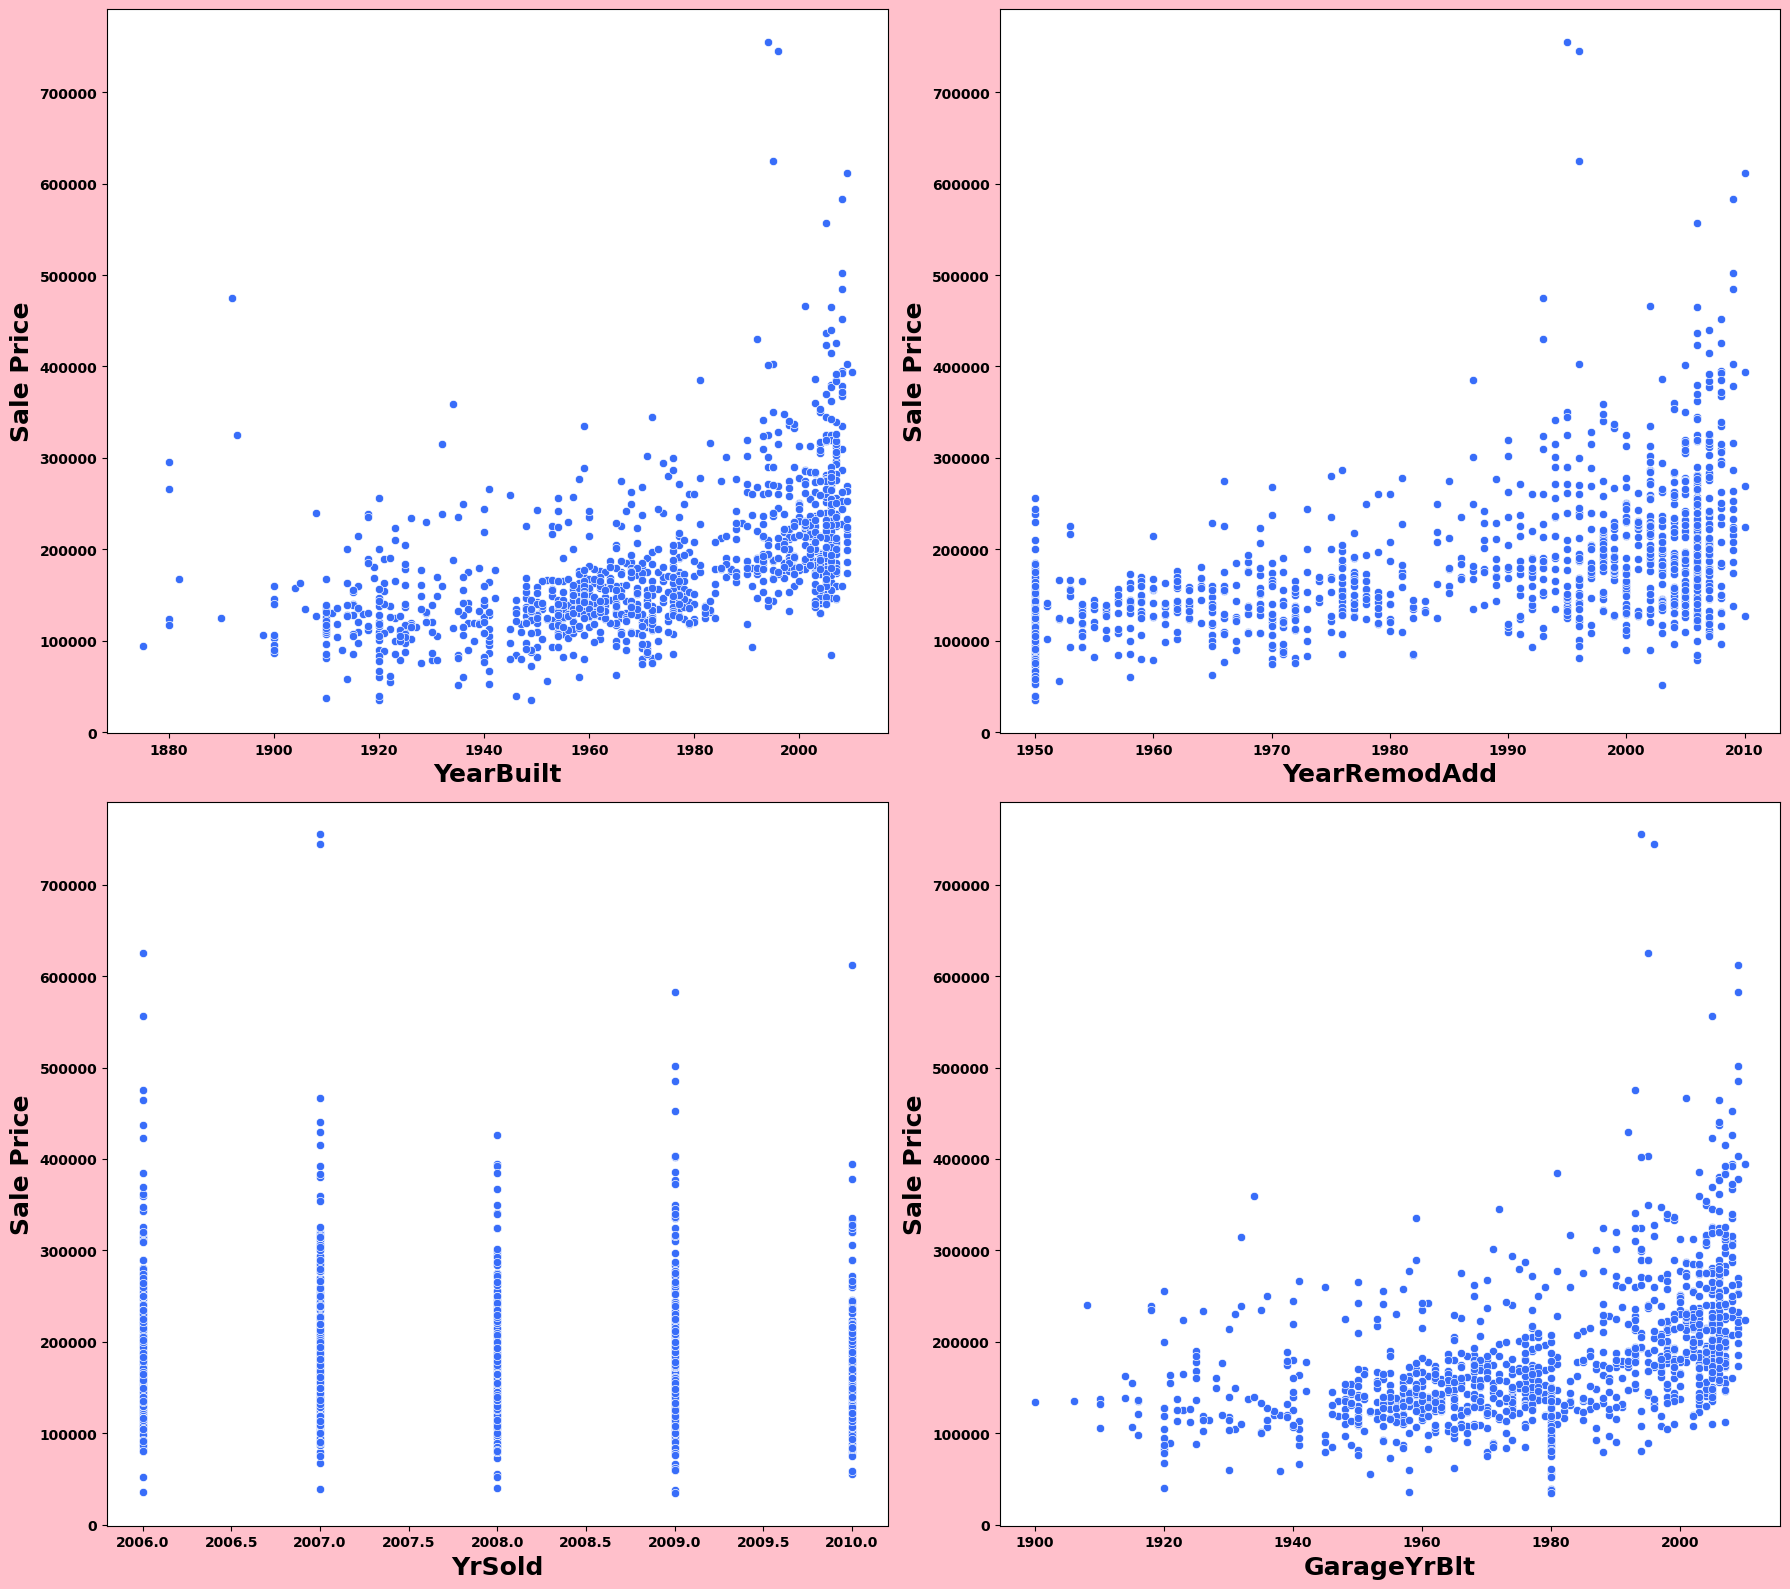

In [108]:
plt.figure(figsize=(18,16),facecolor='pink')
pt=1

for i in col_list_2:
    if pt<=4:
        ax=plt.subplot(2, 2, pt)
        sns.scatterplot(y = data['SalePrice'], x= data[i])
        plt.xlabel(i,fontsize=18,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize =18, fontweight='bold')
        plt.xticks(fontweight ='bold')
        plt.yticks(fontweight ='bold')
    pt+=1
plt.tight_layout()
plt.show()

**Observation:**

Property Year Built Time Increses and Sale Price is Also Increases.

Year of Remodeling Between 1990 to 2000 is Increase and Sale price is also Increase.

Highest year of sold propery in 2007 and Sale Price is also high rate.

The Highest sale Price of Garage Year Built In Between 1980 to 2000

**SaleType: Type of sale**
		
       WD 	- Warranty Deed - Conventional
       CWD	- Warranty Deed - Cash
       VWD	- Warranty Deed - VA Loan
       New	- Home just constructed and sold
       COD	- Court Officer Deed/Estate
       Con	- Contract 15% Down payment regular terms
       ConLw - Contract Low Down payment and low interest
       ConLI	- Contract Low Interest
       ConLD	- Contract Low Down
       Oth	- Other

Defining Property sale type

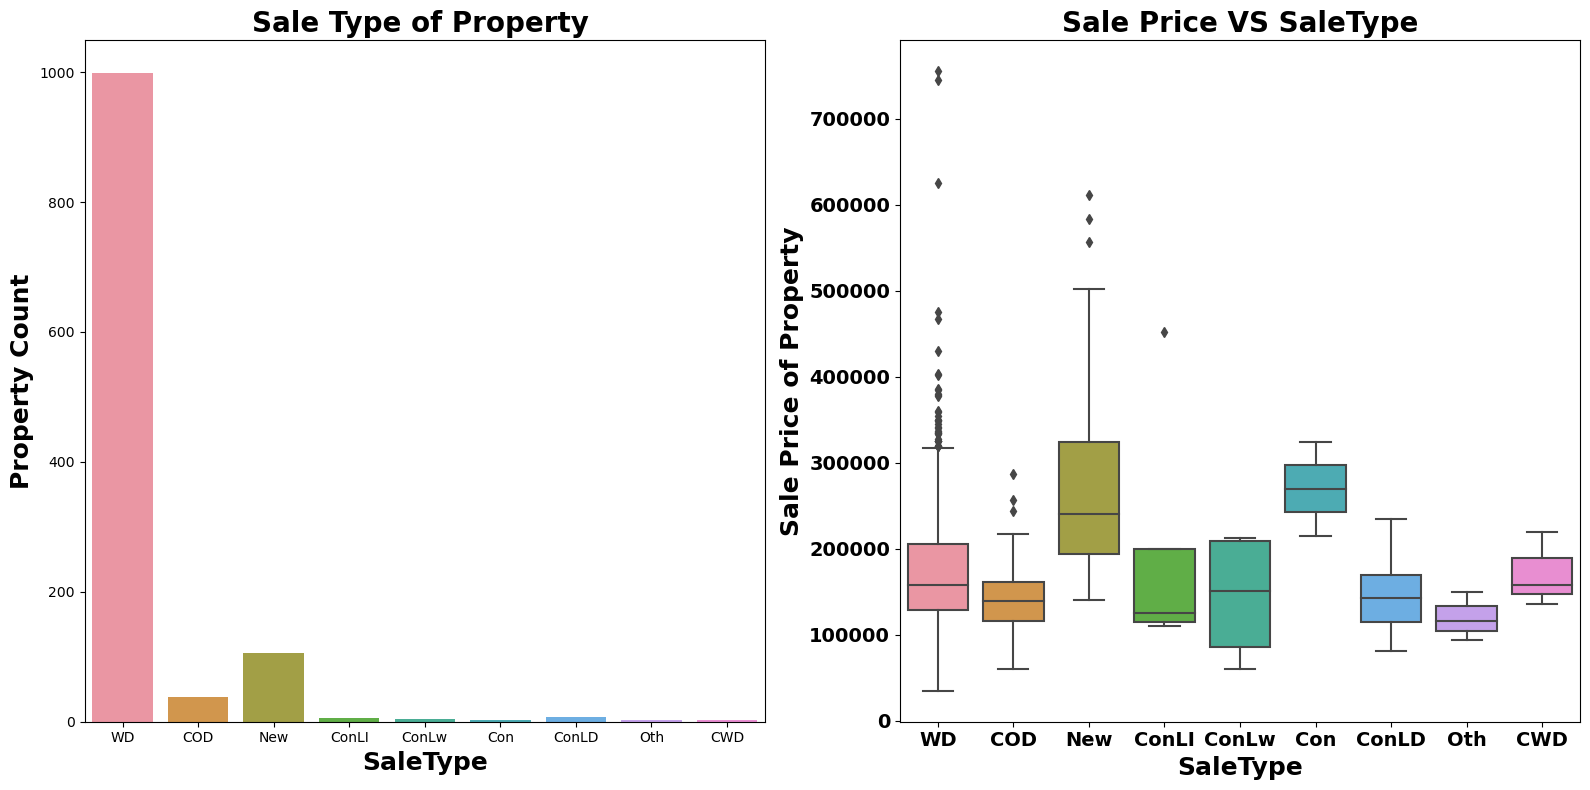

In [109]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot_r')
f,ax=plt.subplots(1,2,figsize=(16,8))
sns.countplot('SaleType',data=data,ax=ax[0])
ax[0].set_title('Sale Type of Property ', fontsize=20, fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18, fontweight ='bold')
ax[0].set_xlabel('SaleType', fontsize=18, fontweight ='bold')
plt.xticks(fontsize=14, fontweight ='bold')

sns.boxplot(y=data['SalePrice'], x=data['SaleType'], ax=ax[1])
ax[1].set_title('Sale Price VS SaleType',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("SaleType",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14, fontweight ='bold')
plt.yticks(fontsize=14, fontweight ='bold')
plt.show()

**Observation :**

Around 1000 sales happen by Conventional Warranty Deed.

Home just constructed and sold category are much expensive than other.

Loan based sales are below 300000.

**SaleCondition: Condition of sale**

       Normal	- Normal Sale
       Abnorml	- Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	- Adjoining Land Purchase
       Alloca	- Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	- Sale between family members
       Partial	- Home was not completed when last assessed (associated with New Homes)

Compare Sale Condition with Sale Price

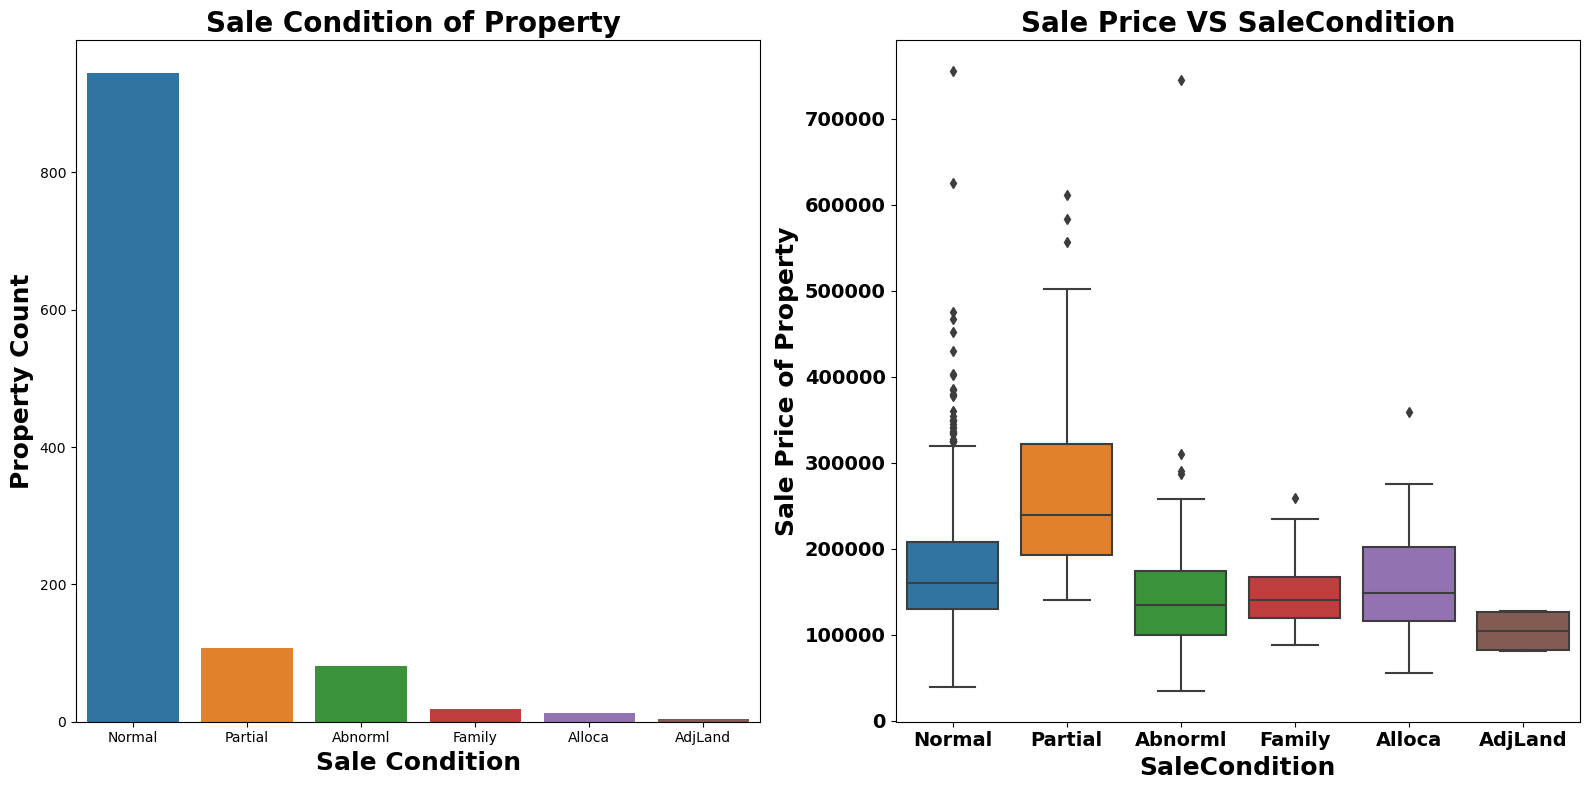

In [110]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('tab10')
f,ax=plt.subplots(1,2,figsize=(16,8))
sns.countplot('SaleCondition',data=data,ax=ax[0])
ax[0].set_title('Sale Condition of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('Sale Condition', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=data['SalePrice'], x=data['SaleCondition'], ax=ax[1])
ax[1].set_title('Sale Price VS SaleCondition',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("SaleCondition",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

**Observation :**

Sale with condition like Abnorml, Family, Alloca, AdjLand are below the price of 300000.

Maximum Base Price for House comes from Partial category.

Highest property count comes from Normal sale.

**RoofStyle: Type of roof**

       Flat	    - Flat
       
       Gable	- Gable
       
       Gambrel	- Gabrel (Barn)
       
       Hip	    - Hip
       
       Mansard	- Mansard
       
       Shed	    - Shed

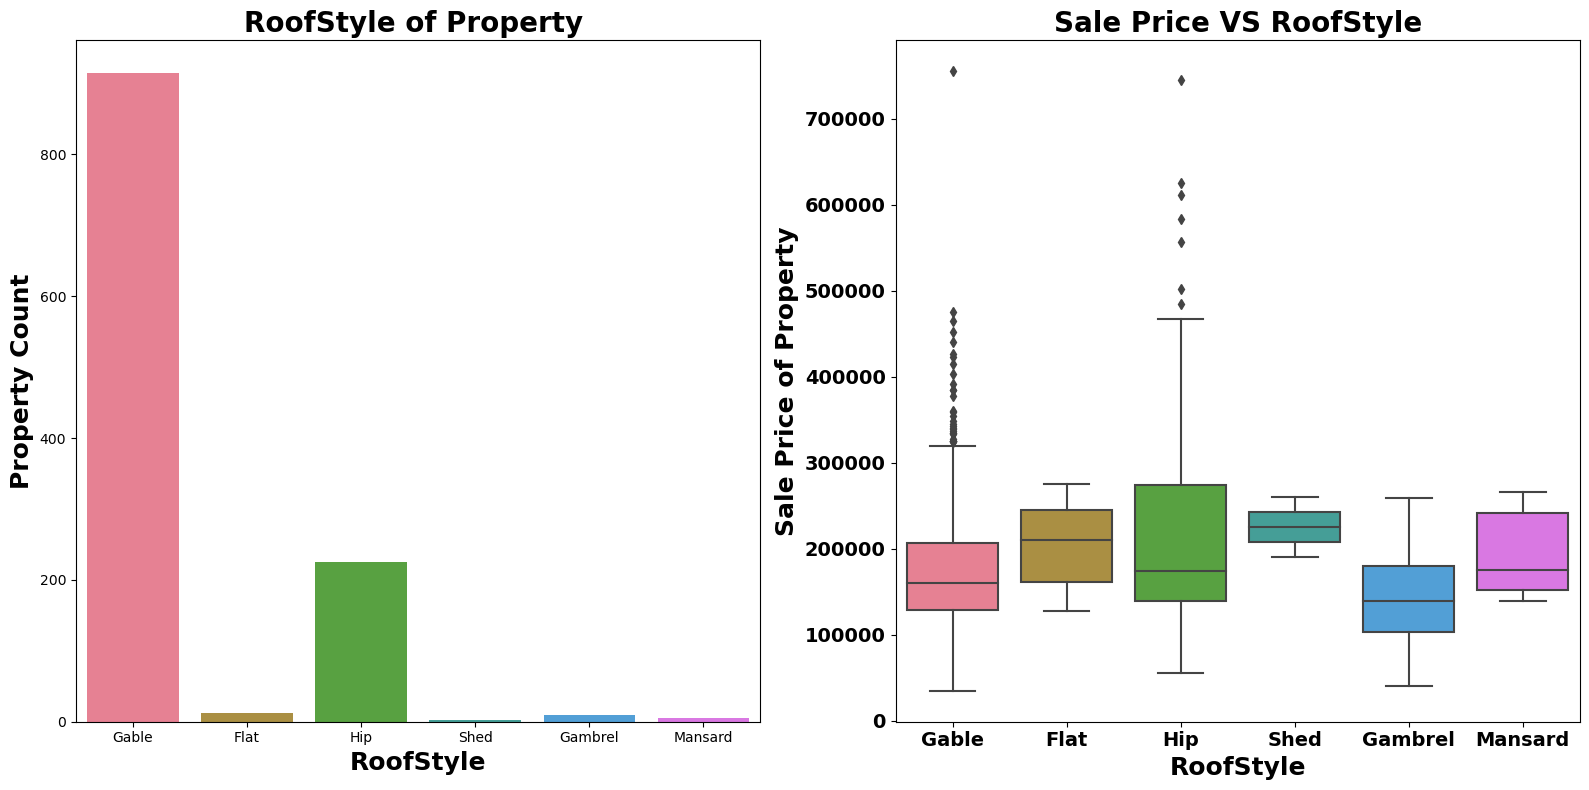

In [111]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig, ax=plt.subplots(1,2,figsize=(16,8))
sns.countplot('RoofStyle',data=data,ax=ax[0])
ax[0].set_title('RoofStyle of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('RoofStyle', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=data['SalePrice'], x=data['RoofStyle'], ax=ax[1])
ax[1].set_title('Sale Price VS RoofStyle',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("RoofStyle",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

**Observation :**

Approx 80% House properties come with Gable Roof Style and around 20 % house properties with Hip Style.

In Boxplot Hip style Roof are much Expensive than other roof style.

**RoofMatl: Roof material**

       ClyTile	- Clay or Tile
       CompShg	- Standard (Composite) Shingle
       Membran	- Membrane
       Metal	- Metal
       Roll	    - Roll
       Tar&Grv	- Gravel & Tar
       WdShake	- Wood Shakes
       WdShngl	- Wood Shingles

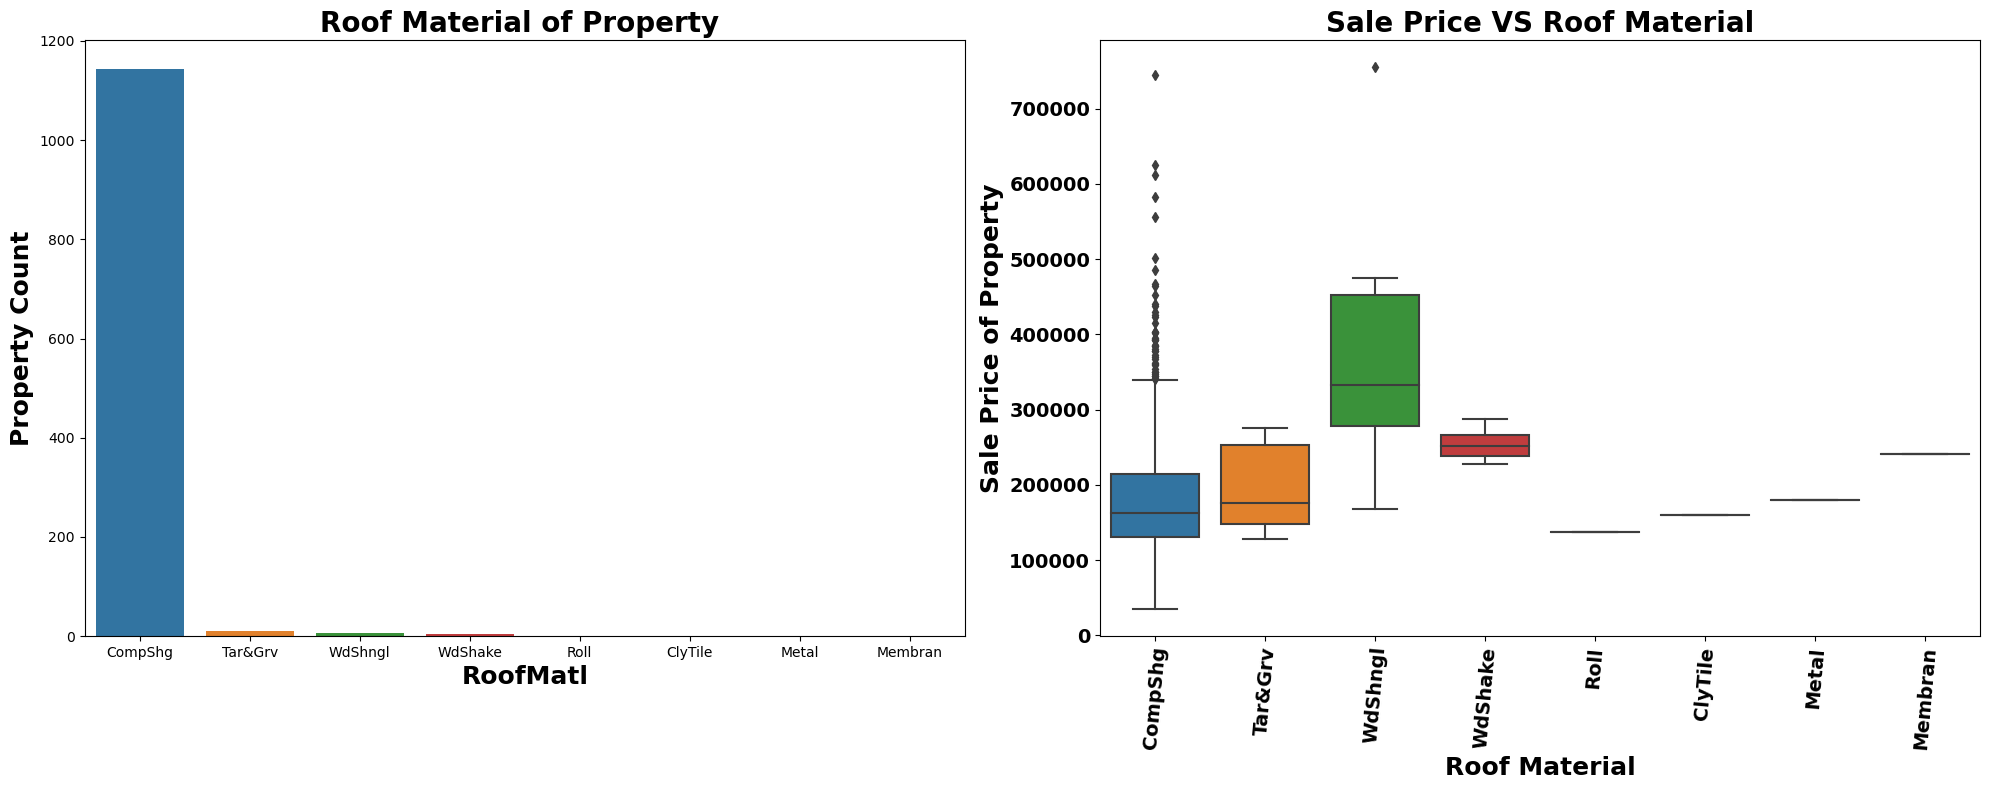

In [112]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('tab10')
fig, ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot('RoofMatl',data=data,ax=ax[0])
ax[0].set_title('Roof Material of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('RoofMatl', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=data['SalePrice'], x=data['RoofMatl'], ax=ax[1])
ax[1].set_title('Sale Price VS Roof Material',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Roof Material",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold', rotation=85)
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

**Observation :**

Approx 90% Properties in Data set made with Standard (Composite) Shingle Roof Material.

Wood Shingles Roof is Very Costly compare to Other Roof Material.

**Exterior1st and Exterior2nd : Exterior covering on house**

       AsbShng	- Asbestos Shingles
       AsphShn	- Asphalt Shingles
       BrkComm	- Brick Common
       BrkFace	- Brick Face
       CBlock	- Cinder Block
       CemntBd	- Cement Board
       HdBoard	- Hard Board
       ImStucc	- Imitation Stucco
       MetalSd	- Metal Siding
       Other	- Other
       Plywood	- Plywood
       PreCast	- PreCast	
       Stone	- Stone
       Stucco	- Stucco
       VinylSd	- Vinyl Siding
       Wd Sdng	- Wood Siding
       WdShing	- Wood Shingles
       
**MasVnrType: Masonry veneer type**

       BrkCmn	- Brick Common
       BrkFace	- Brick Face
       CBlock	- Cinder Block
       None	    - None
       Stone	- Stone
       
**ExterQual: Evaluates the quality of the material on the exterior** 
		
       Ex	- Excellent
       Gd	- Good
       TA	- Average/Typical
       Fa	- Fair
       Po	- Poor
		
**ExterCond: Evaluates the present condition of the material on the exterior**
		

In [113]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [114]:
col_list_3 = ["Exterior1st","Exterior2nd", "MasVnrType", "ExterQual", "ExterCond"]

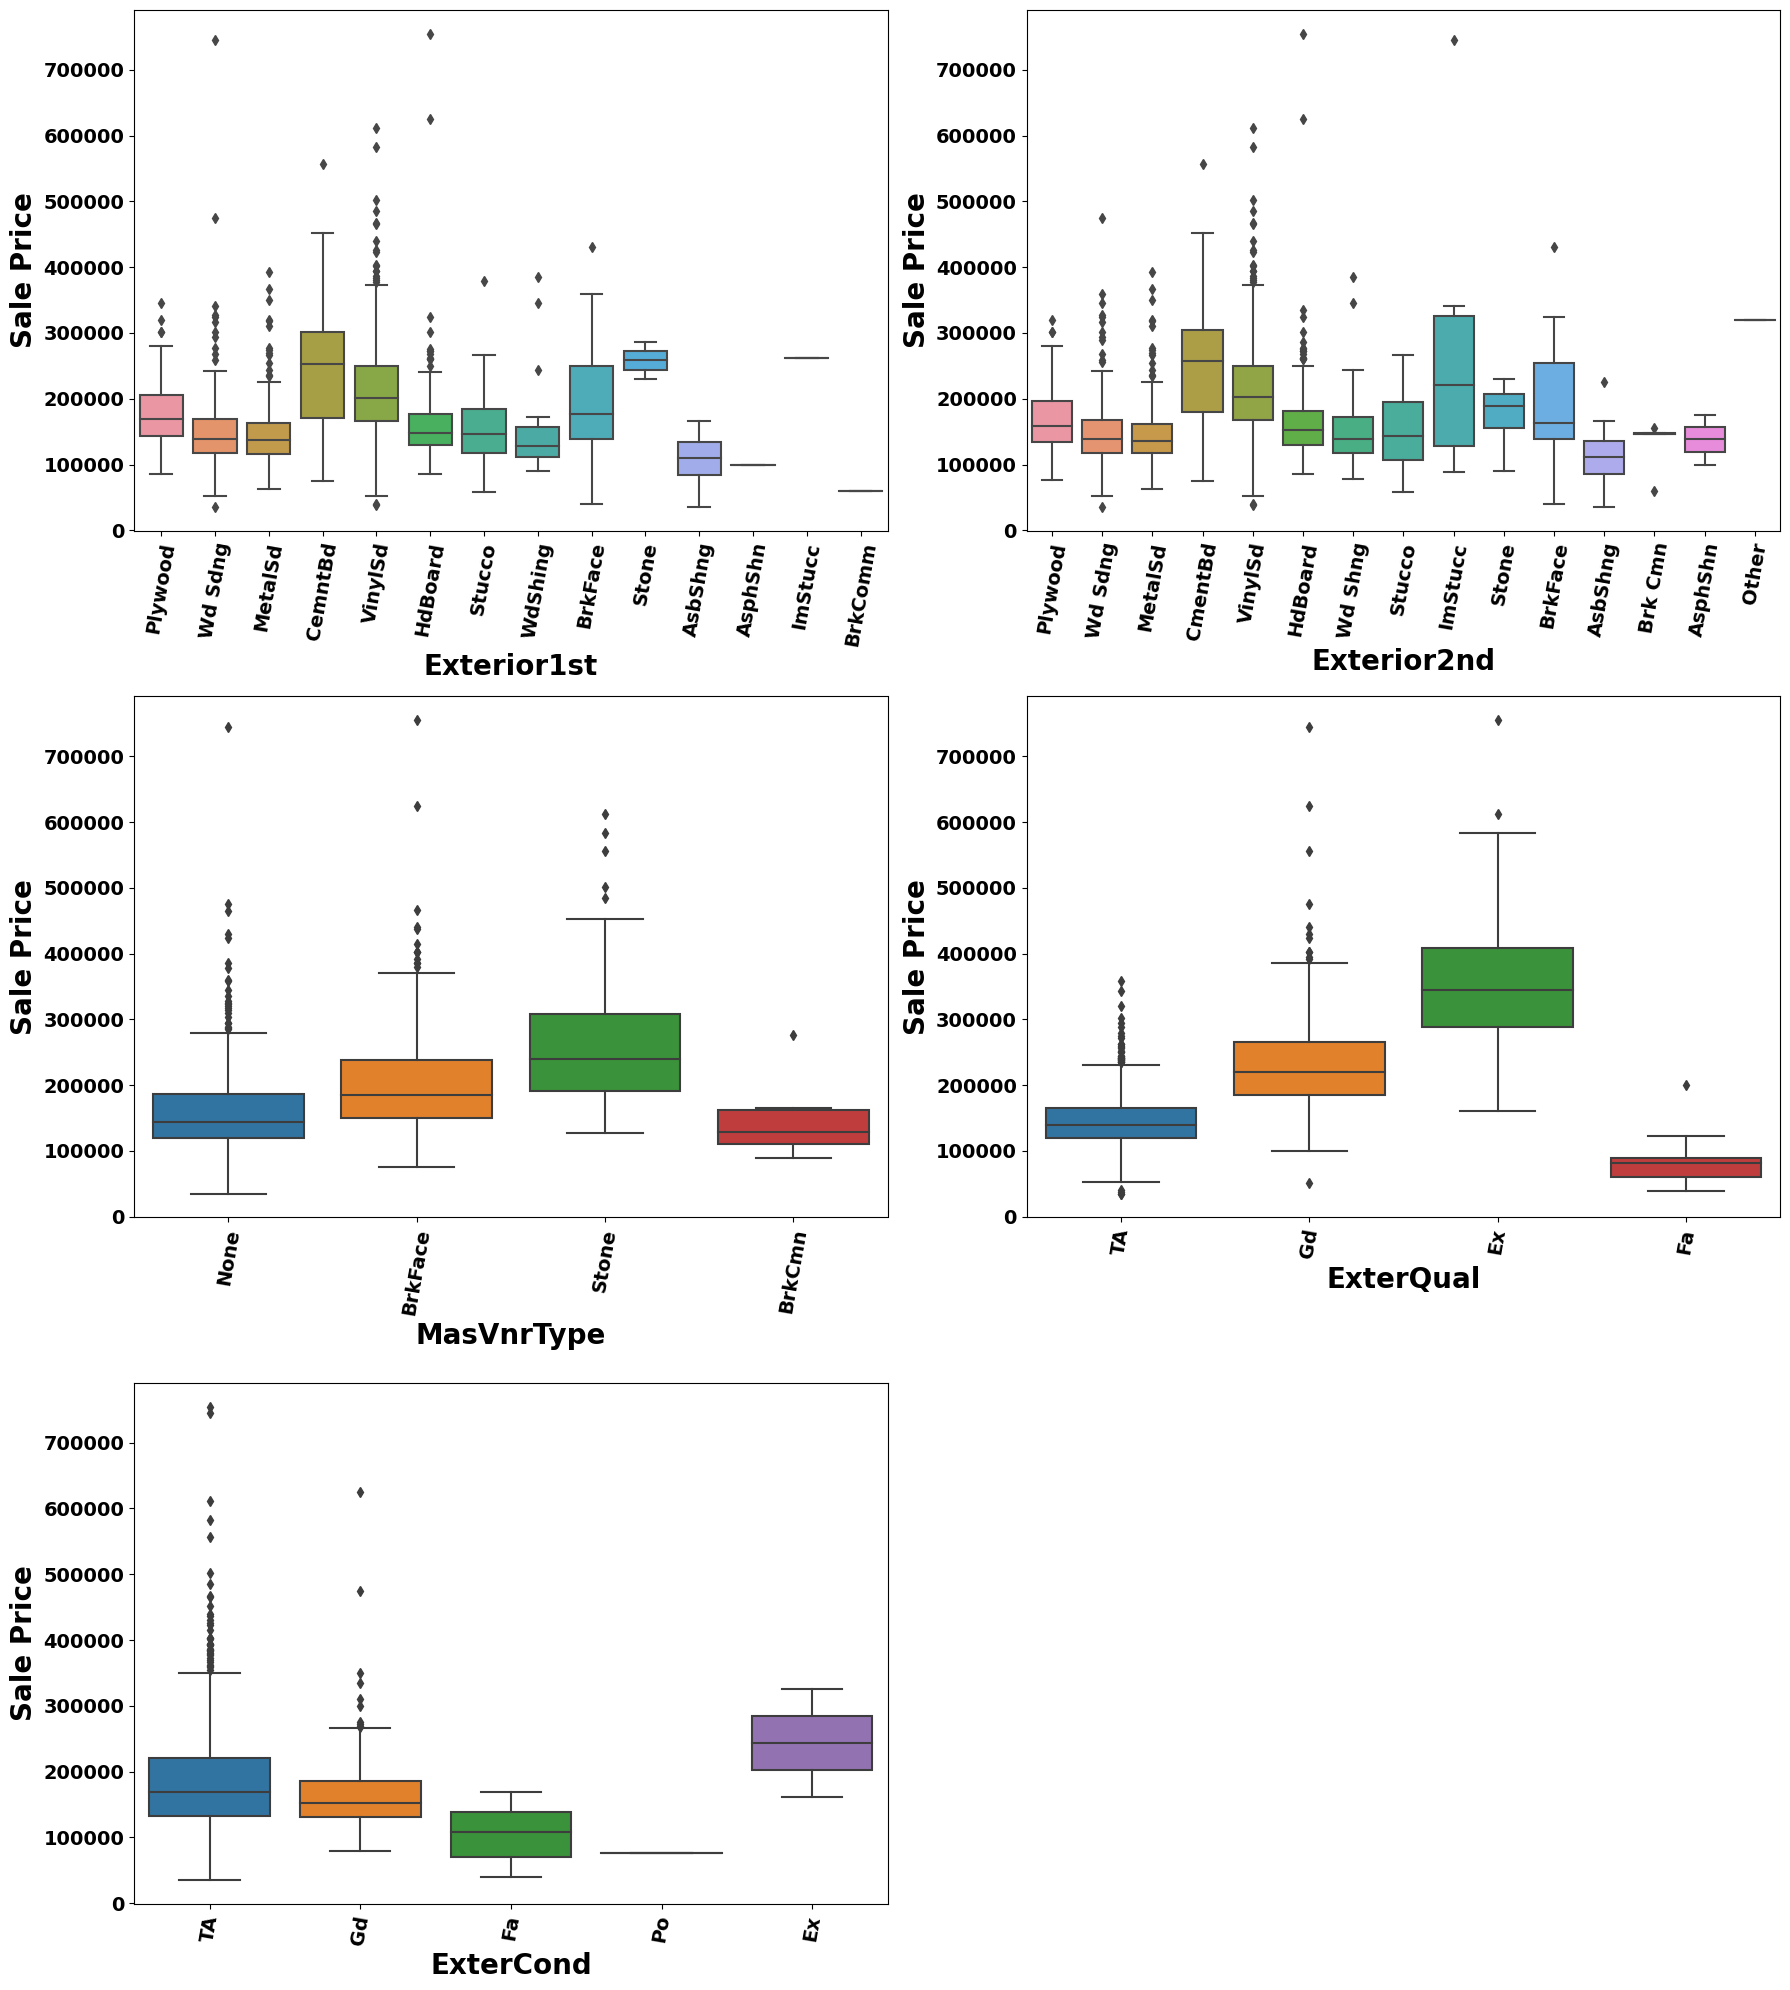

In [115]:
plt.figure(figsize=(18,20),facecolor='white')
plno=1

for i in col_list_3:
    if plno<=5:
        ax=plt.subplot(3,2,plno)
        
        sns.boxplot(y = data['SalePrice'], x= data[i])
        plt.xlabel(i,fontsize=20,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize =20, fontweight='bold')
        plt.xticks(fontsize=14, fontweight ='bold', rotation=80)
        plt.yticks(fontsize=14, fontweight ='bold')
    plno+=1
plt.tight_layout()
plt.show()

**Observation:**

Approx 60% of house properties come with Average Exterior quality and all of them below 400000.

Very few House Properties comes with Excellent Exterior Quality.

Costiler house properties come with Good & Excellent exterior quality.

**Foundation: Type of foundation**
		
       BrkTil	- Brick & Tile
       CBlock	- Cinder Block
       PConc	- Poured Contrete	
       Slab	    - Slab
       Stone	- Stone
       Wood	    - Wood

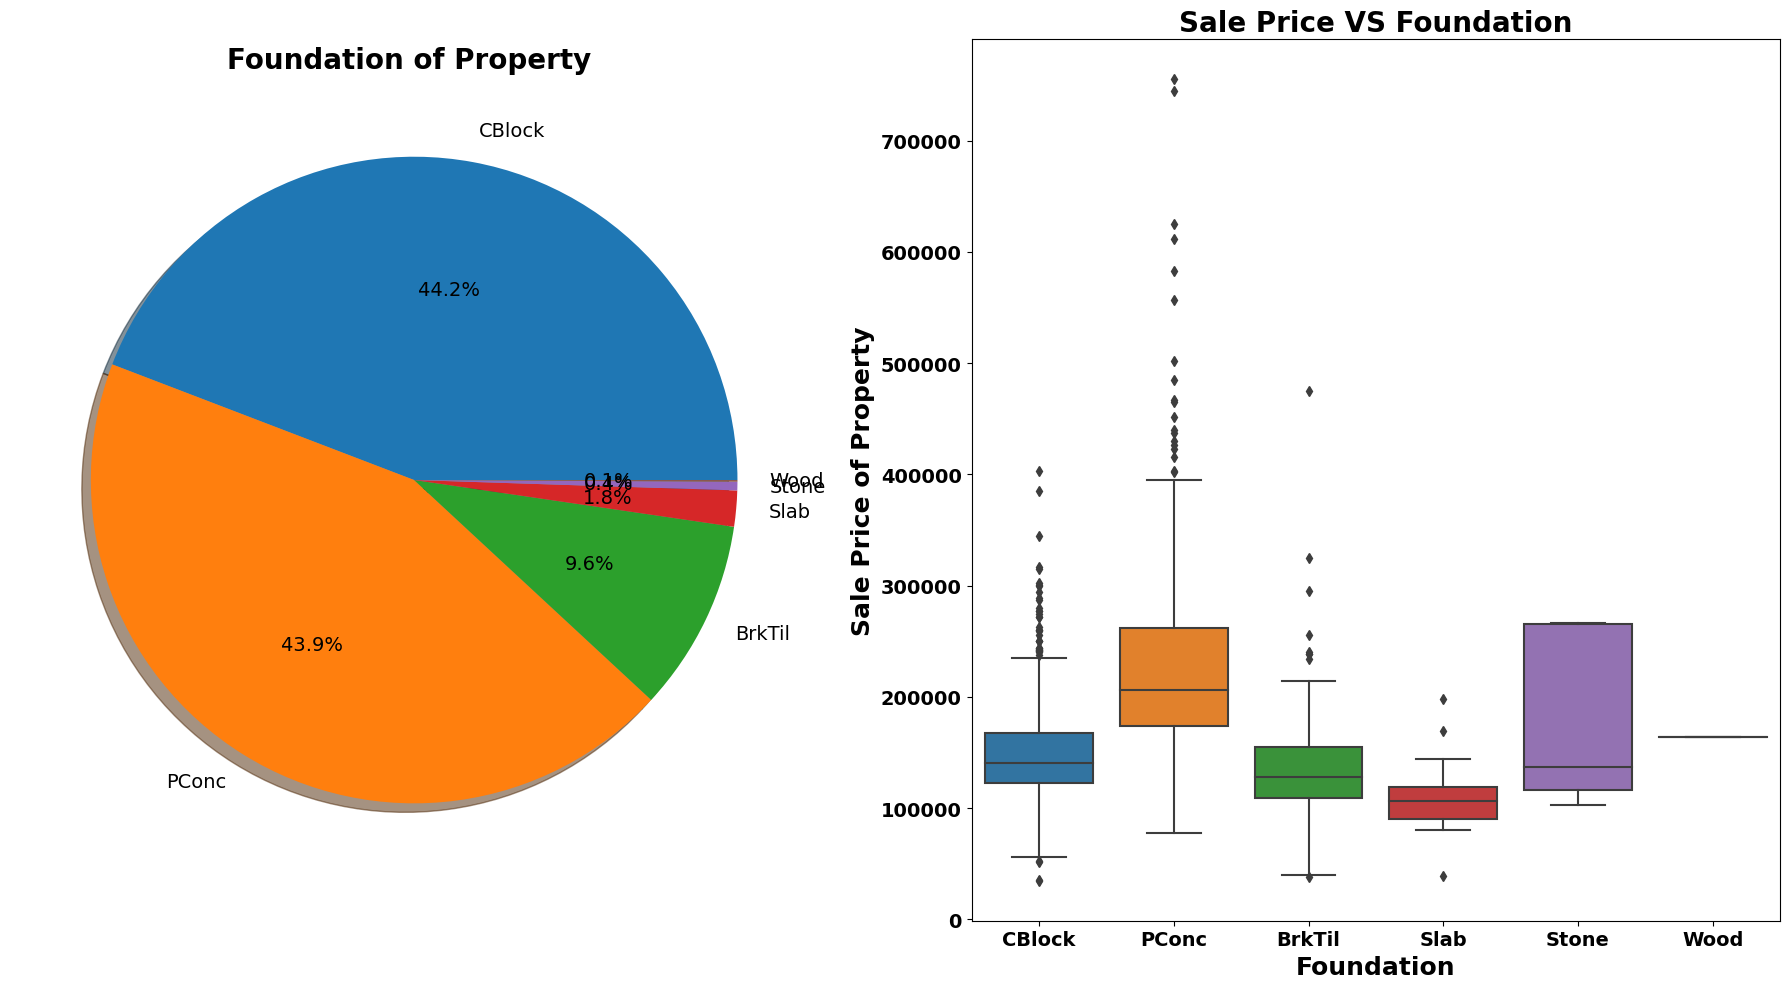

In [116]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('tab10')
fig, ax=plt.subplots(1,2,figsize=(18,10))
data['Foundation'].value_counts().plot.pie(autopct='%1.1f%%',
                                          textprops ={'fontsize':14}, ax=ax[0],shadow=True)
ax[0].set_title('Foundation of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.boxplot(y=data['SalePrice'], x=data['Foundation'], ax=ax[1])
ax[1].set_title('Sale Price VS Foundation',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Foundation",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

**Observation :**

44.2% Properties with CBlock Foundation & 43.9% housing property come with PConc Foundation.

Pconc Foundation are mostly use in costly housing properties.

**BsmtQual: Evaluates the height of the basement**

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
**BsmtCond: Evaluates the general condition of the basement**

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
**BsmtExposure: Refers to walkout or garden level walls**

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
**BsmtFinType1: Rating of basement finished area**

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
       
**BsmtFinType2: Rating of basement finished area (if multiple types)**

In [117]:
col_list_4= ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']

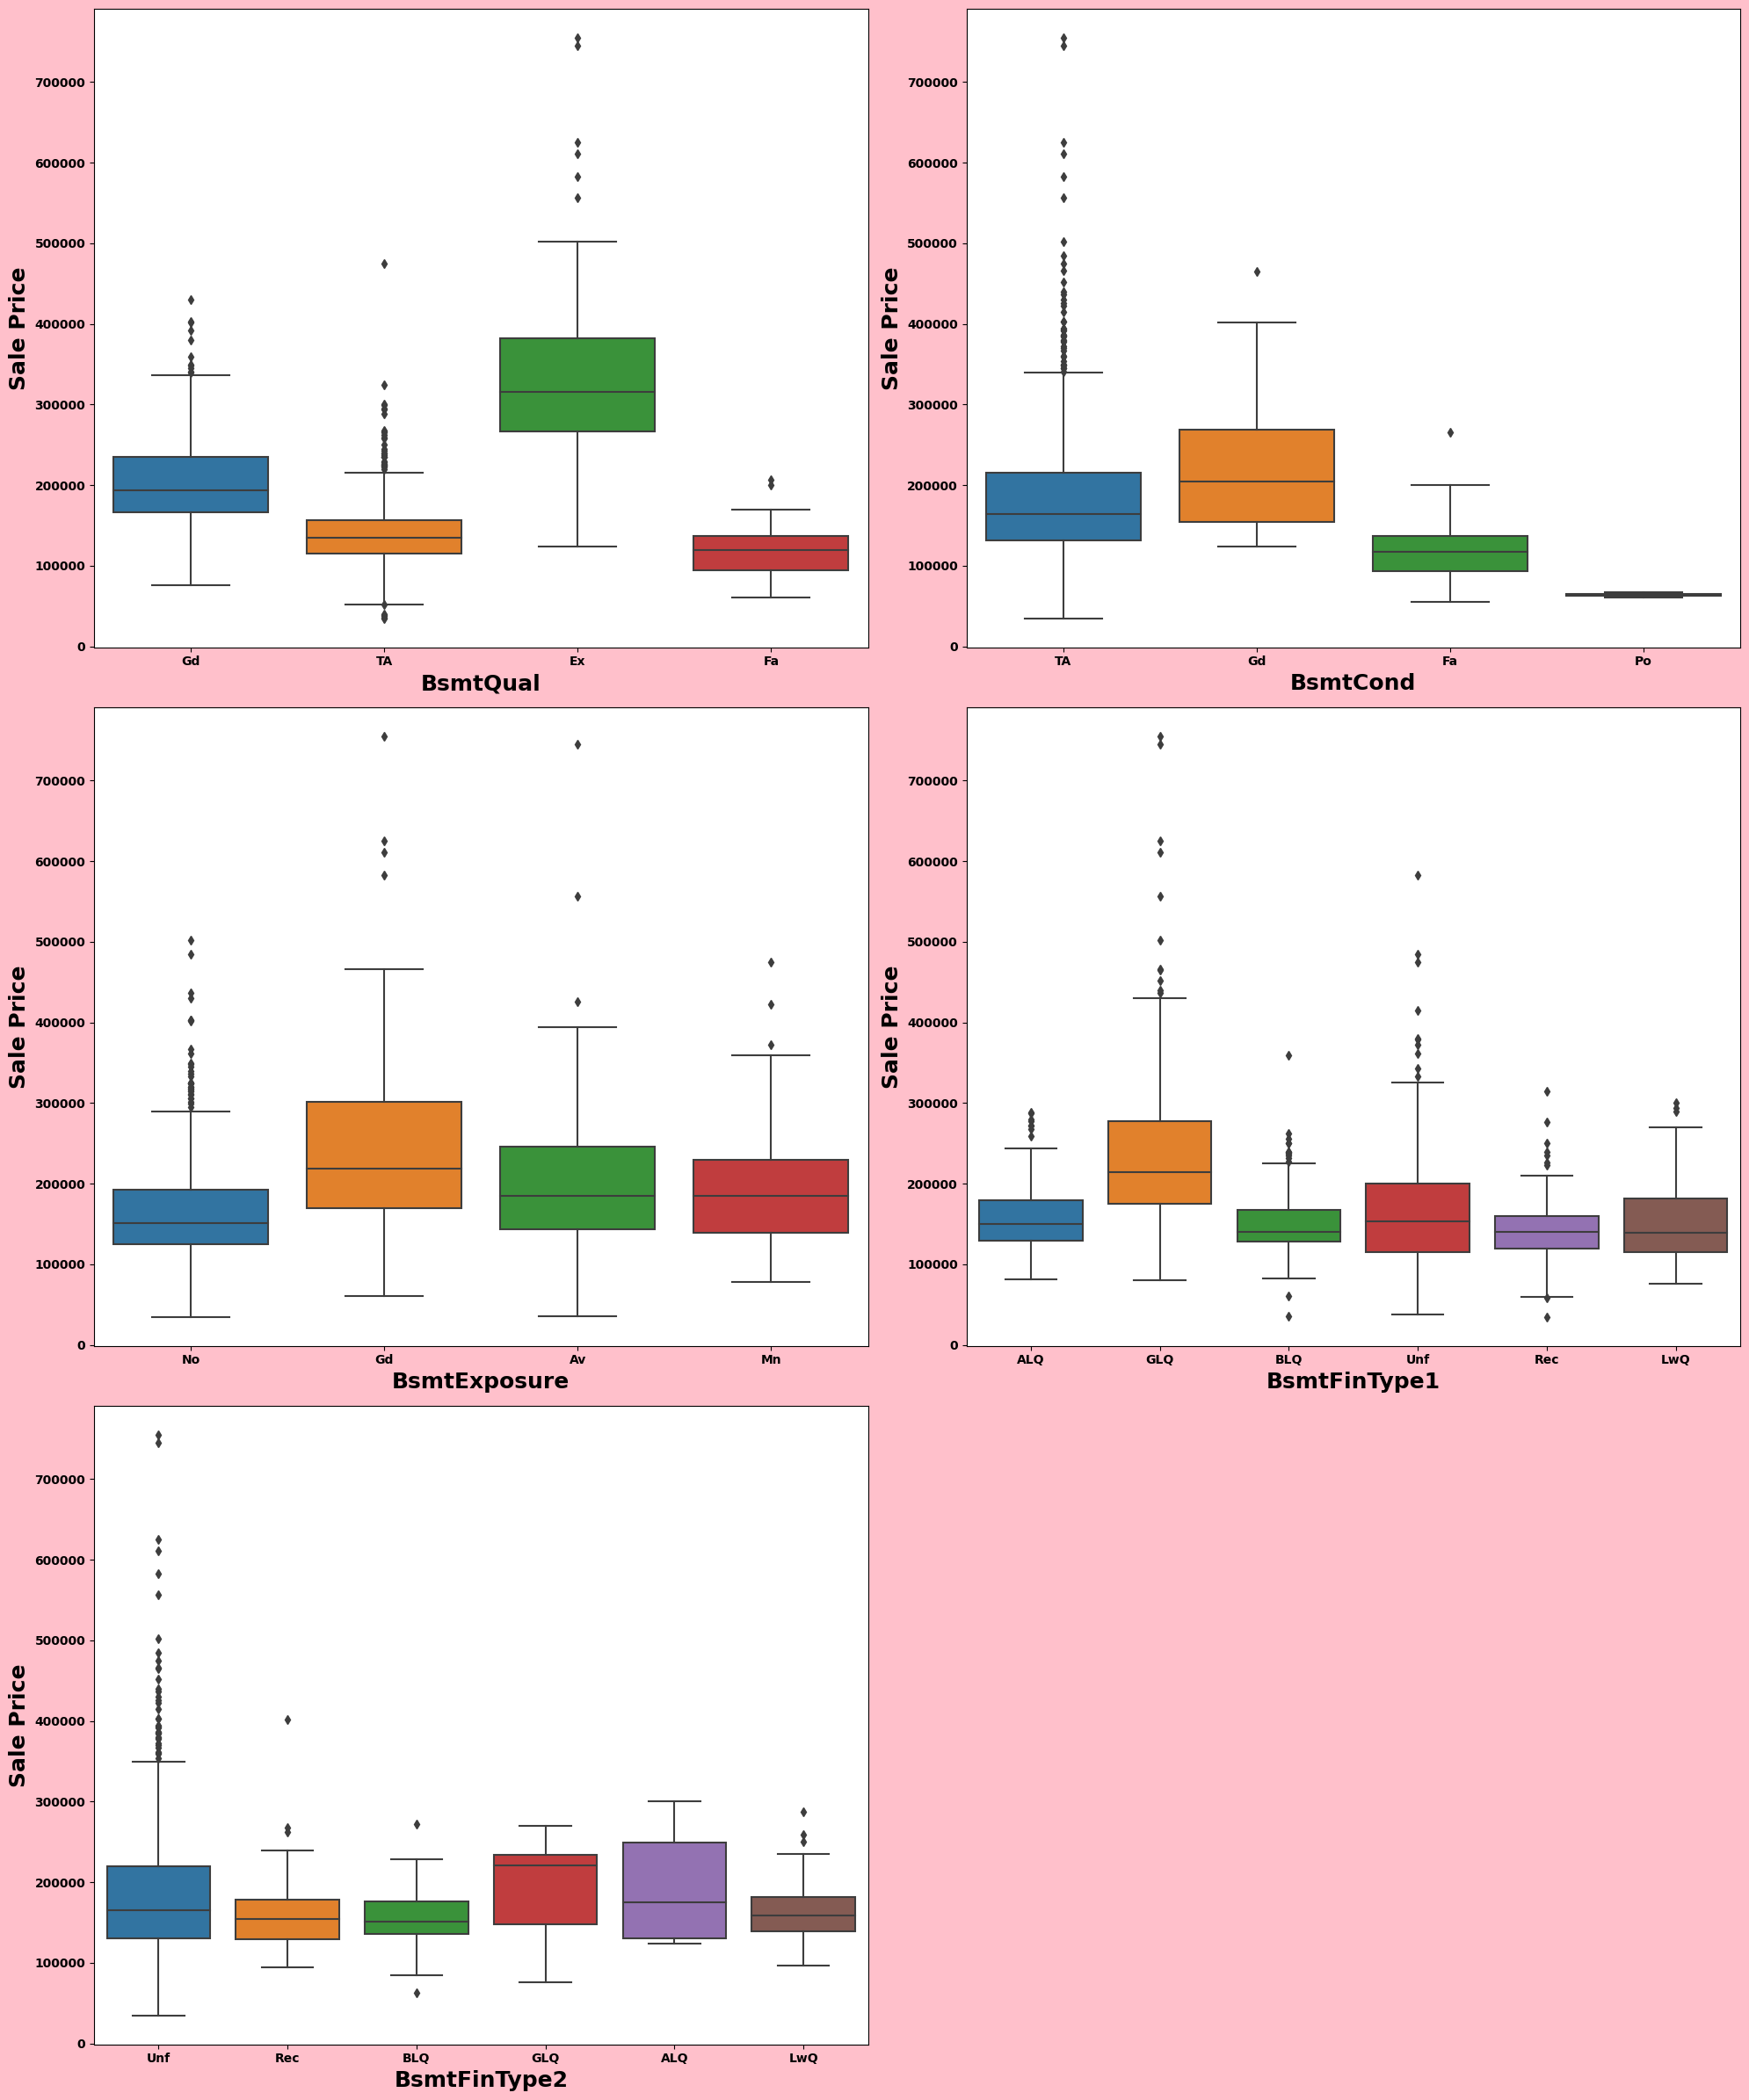

In [118]:
plt.figure(figsize=(20,24),facecolor='pink')
plot=1

for i in col_list_4:
    if plot<=6:
        ax=plt.subplot(3,2,plot)
        
        sns.boxplot(y = data['SalePrice'], x= data[i])
        plt.xlabel(i,fontsize=18,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize =18, fontweight='bold')
        plt.xticks(fontweight ='bold')
        plt.yticks(fontweight ='bold')
    plot+=1
plt.tight_layout()
plt.show()

**LotArea: Lot size in square feet**

Compare Lot Area With Sale Price

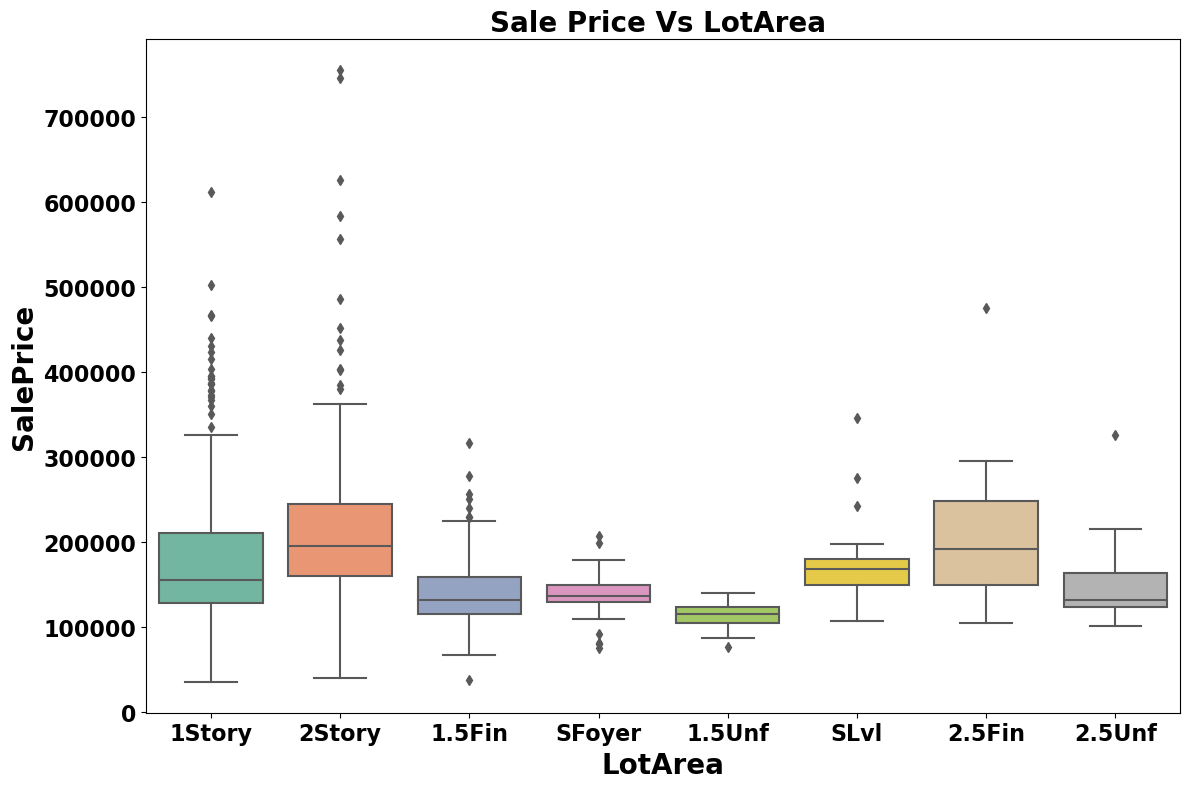

In [119]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('Set2')
plt.figure(figsize=(12,8))
sns.boxplot(y=data['SalePrice'], x=data['HouseStyle'])
plt.title("Sale Price Vs LotArea ",fontsize=20,fontweight ='bold')
plt.xlabel('LotArea',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

**Observation:**

2Story Houses are Costly Then other Houses.

**Cheking value Counts Of Dataset**

In [120]:
#print(data.value_counts())

**Cheking Zeros In Traning dataset columns**

In [121]:
column_name=['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']

In [122]:
for column_name in data.columns:
    column=data[column_name]
    count=(column==0).sum()
    print('Zeros in columns', column_name, 'is : ', count)

Zeros in columns Id is :  0
Zeros in columns MSSubClass is :  0
Zeros in columns MSZoning is :  0
Zeros in columns LotFrontage is :  0
Zeros in columns LotArea is :  0
Zeros in columns Street is :  0
Zeros in columns LotShape is :  0
Zeros in columns LandContour is :  0
Zeros in columns Utilities is :  0
Zeros in columns LotConfig is :  0
Zeros in columns LandSlope is :  0
Zeros in columns Neighborhood is :  0
Zeros in columns Condition1 is :  0
Zeros in columns Condition2 is :  0
Zeros in columns BldgType is :  0
Zeros in columns HouseStyle is :  0
Zeros in columns OverallQual is :  0
Zeros in columns OverallCond is :  0
Zeros in columns YearBuilt is :  0
Zeros in columns YearRemodAdd is :  0
Zeros in columns RoofStyle is :  0
Zeros in columns RoofMatl is :  0
Zeros in columns Exterior1st is :  0
Zeros in columns Exterior2nd is :  0
Zeros in columns MasVnrType is :  0
Zeros in columns MasVnrArea is :  699
Zeros in columns ExterQual is :  0
Zeros in columns ExterCond is :  0
Zeros in c

In [123]:
data.shape

(1168, 76)

**Cheking Column names in Test dataset**

In [124]:
dtest.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

**Cheking Zeros In Testing dataset columns**

In [125]:
column_name_test=['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']

In [126]:
for column_name_test in dtest.columns:
    column_test=dtest[column_name_test]
    count_test=(column==0).sum().sum()
    print('Zeros in columns', column_name_test, 'is : ', count_test)

Zeros in columns Id is :  0
Zeros in columns MSSubClass is :  0
Zeros in columns MSZoning is :  0
Zeros in columns LotFrontage is :  0
Zeros in columns LotArea is :  0
Zeros in columns Street is :  0
Zeros in columns LotShape is :  0
Zeros in columns LandContour is :  0
Zeros in columns Utilities is :  0
Zeros in columns LotConfig is :  0
Zeros in columns LandSlope is :  0
Zeros in columns Neighborhood is :  0
Zeros in columns Condition1 is :  0
Zeros in columns Condition2 is :  0
Zeros in columns BldgType is :  0
Zeros in columns HouseStyle is :  0
Zeros in columns OverallQual is :  0
Zeros in columns OverallCond is :  0
Zeros in columns YearBuilt is :  0
Zeros in columns YearRemodAdd is :  0
Zeros in columns RoofStyle is :  0
Zeros in columns RoofMatl is :  0
Zeros in columns Exterior1st is :  0
Zeros in columns Exterior2nd is :  0
Zeros in columns MasVnrType is :  0
Zeros in columns MasVnrArea is :  0
Zeros in columns ExterQual is :  0
Zeros in columns ExterCond is :  0
Zeros in col

**Removing Unused Column from Training and Testing Dataset** 

In [127]:
data.drop(['Id','Utilities'],axis=1,inplace=True)
dtest.drop(['Id','Utilities'],axis=1,inplace=True)

In [128]:
data.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1,inplace=True)
dtest.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1,inplace=True)

In [129]:
data.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF'],axis=1,inplace=True)
dtest.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF'],axis=1,inplace=True)

In [130]:
data.drop(['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis=1,inplace=True)
dtest.drop(['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis=1,inplace=True)

**Outliers Dection**

In [131]:
#sort Columns by their datatype

data.columns.to_series().groupby(data.dtypes).groups

{int64: ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice'], float64: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], object: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']}

**Dividing Dataset in Numeric and Categorical Type**

In [132]:
Numeric_Data=['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 
              'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 
              'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice', 
              'LotFrontage', 'MasVnrArea', 'GarageYrBlt']

Categorical_Data=['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 
                  'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
                  'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                  'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

**Identifying the outliers using boxplot in train dataset**

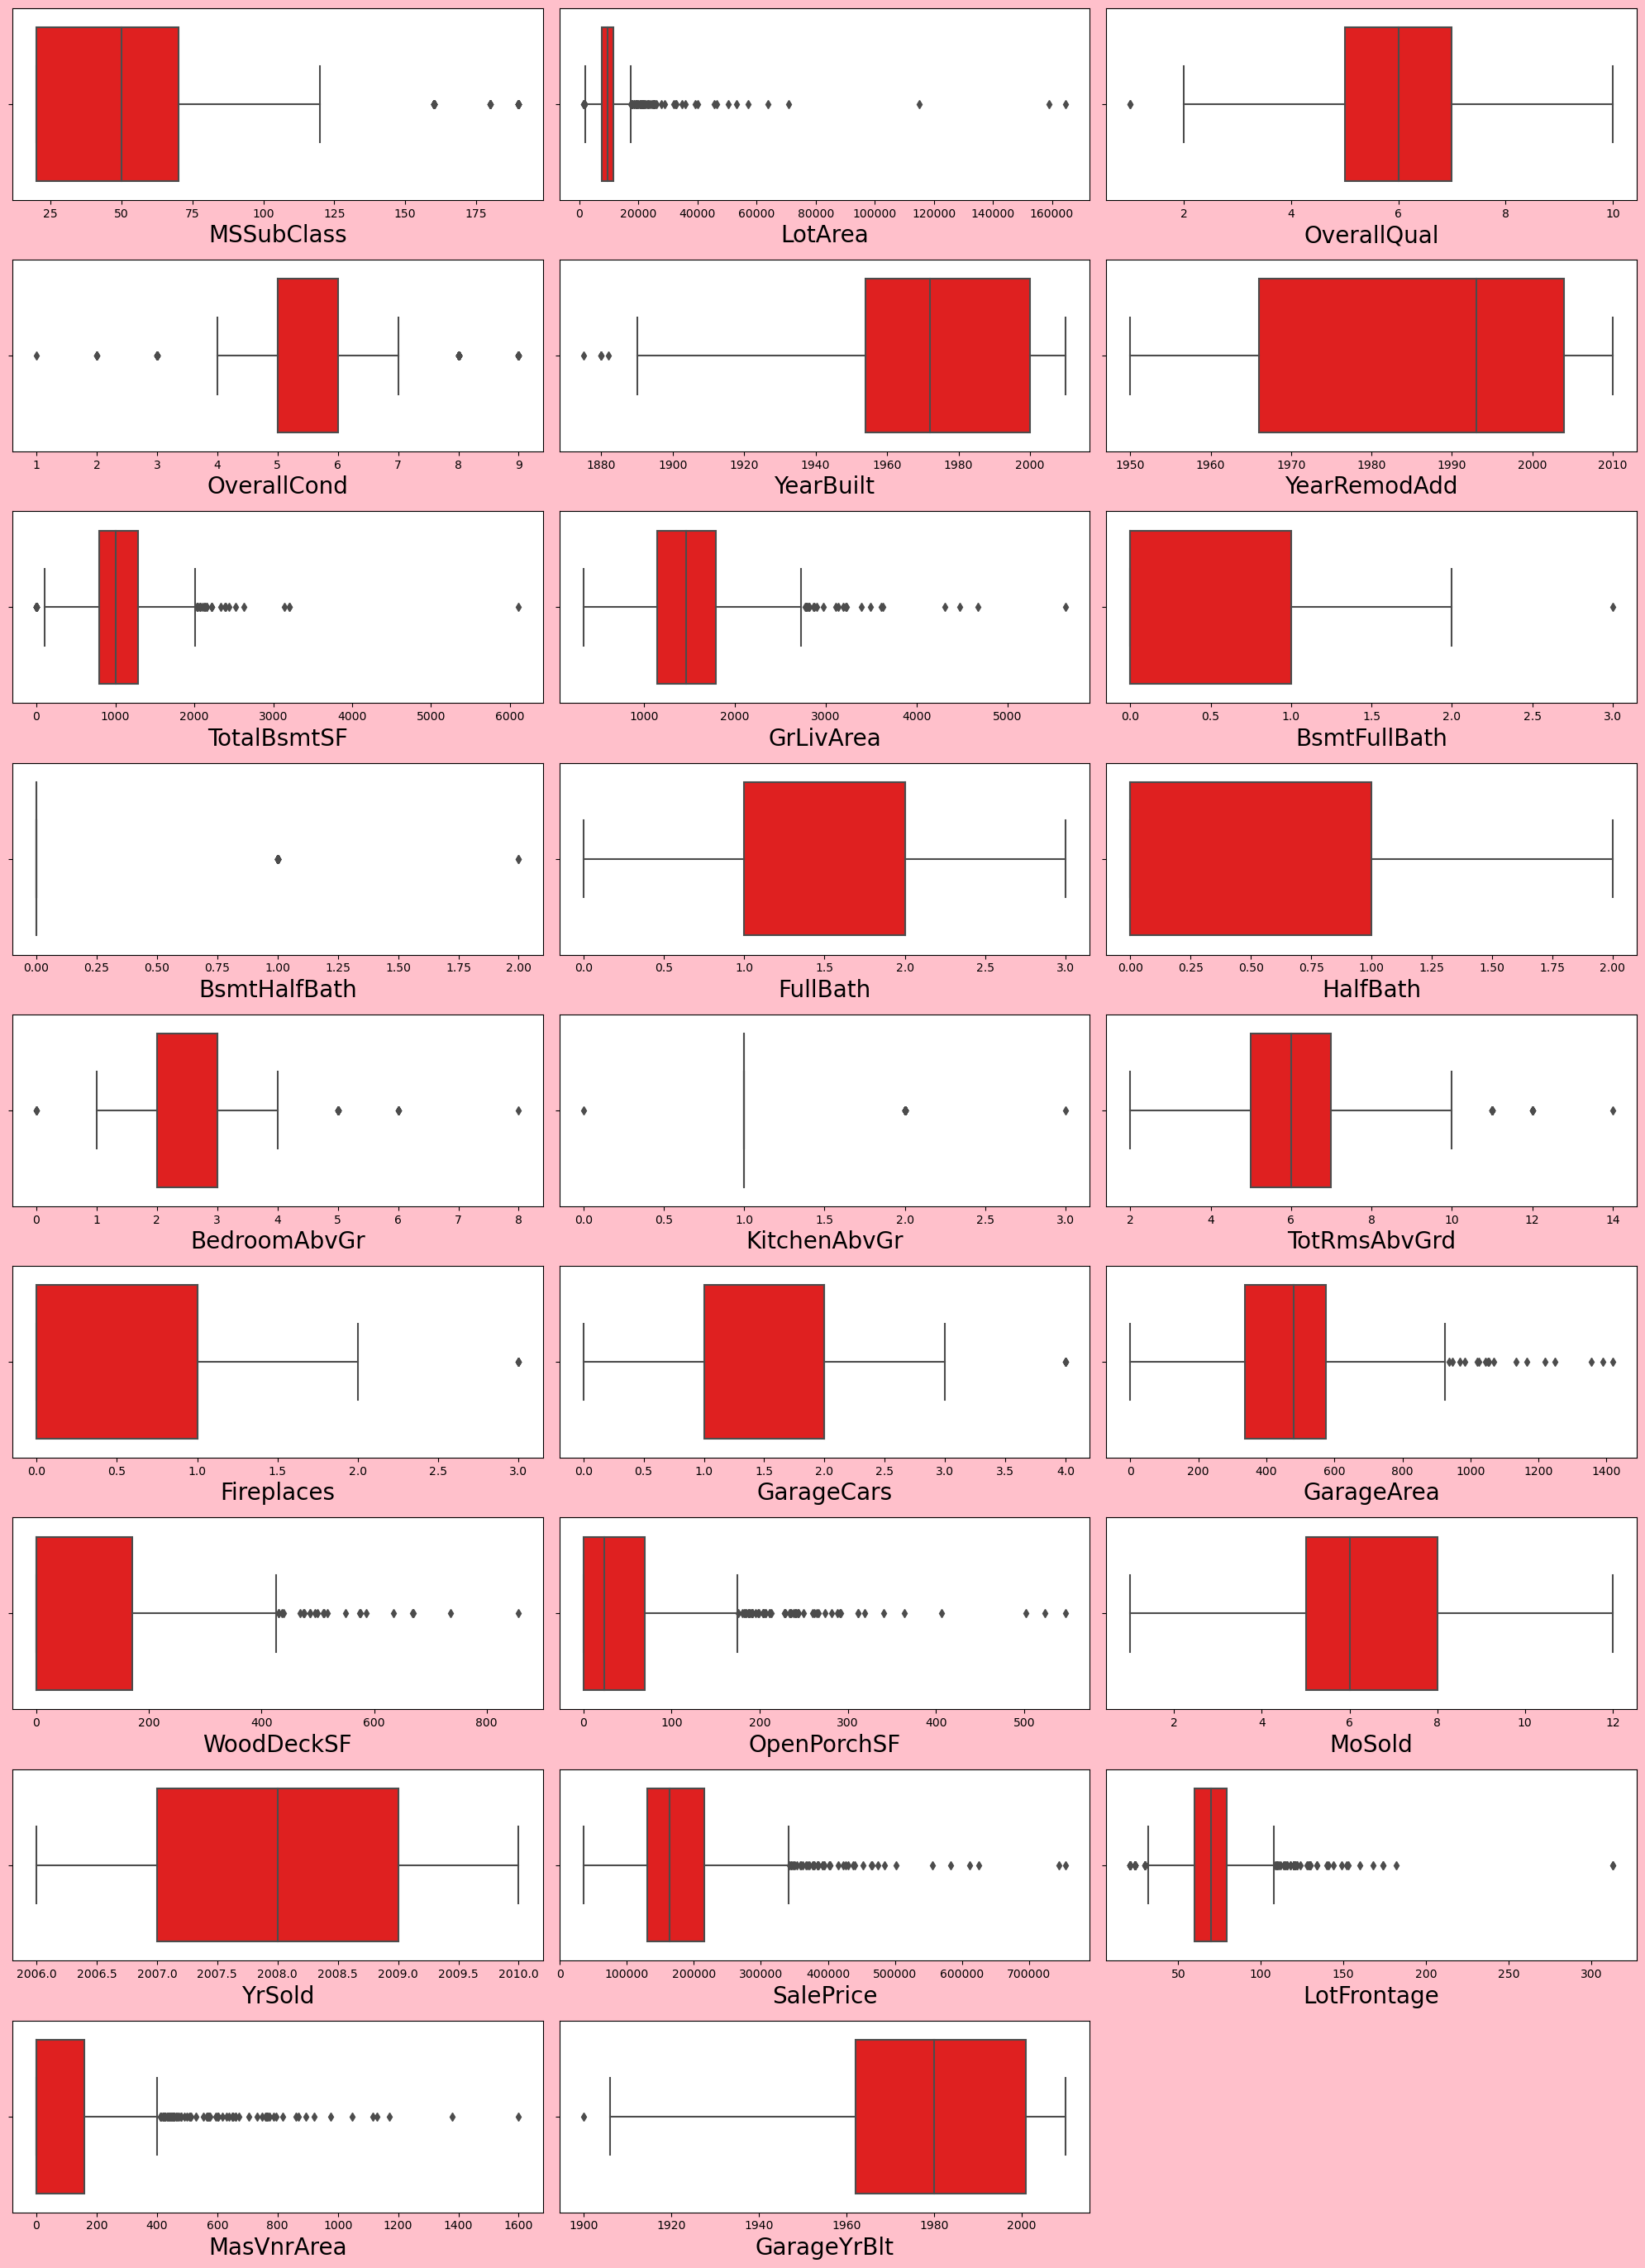

In [133]:
plt.figure(figsize=(20,30),facecolor='pink')
pl_no=1
for i in Numeric_Data:
    if pl_no<=30:
        ax=plt.subplot(10, 3, pl_no)
        sns.boxplot(data[i],color='red')
        plt.xlabel(i,fontsize=20)
    pl_no+=1
plt.tight_layout()

**We can see lots of data contain outliers in upper bound.** 

# Corrleation

In [134]:
data.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass      1.000000    -0.336234 -0.124151     0.070462    -0.056978   
LotFrontage    -0.336234     1.000000  0.296790     0.229981    -0.047851   
LotArea        -0.124151     0.296790  1.000000     0.107188     0.017513   
OverallQual     0.070462     0.229981  0.107188     1.000000    -0.083167   
OverallCond    -0.056978    -0.047851  0.017513    -0.083167     1.000000   
YearBuilt       0.023988     0.112000  0.005506     0.575800    -0.377731   
YearRemodAdd    0.056618     0.089513  0.027228     0.555945     0.080669   
MasVnrArea      0.028215     0.188273  0.120192     0.403985    -0.135133   
TotalBsmtSF    -0.214042     0.356180  0.259733     0.528285    -0.162481   
GrLivArea       0.086448     0.374000  0.281360     0.599700    -0.065006   
BsmtFullBath    0.004556     0.092807  0.142387     0.101732    -0.039680   
BsmtHalfBath    0.008207     0.001375  0.059282    -0.030702     0.091016   
FullBath        0.140807     0.171842  0.123197     0.548824    -0.171931   
HalfBath        0.168423     0.047149  0.007271     0.296134    -0.052125   
BedroomAbvGr   -0.013283     0.236946  0.117351     0.099639     0.028393   
KitchenAbvGr    0.283506    -0.002082 -0.013075    -0.178220    -0.076047   
TotRmsAbvGrd    0.051179     0.318941  0.184546     0.432579    -0.039952   
Fireplaces     -0.035792     0.228494  0.285983     0.390067    -0.013632   
GarageYrBlt     0.074640     0.054459 -0.036133     0.506869    -0.302585   
GarageCars     -0.027639     0.260224  0.158313     0.596322    -0.161996   
GarageArea     -0.092408     0.322750  0.195162     0.566782    -0.126021   
WoodDeckSF     -0.022609     0.087267  0.216720     0.227137     0.012290   
OpenPorchSF     0.017468     0.151044  0.093080     0.341030    -0.024899   
MoSold         -0.016015     0.022579  0.015141     0.090638     0.005519   
YrSold         -0.038595    -0.004162 -0.035399    -0.048759     0.055517   
SalePrice      -0.060775     0.323851  0.249499     0.789185    -0.065642   

              YearBuilt  YearRemodAdd  MasVnrArea  TotalBsmtSF  GrLivArea  \
MSSubClass     0.023988      0.056618    0.028215    -0.214042   0.086448   
LotFrontage    0.112000      0.089513    0.188273     0.356180   0.374000   
LotArea        0.005506      0.027228    0.120192     0.259733   0.281360   
OverallQual    0.575800      0.555945    0.403985     0.528285   0.599700   
OverallCond   -0.377731      0.080669   -0.135133    -0.162481  -0.065006   
YearBuilt      1.000000      0.592829    0.318562     0.386265   0.198644   
YearRemodAdd   0.592829      1.000000    0.178583     0.280720   0.295048   
MasVnrArea     0.318562      0.178583    1.000000     0.362330   0.384386   
TotalBsmtSF    0.386265      0.280720    0.362330     1.000000   0.461067   
GrLivArea      0.198644      0.295048    0.384386     0.461067   1.000000   
BsmtFullBath   0.164983      0.104643    0.084498     0.296654   0.036206   
BsmtHalfBath  -0.028161     -0.011375    0.014974     0.009657  -0.013145   
FullBath       0.471264      0.444446    0.264357     0.311120   0.626275   
HalfBath       0.243227      0.194943    0.197831    -0.037014   0.403630   
BedroomAbvGr  -0.080639     -0.035847    0.091339     0.036237   0.509273   
KitchenAbvGr  -0.167869     -0.139943   -0.039438    -0.065410   0.097929   
TotRmsAbvGrd   0.095476      0.206923    0.277737     0.273895   0.821845   
Fireplaces     0.134313      0.118378    0.241040     0.328241   0.464782   
GarageYrBlt    0.779860      0.612726    0.245879     0.300169   0.200298   
GarageCars     0.525346      0.428325    0.340100     0.423592   0.455707   
GarageArea     0.473216      0.387744    0.363537     0.492980   0.459261   
WoodDeckSF     0.204830      0.197410    0.152083     0.234848   0.242525   
OpenPorchSF    0.191069      0.238755    0.127876     0.249284   0.368318   
MoSold         0.031754      0.024663    0.012707     0.032920   0.065385   
YrSold   

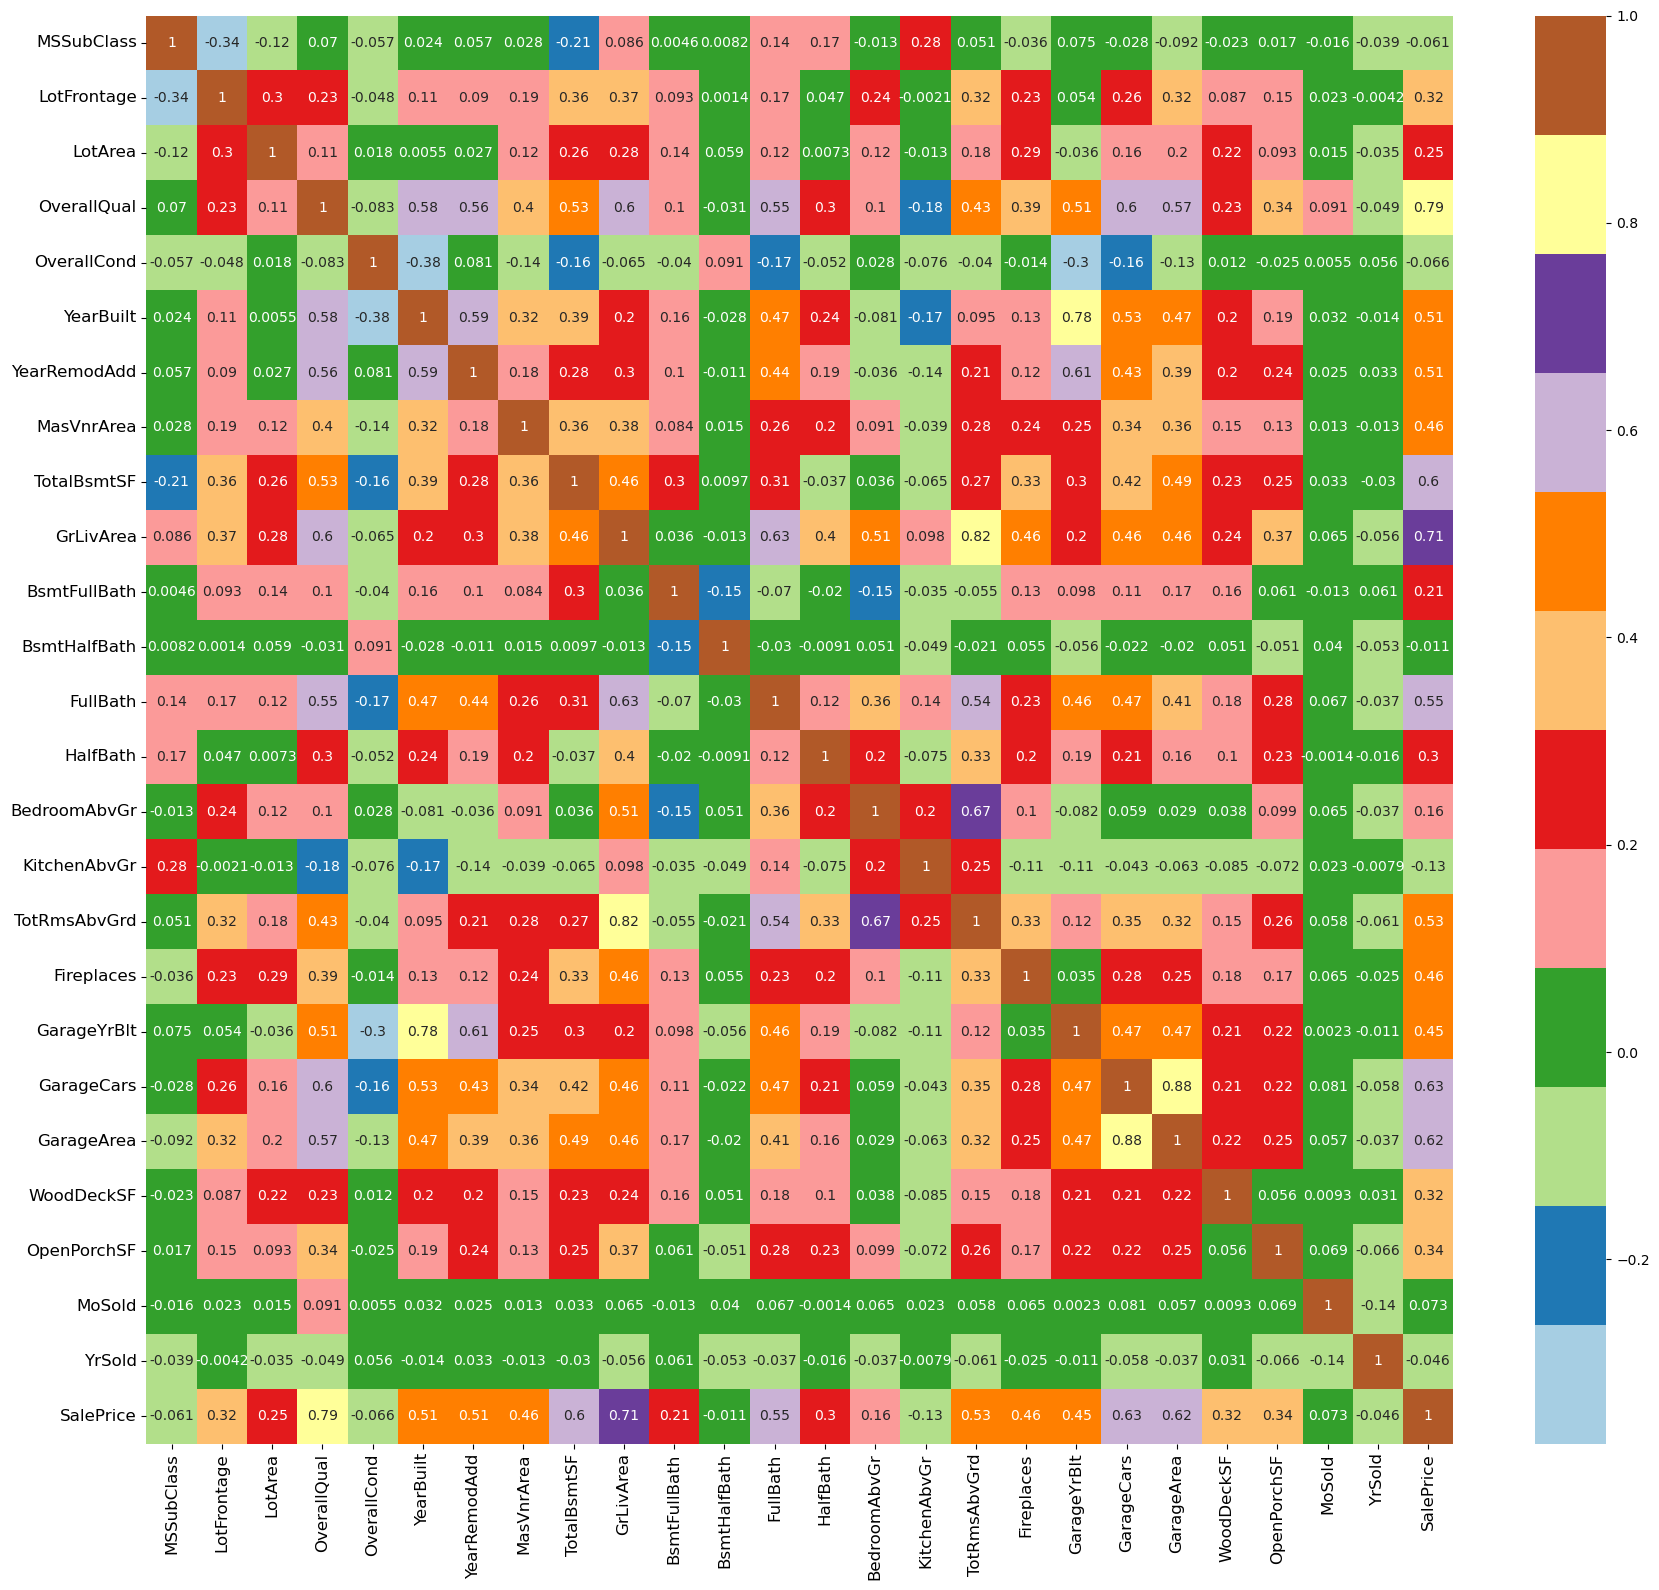

In [135]:
plt.figure(figsize=(18,16))
sns.heatmap(data.corr(), annot=True, cmap="Paired")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

**Encoding Categorical Features**

*Encoding Training data*

In [136]:
# Using Label encoder 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical_Data:
    data[i] = le.fit_transform(data[i])
data.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0         120         3         70.0     4928       1         0            3   
1          20         3         95.0    15865       1         0            3   
2          60         3         92.0     9920       1         0            3   
3          20         3        105.0    11751       1         0            3   
4          20         3         70.0    16635       1         0            3   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0          4          0            13           2           2         4   
1          4          1            12           2           2         0   
2          1          0            15           2           2         0   
3          4          0            14           2           2         0   
4          2          0            14           2           2         0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0           2            6            5       1976          1976          1   
1           2            8            6       1970          1970          0   
2           5            7            5       1996          1997          1   
3           2            6            6       1977          1977          3   
4           2            6            7       1977          2000          1   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0         1            8            9           2         0.0          3   
1         5           12           13           2         0.0          2   
2         1            7            7           2         0.0          2   
3         1            8            9           1       480.0          3   
4         1            4            4           3       126.0          2   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          4           1         2         3             3             0   
1          2           2         3         1             1             0   
2          4           2         2         3             0             2   
3          4           1         2         3             3             1   
4          4           1         2         3             3             0   

   BsmtFinType2  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0             5         1078        1          4           1           4   
1             4         2217        1          0           1           4   
2             5         1117        1          0           1           4   
3             5         1844        1          0           1           4   
4             5         1602        1          2           1           4   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1            3             5           6           1   
1             1            2             8           6           1   
2             1            3             8           6           1   
3             1            3             7           6           1   
4             1            2             8           6           1   

   GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  \
0           1       1977.0             1           2         440           4   
1           1       1970.0             2           2         621           4   
2           1       1997.0             2           2         455           4   
3           1  

*Encoding Testing data*

In [137]:
# Using Label encoder 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical_Data:
    dtest[i] = le.fit_transform(dtest[i])
dtest.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          20         2         86.0    14157       1         0            1   
1         120         2         65.0     5814       1         0            3   
2          20         2         65.0    11838       1         3            3   
3          70         2         75.0    12000       1         3            0   
4          60         2         86.0    14598       1         0            3   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0          0          0            21           2           0         0   
1          1          0            21           2           0         4   
2          4          0             4           2           0         0   
3          4          0             5           2           0         0   
4          1          0            20           1           0         0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0           2            9            5       2005          2006          3   
1           2            8            5       1984          1984          1   
2           2            8            5       2001          2001          3   
3           5            7            7       1941          1950          1   
4           5            6            5       2007          2007          1   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0         0            9           11           3       200.0          2   
1         0            5            5           2         0.0          2   
2         0            9           11           2         0.0          2   
3         0            6            7           2         0.0          3   
4         0            9           11           3        74.0          2   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          3           2         0         2             1             2   
1          3           1         2         2             0             2   
2          3           2         2         2             0             5   
3          3           1         3         2             3             4   
4          3           2         2         2             2             5   

   BsmtFinType2  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0             5         1922        0          0           1           3   
1             5         1220        0          2           1           3   
2             5         1753        0          0           1           3   
3             5          704        0          0           1           3   
4             5          894        0          0           1           3   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1            2             8           5           1   
1             1            2             4           5           1   
2             1            0             7           5           1   
3             1            1             7           5           1   
4             1            2             9           5           1   

   GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  \
0           1       2005.0             0           3         676           4   
1           1       1984.0             1           2         565           4   
2           1       2001.0             1           2         522           4   
3           1  

**Describing Dataset**

In [138]:
round(data.describe()[1:].transpose(), 2)

mean       std      min        25%       50%        75%  \
MSSubClass         56.77     41.94     20.0      20.00      50.0      70.00   
MSZoning            3.01      0.63      0.0       3.00       3.0       3.00   
LotFrontage        70.81     22.44     21.0      60.00      70.0      79.25   
LotArea         10484.75   8957.44   1300.0    7621.50    9522.5   11515.50   
Street              1.00      0.06      0.0       1.00       1.0       1.00   
LotShape            1.94      1.41      0.0       0.00       3.0       3.00   
LandContour         2.77      0.71      0.0       3.00       3.0       3.00   
LotConfig           3.00      1.64      0.0       2.00       4.0       4.00   
LandSlope           0.06      0.28      0.0       0.00       0.0       0.00   
Neighborhood       12.15      6.01      0.0       7.00      12.0      17.00   
Condition1          2.03      0.87      0.0       2.00       2.0       2.00   
Condition2          2.01      0.25      0.0       2.00       2.0       2.00   
BldgType            0.48      1.18      0.0       0.00       0.0       0.00   
HouseStyle          3.04      1.90      0.0       2.00       2.0       5.00   
OverallQual         6.10      1.39      1.0       5.00       6.0       7.00   
OverallCond         5.60      1.12      1.0       5.00       5.0       6.00   
YearBuilt        1970.93     30.15   1875.0    1954.00    1972.0    2000.00   
YearRemodAdd     1984.76     20.79   1950.0    1966.00    1993.0    2004.00   
RoofStyle           1.40      0.83      0.0       1.00       1.0       1.00   
RoofMatl            1.09      0.64      0.0       1.00       1.0       1.00   
Exterior1st         8.66      3.10      0.0       7.00      11.0      11.00   
Exterior2nd         9.36      3.46      0.0       7.00      11.0      12.00   
MasVnrType          1.76      0.61      0.0       1.00       2.0       2.00   
MasVnrArea        101.70    182.22      0.0       0.00       0.0     160.00   
ExterQual           2.53      0.70      0.0       2.00       3.0       3.00   
ExterCond           3.73      0.74      0.0       4.00       4.0       4.00   
Foundation          1.40      0.71      0.0       1.00       1.0       2.00   
BsmtQual            2.28      0.86      0.0       2.00       2.0       3.00   
BsmtCond            2.80      0.67      0.0       3.00       3.0       3.00   
BsmtExposure        2.27      1.14      0.0       2.00       3.0       3.00   
BsmtFinType1        2.80      1.84      0.0       1.00       2.0       5.00   
BsmtFinType2        4.71      0.93      0.0       5.00       5.0       5.00   
TotalBsmtSF      1061.10    442.27      0.0     799.00    1005.5    1291.50   
Heating             1.04      0.30      0.0       1.00       1.0       1.00   
HeatingQC           1.57      1.75      0.0       0.00       0.0       4.00   
CentralAir          0.93      0.25      0.0       1.00       1.0       1.00   
Electrical          3.69      1.04      0.0       4.00       4.0       4.00   
GrLivArea        1525.07    528.04    334.0    1143.25    1468.5    1795.00   
BsmtFullBath        0.43      0.52      0.0       0.00       0.0       1.00   
BsmtHalfBath        0.06      0.24      0.0       0.00       0.0       0.00   
FullBath            1.56      0.55      0.0       1.00       2.0       2.00   
HalfBath            0.39      0.50      0.0       0.00       0.0       1.00   
BedroomAbvGr        2.88      0.82      0.0       2.00       3.0       3.00   
KitchenAbvGr        1.05      0.22      0.0       1.00       1.0       1.00   
KitchenQual         2.33      0.83      0.0       2.00       2.0       3.00   
TotRmsAbvGrd        6.54      1.60      2.0       5.00       6.0       7.00   
Functional          5.74      0.99      0.0       6.00       6.0       6.00   
Fireplaces          0.62      0.65      0.0       0.00       1.0       1.00   
GarageType          2.23      1.77      0.0       1.00       1.0       5.00   
GarageYrBlt      1978.29     24.20   1900.0    1962.00    1980.0    20

**Cheking Outliers**

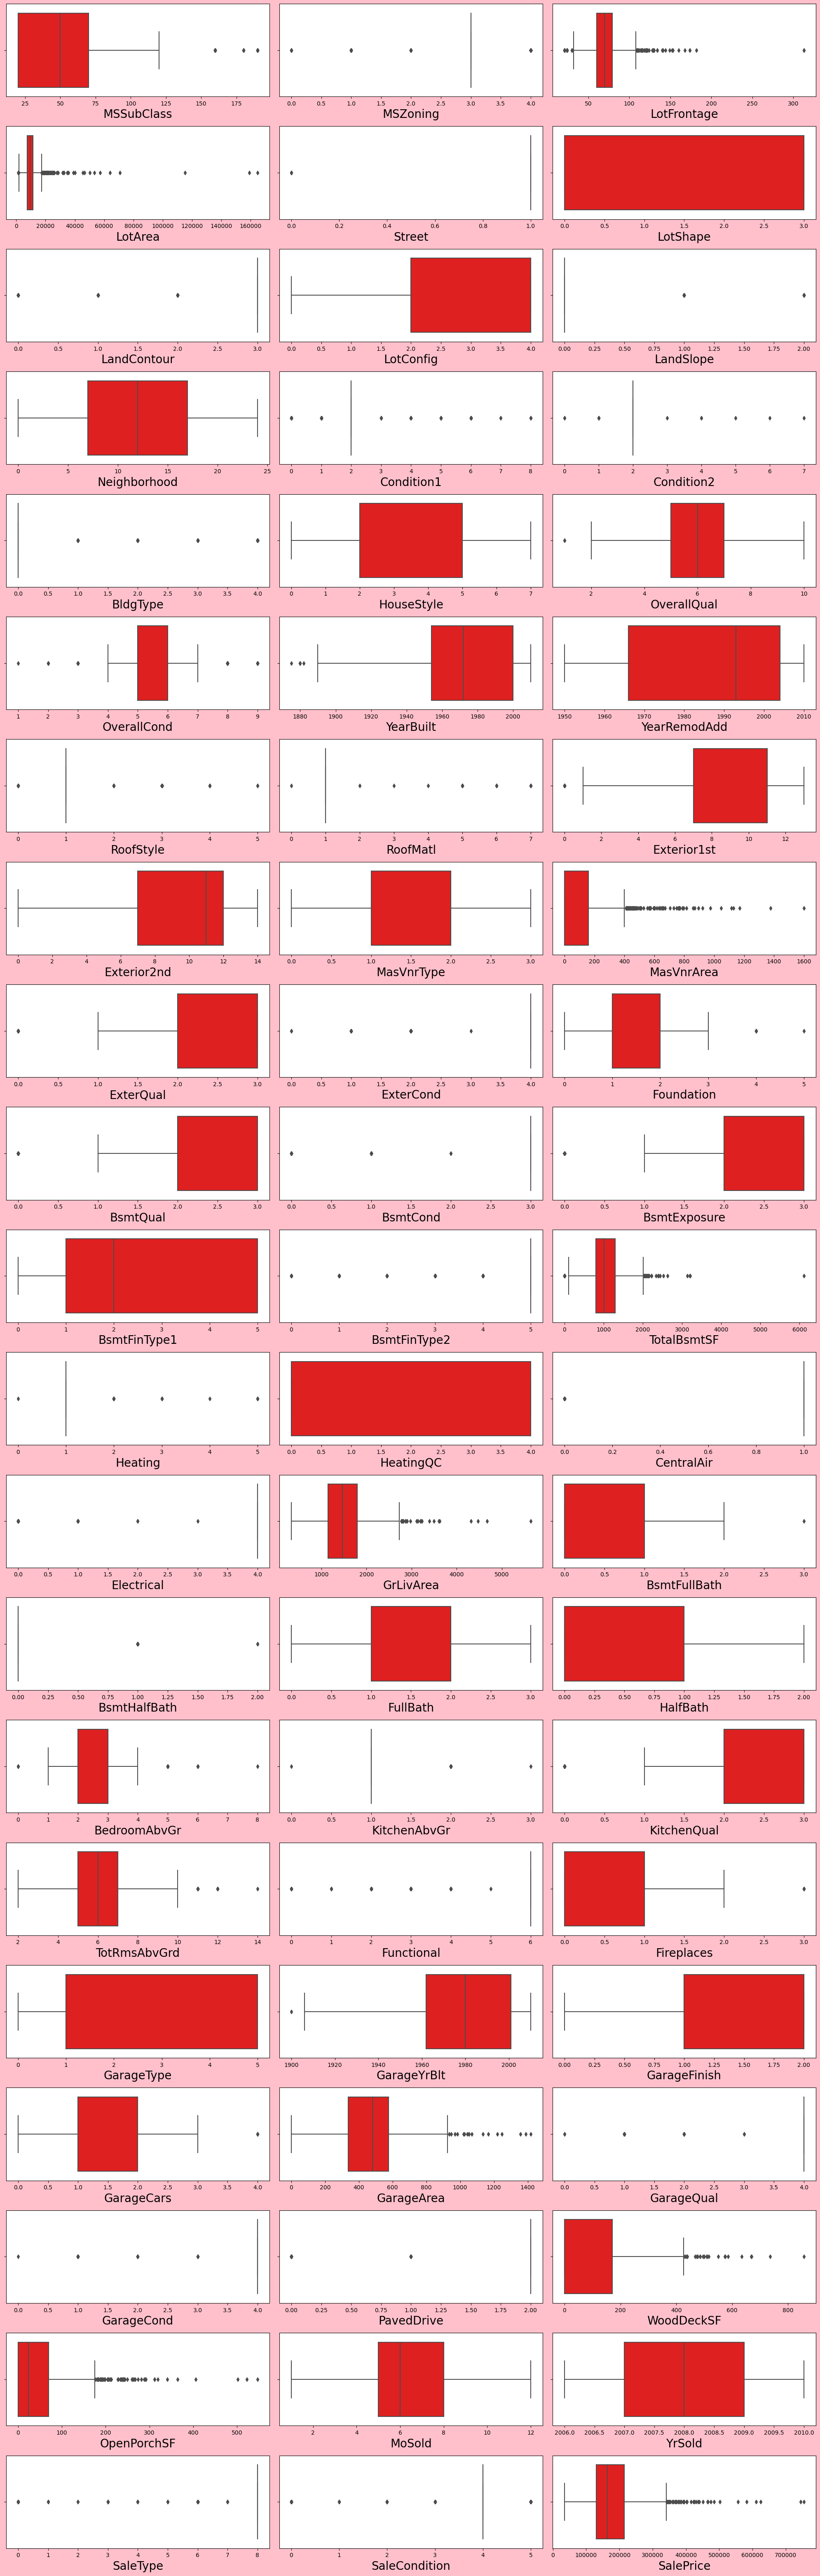

In [139]:
plt.figure(figsize=(20,65),facecolor='pink')
pl_no=1
for i in data:
    if pl_no<=65:
        ax=plt.subplot(22, 3, pl_no)
        sns.boxplot(data[i],color='red')
        plt.xlabel(i,fontsize=20)
    pl_no+=1
plt.tight_layout()

**We can see in boxplot many columns have outliers present**

**Removing OutLiers**

In [140]:
from scipy.stats import zscore

z=np.abs(zscore(data))
z=np.array(z)
z

array([[1.50830058, 0.02164599, 0.03599365, ..., 0.33003329, 0.20793187,
        0.67631017],
       [0.87704243, 0.02164599, 1.07854983, ..., 0.33003329, 0.20793187,
        1.09423443],
       [0.07709478, 0.02164599, 0.94480461, ..., 0.33003329, 0.20793187,
        1.11687211],
       ...,
       [2.46243779, 0.02164599, 2.08675364, ..., 0.33003329, 0.20793187,
        0.41705186],
       [0.31562908, 4.76211672, 0.92762843, ..., 0.33003329, 0.20793187,
        1.78922393],
       [0.07709478, 0.02164599, 0.03599365, ..., 0.33003329, 0.20793187,
        0.02179027]])

In [141]:
threshold=3
print(np.where(z>3))

(array([   1,    1,    3, ..., 1166, 1166, 1166], dtype=int64), array([ 8, 19, 60, ..., 35, 54, 55], dtype=int64))


**Cheking Where z is greater than 3**

In [142]:
z[1][8]

3.295414143816642

In [143]:
z[1][19]

6.09040757742434

*Removing Outliers*

In [144]:
new_data=data[(z<3).all(axis=1)]

In [145]:
data.shape

(1168, 63)

In [146]:
new_data.shape

(537, 63)

In [147]:
data=new_data
data.shape

(537, 63)

In [148]:
z[1][8]

3.295414143816642

**Dividing Features Data and Target Data**

**x ===> Features Value**

**y ===> Target values**

In [149]:
x = data.drop(['SalePrice'], axis=1)
x.head(10)

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          120         3         70.0     4928       1         0            3   
2           60         3         92.0     9920       1         0            3   
5           60         3         58.0    14054       1         0            3   
6           20         3         70.0    11341       1         0            3   
11          60         3         44.0     9548       1         0            3   
12          20         3        129.0     9196       1         0            3   
14          50         3         59.0    16466       1         0            3   
16          30         4         70.0     5890       1         3            3   
17          20         3         64.0     7314       1         3            3   
19         160         4         24.0     2016       1         3            3   

    LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0           4          0            13           2           2         4   
2           1          0            15           2           2         0   
5           4          0             8           2           2         0   
6           4          0            19           2           2         0   
11          1          0             5           2           2         0   
12          4          0            11           2           2         0   
14          4          0             7           2           2         0   
16          0          0             9           2           2         0   
17          4          0             5           2           2         0   
19          4          0             2           2           2         4   

    HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0            2            6            5       1976          1976          1   
2            5            7            5       1996          1997          1   
5            5            7            5       2006          2006          1   
6            2            5            6       1957          1996          3   
11           5            7            6       2003          2003          1   
12           2            7            5       2003          2003          1   
14           0            5            7       1955          1955          1   
16           2            6            8       1930          2007          1   
17           2            7            5       2007          2007          1   
19           5            5            5       1970          1970          1   

    RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0          1            8            9           2         0.0          3   
2          1            7            7           2         0.0          2   
5          1           11           12           2         0.0          2   
6          1           12           13           1       180.0          3   
11         1           11           12           1       223.0          2   
12         1           11           12           2         0.0          2   
14         1            7            7           2         0.0          3   
16         1           12           13           2         0.0          2   
17         1           11           12           3        82.0          2   
19         1            5            5           1       304.0          3   

    ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0           4           1         2         3             3             0   
2           4           2         2         3             0             2   
5           4           2         2         3             0             5   
6           4           1         2         3             3             0   
11          4           2         2         3             3             2   
12          4           2         0         3             3             5   
14     

In [150]:
y = data['SalePrice']
y.head(10)

0     128000
2     269790
5     219210
6     121500
11    237000
12    201000
14    135500
16    120500
17    194500
19    106000
Name: SalePrice, dtype: int64

In [151]:
x.shape

(537, 62)

In [152]:
y.shape

(537,)

# Use Scaling Techniques

**STANDARD SCALING FOR TRAINING DATASET**

In [153]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
x = st.fit_transform(x)
x

array([[ 1.72132516, -0.30715915, -0.03387126, ..., -0.64697732,
         0.33133632, -0.2689097 ],
       [ 0.17558668, -0.30715915,  1.12599853, ..., -0.64697732,
         0.33133632, -0.2689097 ],
       [ 0.17558668, -0.30715915, -0.66652751, ..., -1.3830511 ,
        -2.36453649,  2.80352665],
       ...,
       [-0.85490564, -0.30715915, -0.03387126, ...,  1.56124401,
         0.33133632, -0.2689097 ],
       [ 2.75181748, -0.30715915, -2.45905356, ...,  0.82517023,
         0.33133632, -0.2689097 ],
       [ 0.17558668, -0.30715915, -0.03387126, ..., -1.3830511 ,
         0.33133632, -0.2689097 ]])

**STANDARD SCALING FOR TESTING DATASET**

In [154]:
ss = StandardScaler()
xt = ss.fit_transform(dtest)
xt

array([[-0.85605433, -0.28700579,  0.99228791, ..., -0.65090813,
         0.23029007,  0.14865423],
       [ 1.43198105, -0.28700579, -0.06042999, ...,  0.86355541,
        -6.49418003, -3.32390858],
       [-0.85605433, -0.28700579, -0.06042999, ...,  0.86355541,
         0.23029007,  0.14865423],
       ...,
       [-0.85605433, -0.28700579, -0.06042999, ...,  1.62078718,
         0.23029007,  0.14865423],
       [-0.16964372,  1.80813647, -0.81237135, ..., -1.4081399 ,
         0.23029007,  0.14865423],
       [ 2.3471952 ,  1.80813647, -2.26612464, ..., -1.4081399 ,
         0.23029007,  0.14865423]])

# Model Building

In [155]:
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

**Splitting The DataFrame**

In [207]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=62)

In [208]:
x_train.shape

(359, 62)

In [209]:
y_train.shape

(359,)

In [210]:
x_test.shape

(178, 62)

In [211]:
y_test.shape

(178,)

**Finding Best RandomState**

In [212]:
lr=LinearRegression()
for i in range(20, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train, pred_train)*100, 1)==round(r2_score(y_test, pred_test)*100, 1):
        print('At random state ', i, 'The model perform very well')
        print('At random state ', i)
        print('r2 score traning :', round(r2_score(y_train, pred_train)*100, 1))
        print('r2 score testing :', round(r2_score(y_test, pred_test)*100, 1), '\n\n')

At random state  62 The model perform very well
At random state  62
r2 score traning : 90.2
r2 score testing : 90.2 


At random state  176 The model perform very well
At random state  176
r2 score traning : 90.1
r2 score testing : 90.1 




**Linear Regression**

In [213]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 62, test_size=0.33)
lin_reg= LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test, y_pred))
print('Mean squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test, y_pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(round(r2_score(y_test, y_pred)*100, 1))

Error :
Mean absolute error : 13650.573227096547
Mean squared error : 321353241.3811743
Root Mean squared error : 17926.328162263857
 R2 Score :
90.2


**Chek Cross validation Score**

In [214]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(lin_reg, x, y, cv=5)
print('Score :', score)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :", score.mean())
print("Standard Deviation :",score.std())
print('Difference in R2 & CV Score:', (r2_score(y_test,y_pred)*100)-(score.mean()*100))

Score : [0.87779946 0.91167841 0.82534751 0.91456004 0.8454766 ]
Cross Validation Score : LinearRegression() :

Mean CV Score : 0.8749724044601928
Standard Deviation : 0.03536986378955725
Difference in R2 & CV Score: 2.714452019839044


# Regularization

**Hyper Parameter Tuning(Grid Search CV)**

**Ridge Regressor**

In [215]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

In [216]:
# Prepare a range of alpha value to test

alpha_value={'alpha':[1, 0.1, 0.01, 0.001, 0.0001, 0]}

# create and fit a ridge regression model testing each alpha

model = Ridge()

grid = GridSearchCV(estimator=model, param_grid=alpha_value)
grid.fit(x, y)
print(grid)

# Summarize the results of the grid search

print('Best score : ', grid.best_score_)
print('Best estimator : ', grid.best_estimator_.alpha )
print('Best params : ', grid.best_params_)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})
Best score :  0.8753469379406699
Best estimator :  1
Best params :  {'alpha': 1}


In [217]:
rdg = Ridge(alpha=1, random_state=62)
rdg.fit(x_train, y_train)
y_prd = rdg.predict(x_test)
print('Coefficient Value : ', rdg.coef_, '\n\n')
print('R2 Score : ', round(r2_score(y_test, y_prd)*100, 1))
print('Ridge Score Value : ', rdg.score(x_train, y_train))

Coefficient Value :  [-5.46471318e+03  6.35064139e+02 -3.98764495e+02  6.06960235e+03
  0.00000000e+00  1.00990959e+03 -2.08313063e+03  2.55686487e+01
  0.00000000e+00  1.62627243e+03  1.59312721e+03  0.00000000e+00
  2.44094418e+03 -8.92618043e+02  1.16301064e+04  7.43111058e+03
  9.46785924e+03  2.21344532e+03  5.88455420e+02  0.00000000e+00
 -3.65828742e+02 -6.64204590e+02  2.33291093e+03  2.75082686e+03
 -1.10728408e+03  2.42328641e+03  1.87222792e+03 -4.73771924e+02
 -4.54189295e+02 -2.13717653e+03 -9.32072667e+02  8.31446444e+02
  5.94493212e+03  0.00000000e+00 -3.59500450e+01  0.00000000e+00
  2.20733682e+01  2.54728960e+04  7.01071482e+03  0.00000000e+00
  1.03788343e+02 -6.52352451e+02 -2.77085473e+03  0.00000000e+00
 -2.76181661e+03  2.16040720e+03  3.00971864e+03  2.73918489e+03
  1.71469222e+03  3.13040606e+01 -1.09352967e+02  2.67808186e+03
  1.12248562e+03  0.00000000e+00  0.00000000e+00  1.95186489e+03
  2.69885932e+03  4.77568782e+02  1.26008412e+03  2.12340755e+02
 -5.

In [218]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rdg, x, y, cv=5)
print('\033[1m'+'Cross Validation Score :',rdg,":"+'\033[0m\n')
print("Mean CV Score :",round((score.mean())*100, 1))
print('Difference in R2 & CV Score:',(r2_score(y_test, y_prd)*100)-(score.mean()*100))

Cross Validation Score : Ridge(alpha=1, random_state=62) :

Mean CV Score : 87.5
Difference in R2 & CV Score: 2.7442867617523348


**Approching More Regressor**

In [219]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

**Decision Tree Regressor**

In [220]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 62, test_size=0.33)
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
dtr_prd = dtr.predict(x_test)
print("DTR Score : ", dtr.score(x_train, y_train))
print("DTR r2 Score : ", r2_score(y_test, dtr_prd))
print("DTR Mean Squared Error : ", mean_squared_error(y_test, dtr_prd))
print("DTR Root Mean Squared Error : ", np.sqrt(mean_squared_error(y_test, dtr_prd)))

DTR Score :  1.0
DTR r2 Score :  0.5595995509329328
DTR Mean Squared Error :  1445848644.6179776
DTR Root Mean Squared Error :  38024.31649113469


In [221]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dtr, x, y, cv=5)
print('\033[1m'+'Cross Validation Score :',dtr,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test, dtr_prd)*100)-(score.mean()*100))

Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.6437161074847616
Difference in R2 & CV Score: -8.411655655182877


**KNN Regressor(KNeighbors Regressor)**

In [222]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 62, test_size=0.33)
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
knn_prd = knn.predict(x_test)
print("KNN Score : ", knn.score(x_train, y_train))
print("KNN r2 Score : ", r2_score(y_test, knn_prd))
print("KNN Mean Squared Error : ", mean_squared_error(y_test, knn_prd))
print("KNN Root Mean Squared Error : ", np.sqrt(mean_squared_error(y_test, knn_prd)))

KNN Score :  0.8616948485554689
KNN r2 Score :  0.8215136779717507
KNN Mean Squared Error :  585976257.1406742
KNN Root Mean Squared Error :  24206.94646461371


In [223]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, x, y, cv=5)
print('\033[1m'+'Cross Validation Score :',knn,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test, knn_prd)*100)-(score.mean()*100))

Cross Validation Score : KNeighborsRegressor() :

Mean CV Score : 0.7963312443296825
Difference in R2 & CV Score: 2.5182433642068247


**Support Vector Regressor(SVR)**

In [224]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 62, test_size=0.33)
svr = SVR()
svr.fit(x_train, y_train)
svr_prd = svr.predict(x_test)
print("SVR Score : ", svr.score(x_train, y_train))
print("SVR r2 Score : ", r2_score(y_test, svr_prd))
print("SVR Mean Squared Error : ", mean_squared_error(y_test, svr_prd))
print("SVR Root Mean Squared Error : ", np.sqrt(mean_squared_error(y_test, svr_prd)))

SVR Score :  -0.023052500256714348
SVR r2 Score :  -0.05626751468557556
SVR Mean Squared Error :  3467759757.505529
SVR Root Mean Squared Error :  58887.687656296446


In [225]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(svr, x, y, cv=5)
print('\033[1m'+'Cross Validation Score :',svr,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test, svr_prd)*100)-(score.mean()*100))

Cross Validation Score : SVR() :

Mean CV Score : -0.030882789340706807
Difference in R2 & CV Score: -2.5384725344868753


**Random Forest Regressor**

In [226]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 62, test_size=0.33)
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rfr_prd = rfr.predict(x_test)
print("RFR Score : ", rfr.score(x_train, y_train))
print("RFR r2 Score : ", r2_score(y_test, rfr_prd))
print("RFR Mean Squared Error : ", mean_squared_error(y_test, rfr_prd))
print("RFR Root Mean Squared Error : ", np.sqrt(mean_squared_error(y_test, rfr_prd)))

RFR Score :  0.9757866419758932
RFR r2 Score :  0.8215176333064707
RFR Mean Squared Error :  585963271.651318
RFR Root Mean Squared Error :  24206.678244883537


In [227]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfr, x, y, cv=5)
print('\033[1m'+'Cross Validation Score :',rfr,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test, rfr_prd)*100)-(score.mean()*100))

Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.8512582201493304
Difference in R2 & CV Score: -2.974058684285964


**We can see that Ridge Regressor gives maximum R2 score of 90.3% and with cross validation score of 87.5%.**

# Hyper Parameter Tuning : GridSearchCV

In [206]:
from sklearn.model_selection import GridSearchCV

In [229]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=62, test_size=0.33)

In [230]:
print(rdg.get_params())

{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': 62, 'solver': 'auto', 'tol': 0.001}


In [233]:
GCV = GridSearchCV(Ridge(), alpha_value)

In [234]:
GCV.fit(x_train, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})

In [235]:
GCV.best_params_

{'alpha': 1}

# Final Model

In [236]:
fin_mod = Ridge()
                        
fin_mod.fit(x_train,y_train)
pred = fin_mod.predict(x_test)
print('R2_Score :', r2_score(y_test,pred)*100)
print('mean_squared_error :', mean_squared_error(y_test,pred))
print('mean_absolute_error :', mean_absolute_error(y_test,pred))
print("root mean squared error value : ", np.sqrt(mean_squared_error(y_test, pred)))

R2_Score : 90.27898055581932
mean_squared_error : 319144152.0427069
mean_absolute_error : 13611.89917304823
root mean squared error value :  17864.60612615646


# Saving Final Model

In [237]:
# Saving the model using .pkl

import joblib

joblib.dump(fin_mod,"surprise_House_Price_Prediction.pkl")

['surprise_House_Price_Prediction.pkl']

# Predictions of Test Dataset Using Final Model

In [238]:
# Loading the saved model

model = joblib.load("surprise_House_Price_Prediction.pkl")

# Prediction

prediction = model.predict(xt)
prediction

array([299099.11922703, 215515.67091946, 251450.0472942 , 182995.6745008 ,
       218071.41161833, 104691.88552396, 148009.60653246, 274585.62981094,
       226885.64863844, 184252.53191569,  84074.61039901, 166723.23856119,
       123609.48400607, 204986.27009095, 277070.94153761, 147533.96455159,
       128303.53990401, 131497.28710991, 192684.17299797, 231189.4224564 ,
       176728.66073309, 158302.7482968 , 143256.05904991,  59870.59452214,
       118028.78417463, 148744.45185331, 182745.81446154, 155144.07893907,
       169861.63444817,  92446.00942847, 182555.58818726, 203429.08240707,
       235653.60931795, 182488.76907357, 129445.32537261, 174636.71405624,
       188620.17412773, 143283.45876059, 173658.63975985, 162644.47929911,
       110721.85008328, 283808.0004593 , 206948.0773732 , 205356.68005034,
       139297.1264383 , 150732.9909174 , 127330.33501038, 102984.5570463 ,
       217108.23678915, 288017.31146023, 141141.56883452, 220968.0110399 ,
       106887.6217462 ,  

In [239]:
# Predicting the Item_Outlet_Sales from the feature columns of our Testing dataset

Test_data_Predication = pd.DataFrame()
Test_data_Predication['SalePrice']=prediction
Test_data_Predication.head()

SalePrice
0  299099.119227
1  215515.670919
2  251450.047294
3  182995.674501
4  218071.411618

**Merge Data Final Test** 

In [240]:
Final_test_data = pd.concat([dtest, Test_data_Predication], axis=1)
Final_test_data.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          20         2         86.0    14157       1         0            1   
1         120         2         65.0     5814       1         0            3   
2          20         2         65.0    11838       1         3            3   
3          70         2         75.0    12000       1         3            0   
4          60         2         86.0    14598       1         0            3   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0          0          0            21           2           0         0   
1          1          0            21           2           0         4   
2          4          0             4           2           0         0   
3          4          0             5           2           0         0   
4          1          0            20           1           0         0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0           2            9            5       2005          2006          3   
1           2            8            5       1984          1984          1   
2           2            8            5       2001          2001          3   
3           5            7            7       1941          1950          1   
4           5            6            5       2007          2007          1   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0         0            9           11           3       200.0          2   
1         0            5            5           2         0.0          2   
2         0            9           11           2         0.0          2   
3         0            6            7           2         0.0          3   
4         0            9           11           3        74.0          2   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          3           2         0         2             1             2   
1          3           1         2         2             0             2   
2          3           2         2         2             0             5   
3          3           1         3         2             3             4   
4          3           2         2         2             2             5   

   BsmtFinType2  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0             5         1922        0          0           1           3   
1             5         1220        0          2           1           3   
2             5         1753        0          0           1           3   
3             5          704        0          0           1           3   
4             5          894        0          0           1           3   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1            2             8           5           1   
1             1            2             4           5           1   
2             1            0             7           5           1   
3             1            1             7           5           1   
4             1            2             9           5           1   

   GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  \
0           1       2005.0             0           3         676           4   
1           1       1984.0             1           2         565           4   
2           1       2001.0             1           2         522           4   
3           1  